# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the MLP2024_25_CW1_Spec.pdf (see Learn,  Assignment Submission, Coursework 1). The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_xlabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [7]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
import sys
# sys.path.append('/path/to/mlpractical')
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


In [ ]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

%pip install tqdm

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create model with ONE hidden layerF
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [ ]:
'''
    Question 2: hidden layers 2, hidden units 128
'''

input_dim, output_dim, hidden_dim = 784, 47, 128
# Create model with TWO hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [82]:
'''
    Question 2: hidden layers 3, hidden units 128
'''

input_dim, output_dim, hidden_dim = 784, 47, 128
# Create model with Three hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # third hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.8s to complete
    error(train)=7.24e-01, acc(train)=7.70e-01, error(valid)=7.47e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.8s to complete
    error(train)=5.66e-01, acc(train)=8.06e-01, error(valid)=6.11e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.9s to complete
    error(train)=4.95e-01, acc(train)=8.34e-01, error(valid)=5.63e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.9s to complete
    error(train)=4.55e-01, acc(train)=8.42e-01, error(valid)=5.35e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.1s to complete
    error(train)=4.26e-01, acc(train)=8.48e-01, error(valid)=5.30e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.8s to complete
    error(train)=3.81e-01, acc(train)=8.64e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.9s to complete
    error(train)=3.65e-01, acc(train)=8.69e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.0s to complete
    error(train)=3.53e-01, acc(train)=8.72e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.9s to complete
    error(train)=3.25e-01, acc(train)=8.80e-01, error(valid)=4.85e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.9s to complete
    error(train)=3.01e-01, acc(train)=8.89e-01, error(valid)=4.82e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.9s to complete
    error(train)=2.92e-01, acc(train)=8.90e-01, error(valid)=4.85e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.0s to complete
    error(train)=3.00e-01, acc(train)=8.87e-01, error(valid)=5.21e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.0s to complete
    error(train)=2.80e-01, acc(train)=8.94e-01, error(valid)=5.13e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.1s to complete
    error(train)=2.68e-01, acc(train)=8.97e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.0s to complete
    error(train)=2.58e-01, acc(train)=9.01e-01, error(valid)=5.14e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.1s to complete
    error(train)=2.52e-01, acc(train)=9.02e-01, error(valid)=5.30e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.0s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=5.48e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.1s to complete
    error(train)=2.45e-01, acc(train)=9.04e-01, error(valid)=5.60e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.4s to complete
    error(train)=2.27e-01, acc(train)=9.11e-01, error(valid)=5.56e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.0s to complete
    error(train)=2.19e-01, acc(train)=9.13e-01, error(valid)=5.76e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.1s to complete
    error(train)=2.18e-01, acc(train)=9.13e-01, error(valid)=5.73e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.0s to complete
    error(train)=2.06e-01, acc(train)=9.16e-01, error(valid)=5.98e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.1s to complete
    error(train)=2.05e-01, acc(train)=9.18e-01, error(valid)=5.97e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.1s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=6.15e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.0s to complete
    error(train)=2.17e-01, acc(train)=9.11e-01, error(valid)=6.48e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.0s to complete
    error(train)=2.04e-01, acc(train)=9.18e-01, error(valid)=6.51e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.7s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=6.51e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.7s to complete
    error(train)=1.83e-01, acc(train)=9.25e-01, error(valid)=6.54e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.8s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=6.83e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.7s to complete
    error(train)=1.85e-01, acc(train)=9.24e-01, error(valid)=6.99e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.8s to complete
    error(train)=1.82e-01, acc(train)=9.24e-01, error(valid)=7.16e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.7s to complete
    error(train)=1.83e-01, acc(train)=9.25e-01, error(valid)=7.53e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.8s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=7.45e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.7s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=7.43e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.7s to complete
    error(train)=1.55e-01, acc(train)=9.35e-01, error(valid)=7.67e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.8s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=8.19e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.7s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=8.22e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.7s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=8.07e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 27527.6s to complete
    error(train)=1.56e-01, acc(train)=9.35e-01, error(valid)=8.13e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.1s to complete
    error(train)=1.46e-01, acc(train)=9.39e-01, error(valid)=8.43e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.0s to complete
    error(train)=1.54e-01, acc(train)=9.38e-01, error(valid)=8.83e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.0s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=8.63e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.0s to complete
    error(train)=1.51e-01, acc(train)=9.37e-01, error(valid)=9.07e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.1s to complete
    error(train)=1.51e-01, acc(train)=9.37e-01, error(valid)=8.94e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.7s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=9.44e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.8s to complete
    error(train)=1.38e-01, acc(train)=9.42e-01, error(valid)=9.45e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.7s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=9.98e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.7s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=1.01e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.7s to complete
    error(train)=1.39e-01, acc(train)=9.43e-01, error(valid)=1.00e+00, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.7s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=1.02e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.8s to complete
    error(train)=1.38e-01, acc(train)=9.43e-01, error(valid)=1.02e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.7s to complete
    error(train)=1.28e-01, acc(train)=9.46e-01, error(valid)=1.00e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.7s to complete
    error(train)=1.55e-01, acc(train)=9.38e-01, error(valid)=1.05e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.7s to complete
    error(train)=1.26e-01, acc(train)=9.47e-01, error(valid)=1.06e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.7s to complete
    error(train)=1.31e-01, acc(train)=9.45e-01, error(valid)=1.09e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.8s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.08e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.9s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=1.10e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.7s to complete
    error(train)=1.29e-01, acc(train)=9.48e-01, error(valid)=1.14e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.7s to complete
    error(train)=1.42e-01, acc(train)=9.43e-01, error(valid)=1.16e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.7s to complete
    error(train)=1.25e-01, acc(train)=9.50e-01, error(valid)=1.16e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.7s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.20e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.7s to complete
    error(train)=1.23e-01, acc(train)=9.51e-01, error(valid)=1.18e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.7s to complete
    error(train)=1.36e-01, acc(train)=9.46e-01, error(valid)=1.23e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.8s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.18e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.9s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.21e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.7s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.21e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.7s to complete
    error(train)=1.06e-01, acc(train)=9.56e-01, error(valid)=1.23e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.7s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.28e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.7s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.24e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.7s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=1.27e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.7s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.31e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.7s to complete
    error(train)=1.22e-01, acc(train)=9.52e-01, error(valid)=1.34e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.7s to complete
    error(train)=1.24e-01, acc(train)=9.52e-01, error(valid)=1.35e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.7s to complete
    error(train)=1.21e-01, acc(train)=9.53e-01, error(valid)=1.40e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.7s to complete
    error(train)=1.26e-01, acc(train)=9.50e-01, error(valid)=1.39e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.8s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=1.39e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.7s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=1.42e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.8s to complete
    error(train)=1.24e-01, acc(train)=9.51e-01, error(valid)=1.44e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.7s to complete
    error(train)=1.14e-01, acc(train)=9.55e-01, error(valid)=1.44e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.7s to complete
    error(train)=1.22e-01, acc(train)=9.52e-01, error(valid)=1.43e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.7s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=1.48e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.7s to complete
    error(train)=1.25e-01, acc(train)=9.52e-01, error(valid)=1.52e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.7s to complete
    error(train)=1.16e-01, acc(train)=9.55e-01, error(valid)=1.47e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.8s to complete
    error(train)=1.09e-01, acc(train)=9.57e-01, error(valid)=1.46e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.7s to complete
    error(train)=1.05e-01, acc(train)=9.59e-01, error(valid)=1.50e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.0s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=1.52e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.8s to complete
    error(train)=1.28e-01, acc(train)=9.51e-01, error(valid)=1.53e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.8s to complete
    error(train)=1.22e-01, acc(train)=9.53e-01, error(valid)=1.53e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.7s to complete
    error(train)=1.07e-01, acc(train)=9.57e-01, error(valid)=1.56e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.7s to complete
    error(train)=1.22e-01, acc(train)=9.53e-01, error(valid)=1.59e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.8s to complete
    error(train)=1.06e-01, acc(train)=9.59e-01, error(valid)=1.60e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.8s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=1.60e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.7s to complete
    error(train)=1.02e-01, acc(train)=9.60e-01, error(valid)=1.62e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.8s to complete
    error(train)=1.08e-01, acc(train)=9.58e-01, error(valid)=1.61e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.7s to complete
    error(train)=1.02e-01, acc(train)=9.60e-01, error(valid)=1.66e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.8s to complete
    error(train)=9.99e-02, acc(train)=9.60e-01, error(valid)=1.67e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.7s to complete
    error(train)=9.67e-02, acc(train)=9.63e-01, error(valid)=1.67e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.8s to complete
    error(train)=9.76e-02, acc(train)=9.61e-01, error(valid)=1.62e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.8s to complete
    error(train)=1.21e-01, acc(train)=9.55e-01, error(valid)=1.71e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.9s to complete
    error(train)=1.13e-01, acc(train)=9.58e-01, error(valid)=1.76e+00, acc(valid)=8.24e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.0s to complete
    error(train)=1.17e+00, acc(train)=6.66e-01, error(valid)=1.18e+00, acc(valid)=6.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 0.8s to complete
    error(train)=9.87e-01, acc(train)=7.15e-01, error(valid)=1.00e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 0.9s to complete
    error(train)=9.02e-01, acc(train)=7.33e-01, error(valid)=9.18e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 0.9s to complete
    error(train)=8.44e-01, acc(train)=7.48e-01, error(valid)=8.65e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 0.9s to complete
    error(train)=8.09e-01, acc(train)=7.56e-01, error(valid)=8.38e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 0.8s to complete
    error(train)=7.79e-01, acc(train)=7.61e-01, error(valid)=8.11e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 0.8s to complete
    error(train)=7.40e-01, acc(train)=7.72e-01, error(valid)=7.72e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 0.8s to complete
    error(train)=7.23e-01, acc(train)=7.78e-01, error(valid)=7.59e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.0s to complete
    error(train)=6.96e-01, acc(train)=7.84e-01, error(valid)=7.39e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 0.9s to complete
    error(train)=6.87e-01, acc(train)=7.87e-01, error(valid)=7.31e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 0.9s to complete
    error(train)=6.76e-01, acc(train)=7.91e-01, error(valid)=7.26e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.1s to complete
    error(train)=6.74e-01, acc(train)=7.88e-01, error(valid)=7.28e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.1s to complete
    error(train)=6.61e-01, acc(train)=7.92e-01, error(valid)=7.20e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.1s to complete
    error(train)=6.55e-01, acc(train)=7.93e-01, error(valid)=7.13e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.2s to complete
    error(train)=6.39e-01, acc(train)=8.00e-01, error(valid)=7.03e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.1s to complete
    error(train)=6.31e-01, acc(train)=8.01e-01, error(valid)=6.94e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.2s to complete
    error(train)=6.22e-01, acc(train)=8.04e-01, error(valid)=6.88e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.1s to complete
    error(train)=6.08e-01, acc(train)=8.09e-01, error(valid)=6.77e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.2s to complete
    error(train)=6.15e-01, acc(train)=8.05e-01, error(valid)=6.85e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.1s to complete
    error(train)=6.10e-01, acc(train)=8.04e-01, error(valid)=6.85e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.1s to complete
    error(train)=5.98e-01, acc(train)=8.10e-01, error(valid)=6.71e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.1s to complete
    error(train)=5.92e-01, acc(train)=8.12e-01, error(valid)=6.71e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.1s to complete
    error(train)=6.00e-01, acc(train)=8.10e-01, error(valid)=6.85e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.1s to complete
    error(train)=5.92e-01, acc(train)=8.11e-01, error(valid)=6.73e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.2s to complete
    error(train)=5.83e-01, acc(train)=8.14e-01, error(valid)=6.69e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.3s to complete
    error(train)=5.86e-01, acc(train)=8.12e-01, error(valid)=6.75e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.2s to complete
    error(train)=5.78e-01, acc(train)=8.14e-01, error(valid)=6.68e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.2s to complete
    error(train)=5.74e-01, acc(train)=8.17e-01, error(valid)=6.66e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.2s to complete
    error(train)=5.75e-01, acc(train)=8.16e-01, error(valid)=6.66e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.0s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=6.58e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 0.9s to complete
    error(train)=5.65e-01, acc(train)=8.18e-01, error(valid)=6.57e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.0s to complete
    error(train)=5.60e-01, acc(train)=8.21e-01, error(valid)=6.58e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 0.9s to complete
    error(train)=5.55e-01, acc(train)=8.23e-01, error(valid)=6.53e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 0.7s to complete
    error(train)=5.68e-01, acc(train)=8.16e-01, error(valid)=6.68e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 0.8s to complete
    error(train)=5.63e-01, acc(train)=8.18e-01, error(valid)=6.65e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 0.8s to complete
    error(train)=5.59e-01, acc(train)=8.19e-01, error(valid)=6.64e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 0.7s to complete
    error(train)=5.51e-01, acc(train)=8.23e-01, error(valid)=6.54e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 0.8s to complete
    error(train)=5.55e-01, acc(train)=8.19e-01, error(valid)=6.58e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 0.7s to complete
    error(train)=5.51e-01, acc(train)=8.22e-01, error(valid)=6.57e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 0.9s to complete
    error(train)=5.48e-01, acc(train)=8.23e-01, error(valid)=6.57e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 0.8s to complete
    error(train)=5.45e-01, acc(train)=8.24e-01, error(valid)=6.56e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 0.8s to complete
    error(train)=5.44e-01, acc(train)=8.22e-01, error(valid)=6.54e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 0.7s to complete
    error(train)=5.49e-01, acc(train)=8.21e-01, error(valid)=6.59e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 0.8s to complete
    error(train)=5.36e-01, acc(train)=8.25e-01, error(valid)=6.50e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 0.7s to complete
    error(train)=5.34e-01, acc(train)=8.28e-01, error(valid)=6.50e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 0.7s to complete
    error(train)=5.38e-01, acc(train)=8.25e-01, error(valid)=6.53e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 0.7s to complete
    error(train)=5.36e-01, acc(train)=8.26e-01, error(valid)=6.53e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 0.7s to complete
    error(train)=5.44e-01, acc(train)=8.23e-01, error(valid)=6.65e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 0.8s to complete
    error(train)=5.41e-01, acc(train)=8.25e-01, error(valid)=6.57e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 0.8s to complete
    error(train)=5.36e-01, acc(train)=8.27e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 0.7s to complete
    error(train)=5.28e-01, acc(train)=8.27e-01, error(valid)=6.50e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 0.7s to complete
    error(train)=5.39e-01, acc(train)=8.25e-01, error(valid)=6.66e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 0.9s to complete
    error(train)=5.25e-01, acc(train)=8.29e-01, error(valid)=6.50e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 0.9s to complete
    error(train)=5.43e-01, acc(train)=8.20e-01, error(valid)=6.70e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 0.8s to complete
    error(train)=5.15e-01, acc(train)=8.31e-01, error(valid)=6.40e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 0.8s to complete
    error(train)=5.35e-01, acc(train)=8.23e-01, error(valid)=6.61e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 0.9s to complete
    error(train)=5.17e-01, acc(train)=8.32e-01, error(valid)=6.48e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 0.9s to complete
    error(train)=5.21e-01, acc(train)=8.27e-01, error(valid)=6.55e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 0.7s to complete
    error(train)=5.19e-01, acc(train)=8.30e-01, error(valid)=6.53e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 0.9s to complete
    error(train)=5.28e-01, acc(train)=8.27e-01, error(valid)=6.66e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 0.8s to complete
    error(train)=5.22e-01, acc(train)=8.30e-01, error(valid)=6.59e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 0.8s to complete
    error(train)=5.15e-01, acc(train)=8.31e-01, error(valid)=6.54e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 0.8s to complete
    error(train)=5.17e-01, acc(train)=8.30e-01, error(valid)=6.57e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 0.8s to complete
    error(train)=5.14e-01, acc(train)=8.31e-01, error(valid)=6.52e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 0.8s to complete
    error(train)=5.12e-01, acc(train)=8.32e-01, error(valid)=6.53e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 0.8s to complete
    error(train)=5.26e-01, acc(train)=8.26e-01, error(valid)=6.73e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 0.9s to complete
    error(train)=5.07e-01, acc(train)=8.33e-01, error(valid)=6.51e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 0.9s to complete
    error(train)=5.22e-01, acc(train)=8.28e-01, error(valid)=6.66e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 0.8s to complete
    error(train)=5.16e-01, acc(train)=8.30e-01, error(valid)=6.64e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 0.8s to complete
    error(train)=5.12e-01, acc(train)=8.31e-01, error(valid)=6.59e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 0.8s to complete
    error(train)=5.04e-01, acc(train)=8.35e-01, error(valid)=6.48e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 0.8s to complete
    error(train)=5.05e-01, acc(train)=8.33e-01, error(valid)=6.50e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 0.8s to complete
    error(train)=5.17e-01, acc(train)=8.30e-01, error(valid)=6.63e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 0.8s to complete
    error(train)=5.13e-01, acc(train)=8.30e-01, error(valid)=6.60e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 0.8s to complete
    error(train)=5.03e-01, acc(train)=8.34e-01, error(valid)=6.57e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 0.8s to complete
    error(train)=4.99e-01, acc(train)=8.35e-01, error(valid)=6.53e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 0.8s to complete
    error(train)=5.07e-01, acc(train)=8.34e-01, error(valid)=6.63e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 0.8s to complete
    error(train)=4.97e-01, acc(train)=8.37e-01, error(valid)=6.50e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.1s to complete
    error(train)=4.97e-01, acc(train)=8.36e-01, error(valid)=6.52e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.0s to complete
    error(train)=4.94e-01, acc(train)=8.38e-01, error(valid)=6.48e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 0.9s to complete
    error(train)=4.91e-01, acc(train)=8.36e-01, error(valid)=6.48e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 0.9s to complete
    error(train)=5.00e-01, acc(train)=8.35e-01, error(valid)=6.58e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 0.9s to complete
    error(train)=4.90e-01, acc(train)=8.39e-01, error(valid)=6.49e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 0.8s to complete
    error(train)=4.92e-01, acc(train)=8.38e-01, error(valid)=6.54e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 0.9s to complete
    error(train)=4.94e-01, acc(train)=8.37e-01, error(valid)=6.57e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 0.8s to complete
    error(train)=4.94e-01, acc(train)=8.36e-01, error(valid)=6.52e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 0.9s to complete
    error(train)=5.02e-01, acc(train)=8.31e-01, error(valid)=6.65e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 0.9s to complete
    error(train)=5.05e-01, acc(train)=8.32e-01, error(valid)=6.66e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 0.9s to complete
    error(train)=4.96e-01, acc(train)=8.36e-01, error(valid)=6.56e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 0.9s to complete
    error(train)=4.92e-01, acc(train)=8.36e-01, error(valid)=6.59e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 0.8s to complete
    error(train)=4.90e-01, acc(train)=8.37e-01, error(valid)=6.58e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 0.9s to complete
    error(train)=4.92e-01, acc(train)=8.36e-01, error(valid)=6.59e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 0.9s to complete
    error(train)=4.93e-01, acc(train)=8.37e-01, error(valid)=6.62e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 0.9s to complete
    error(train)=4.93e-01, acc(train)=8.36e-01, error(valid)=6.63e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 0.9s to complete
    error(train)=4.97e-01, acc(train)=8.34e-01, error(valid)=6.66e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 0.9s to complete
    error(train)=4.88e-01, acc(train)=8.37e-01, error(valid)=6.58e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 0.9s to complete
    error(train)=4.96e-01, acc(train)=8.36e-01, error(valid)=6.70e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 0.9s to complete
    error(train)=4.89e-01, acc(train)=8.37e-01, error(valid)=6.60e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 0.8s to complete
    error(train)=4.90e-01, acc(train)=8.36e-01, error(valid)=6.62e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 0.9s to complete
    error(train)=4.80e-01, acc(train)=8.41e-01, error(valid)=6.56e-01, acc(valid)=7.98e-01


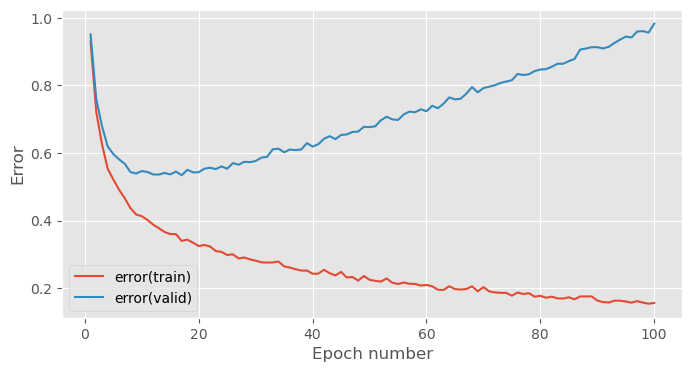

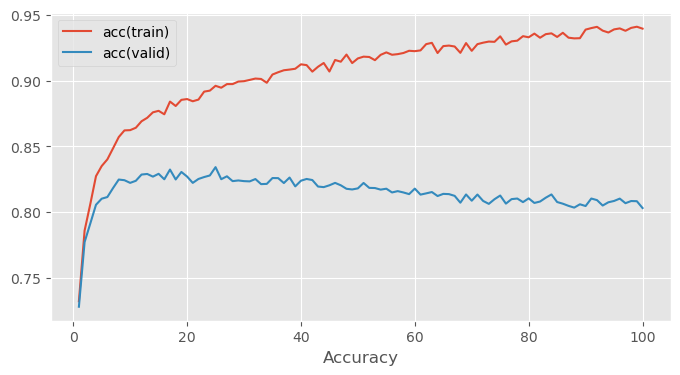

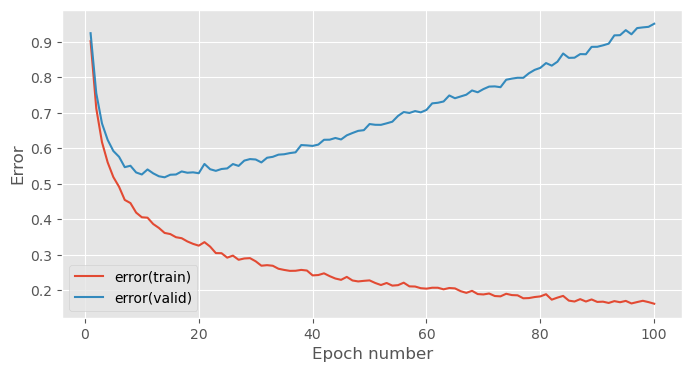

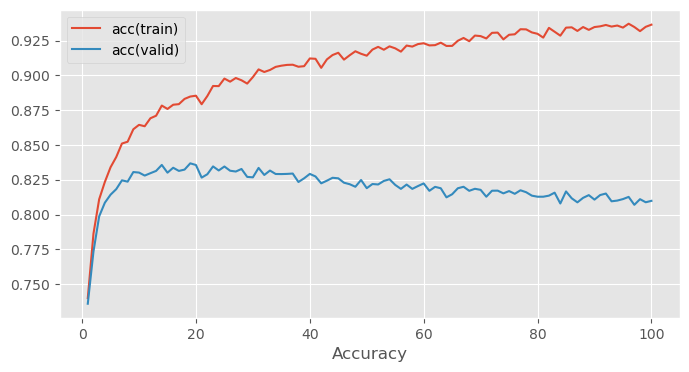

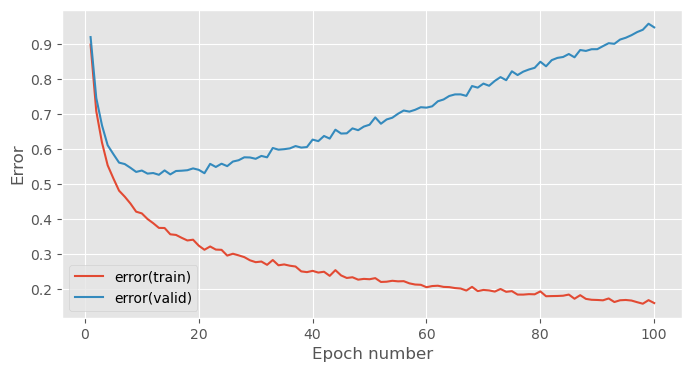

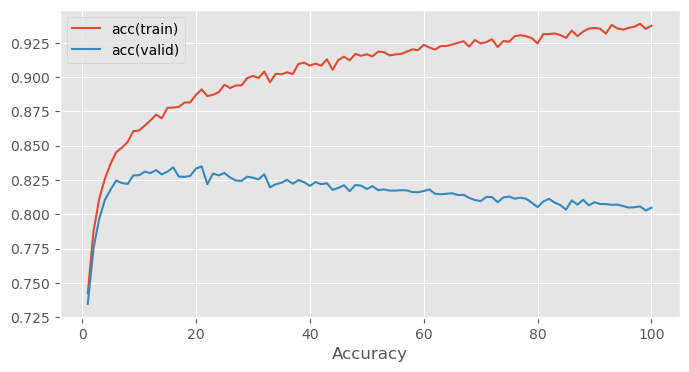

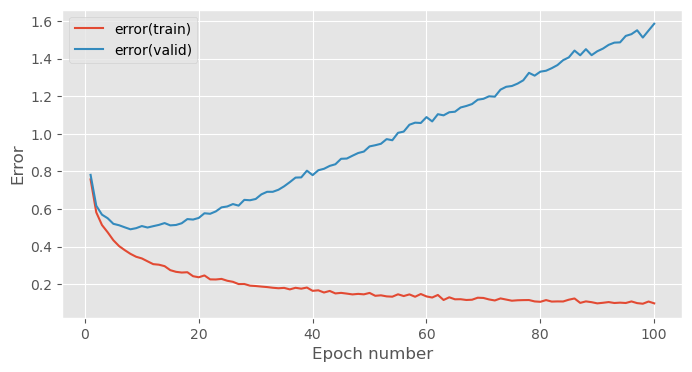

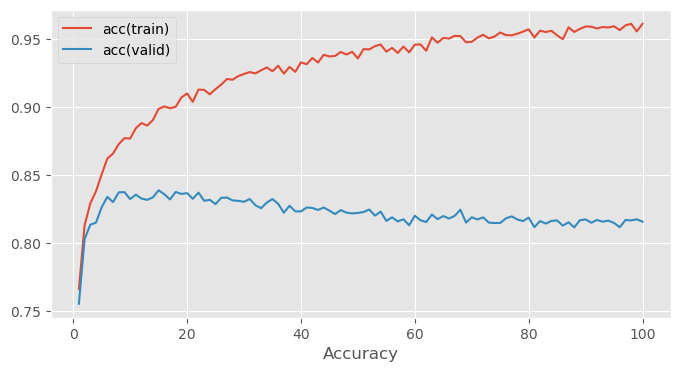

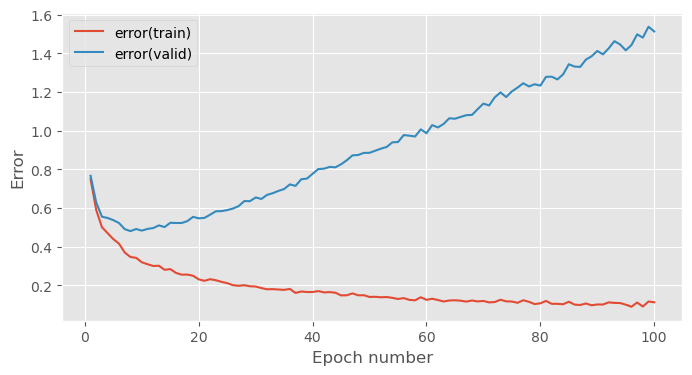

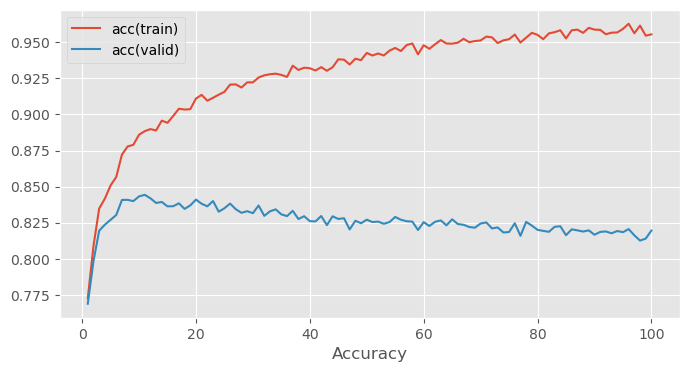

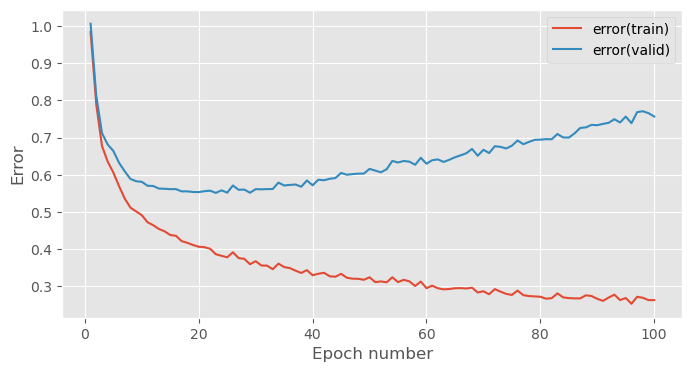

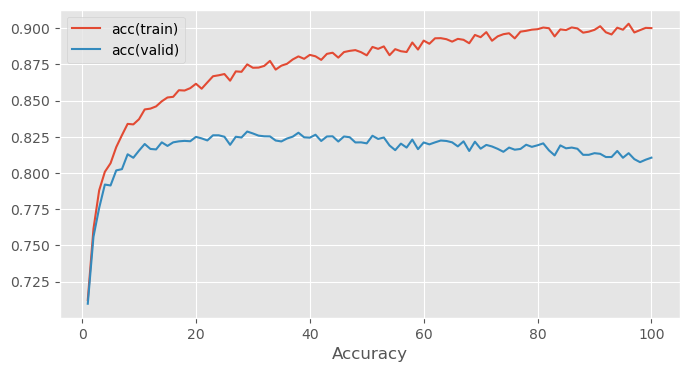

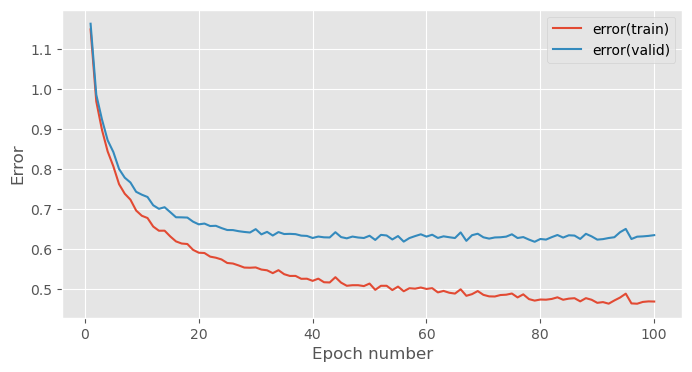

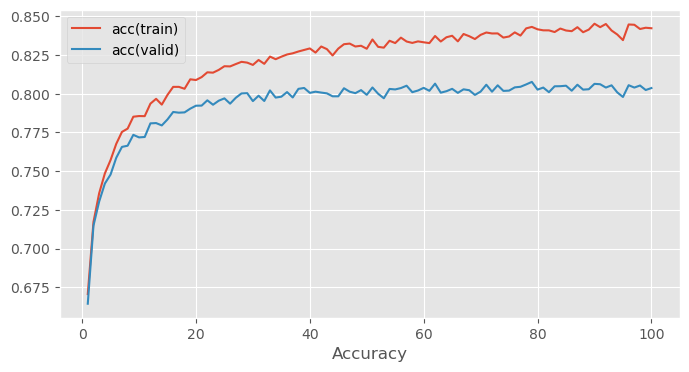

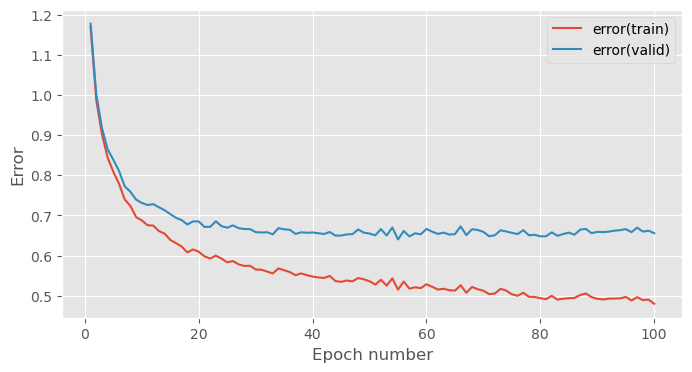

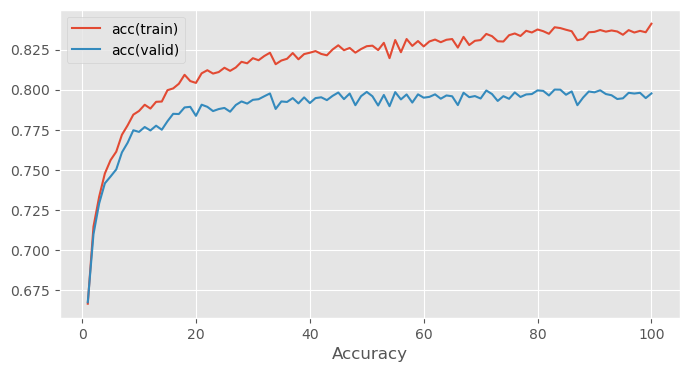

In [12]:
input_dim, output_dim, hidden_dim = 784, 47, 32
# Create model with TWO hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)


In [27]:
'''
    Question 2, Training a NN of one hidden layer with different hidden units.
    Plot accuracy rate of each number of hidden units: [32,64,128] 
    for training and validation set respectively.
'''

learning_rate = 0.0009
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47
all_stats = []
hidden_dims = [32, 64, 128]
for hidden_dim in hidden_dims:
    # Create model with ONE hidden layer
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
    ])

    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    all_stats.append(stats)




  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 0.6s to complete
    error(train)=1.24e+00, acc(train)=6.55e-01, error(valid)=1.26e+00, acc(valid)=6.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 0.6s to complete
    error(train)=1.12e+00, acc(train)=6.87e-01, error(valid)=1.14e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 0.6s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.07e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 0.6s to complete
    error(train)=9.94e-01, acc(train)=7.16e-01, error(valid)=1.03e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 0.7s to complete
    error(train)=9.42e-01, acc(train)=7.30e-01, error(valid)=9.79e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 0.6s to complete
    error(train)=9.05e-01, acc(train)=7.38e-01, error(valid)=9.44e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 0.6s to complete
    error(train)=8.69e-01, acc(train)=7.46e-01, error(valid)=9.12e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 0.6s to complete
    error(train)=8.42e-01, acc(train)=7.52e-01, error(valid)=8.90e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 0.6s to complete
    error(train)=8.16e-01, acc(train)=7.59e-01, error(valid)=8.62e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 0.7s to complete
    error(train)=7.89e-01, acc(train)=7.66e-01, error(valid)=8.36e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 0.6s to complete
    error(train)=7.66e-01, acc(train)=7.74e-01, error(valid)=8.16e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 0.7s to complete
    error(train)=7.58e-01, acc(train)=7.72e-01, error(valid)=8.10e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 0.7s to complete
    error(train)=7.40e-01, acc(train)=7.78e-01, error(valid)=7.91e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 0.7s to complete
    error(train)=7.27e-01, acc(train)=7.80e-01, error(valid)=7.84e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 0.6s to complete
    error(train)=7.17e-01, acc(train)=7.84e-01, error(valid)=7.74e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 0.6s to complete
    error(train)=7.17e-01, acc(train)=7.82e-01, error(valid)=7.76e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 0.7s to complete
    error(train)=7.00e-01, acc(train)=7.88e-01, error(valid)=7.59e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 0.6s to complete
    error(train)=6.89e-01, acc(train)=7.93e-01, error(valid)=7.48e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 0.7s to complete
    error(train)=6.85e-01, acc(train)=7.91e-01, error(valid)=7.48e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 0.7s to complete
    error(train)=6.75e-01, acc(train)=7.94e-01, error(valid)=7.42e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 0.6s to complete
    error(train)=6.69e-01, acc(train)=7.96e-01, error(valid)=7.34e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 0.7s to complete
    error(train)=6.71e-01, acc(train)=7.93e-01, error(valid)=7.38e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 0.7s to complete
    error(train)=6.59e-01, acc(train)=7.99e-01, error(valid)=7.29e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 0.7s to complete
    error(train)=6.51e-01, acc(train)=8.00e-01, error(valid)=7.21e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 0.7s to complete
    error(train)=6.55e-01, acc(train)=7.99e-01, error(valid)=7.26e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 0.6s to complete
    error(train)=6.45e-01, acc(train)=8.03e-01, error(valid)=7.19e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 0.6s to complete
    error(train)=6.46e-01, acc(train)=8.01e-01, error(valid)=7.24e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 0.6s to complete
    error(train)=6.46e-01, acc(train)=7.98e-01, error(valid)=7.27e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 0.7s to complete
    error(train)=6.42e-01, acc(train)=8.02e-01, error(valid)=7.20e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 0.6s to complete
    error(train)=6.35e-01, acc(train)=8.03e-01, error(valid)=7.14e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 0.6s to complete
    error(train)=6.26e-01, acc(train)=8.07e-01, error(valid)=7.07e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 0.6s to complete
    error(train)=6.25e-01, acc(train)=8.06e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 0.6s to complete
    error(train)=6.23e-01, acc(train)=8.07e-01, error(valid)=7.05e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 0.7s to complete
    error(train)=6.24e-01, acc(train)=8.06e-01, error(valid)=7.09e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 0.6s to complete
    error(train)=6.25e-01, acc(train)=8.06e-01, error(valid)=7.11e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 0.8s to complete
    error(train)=6.17e-01, acc(train)=8.08e-01, error(valid)=7.04e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 0.6s to complete
    error(train)=6.19e-01, acc(train)=8.04e-01, error(valid)=7.09e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 0.6s to complete
    error(train)=6.13e-01, acc(train)=8.10e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 0.7s to complete
    error(train)=6.07e-01, acc(train)=8.12e-01, error(valid)=7.00e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 0.6s to complete
    error(train)=6.10e-01, acc(train)=8.10e-01, error(valid)=7.04e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 0.7s to complete
    error(train)=6.13e-01, acc(train)=8.08e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 0.6s to complete
    error(train)=6.04e-01, acc(train)=8.11e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 0.8s to complete
    error(train)=6.05e-01, acc(train)=8.10e-01, error(valid)=7.03e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 0.6s to complete
    error(train)=6.02e-01, acc(train)=8.12e-01, error(valid)=7.01e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 0.7s to complete
    error(train)=6.03e-01, acc(train)=8.12e-01, error(valid)=7.03e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 0.6s to complete
    error(train)=6.09e-01, acc(train)=8.07e-01, error(valid)=7.11e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 0.7s to complete
    error(train)=5.99e-01, acc(train)=8.13e-01, error(valid)=7.03e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 0.6s to complete
    error(train)=5.96e-01, acc(train)=8.13e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 0.6s to complete
    error(train)=5.94e-01, acc(train)=8.14e-01, error(valid)=6.97e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 0.7s to complete
    error(train)=5.96e-01, acc(train)=8.13e-01, error(valid)=7.02e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 0.7s to complete
    error(train)=5.93e-01, acc(train)=8.13e-01, error(valid)=6.98e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 0.7s to complete
    error(train)=5.90e-01, acc(train)=8.15e-01, error(valid)=6.95e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 0.6s to complete
    error(train)=5.93e-01, acc(train)=8.13e-01, error(valid)=7.03e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 0.7s to complete
    error(train)=5.89e-01, acc(train)=8.13e-01, error(valid)=6.98e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 0.6s to complete
    error(train)=5.91e-01, acc(train)=8.13e-01, error(valid)=7.03e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 0.7s to complete
    error(train)=5.90e-01, acc(train)=8.14e-01, error(valid)=7.01e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 0.7s to complete
    error(train)=5.83e-01, acc(train)=8.16e-01, error(valid)=6.95e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 0.7s to complete
    error(train)=5.86e-01, acc(train)=8.15e-01, error(valid)=6.99e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 0.6s to complete
    error(train)=5.87e-01, acc(train)=8.15e-01, error(valid)=7.02e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 0.7s to complete
    error(train)=5.80e-01, acc(train)=8.16e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 0.7s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=6.96e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 0.6s to complete
    error(train)=5.83e-01, acc(train)=8.14e-01, error(valid)=7.01e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 0.7s to complete
    error(train)=5.83e-01, acc(train)=8.15e-01, error(valid)=7.01e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 0.6s to complete
    error(train)=5.87e-01, acc(train)=8.15e-01, error(valid)=7.04e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 0.7s to complete
    error(train)=5.82e-01, acc(train)=8.15e-01, error(valid)=7.03e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 0.7s to complete
    error(train)=5.78e-01, acc(train)=8.15e-01, error(valid)=6.99e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 0.7s to complete
    error(train)=5.77e-01, acc(train)=8.18e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 0.7s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=6.96e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 0.6s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 0.6s to complete
    error(train)=5.71e-01, acc(train)=8.18e-01, error(valid)=6.94e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 0.7s to complete
    error(train)=5.74e-01, acc(train)=8.17e-01, error(valid)=7.03e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 0.6s to complete
    error(train)=5.72e-01, acc(train)=8.19e-01, error(valid)=6.99e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 0.7s to complete
    error(train)=5.73e-01, acc(train)=8.17e-01, error(valid)=7.04e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 0.7s to complete
    error(train)=5.79e-01, acc(train)=8.16e-01, error(valid)=7.10e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 0.7s to complete
    error(train)=5.71e-01, acc(train)=8.17e-01, error(valid)=6.99e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 0.6s to complete
    error(train)=5.71e-01, acc(train)=8.18e-01, error(valid)=7.03e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 0.6s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=6.94e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 0.7s to complete
    error(train)=5.68e-01, acc(train)=8.19e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 0.7s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=6.99e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 0.6s to complete
    error(train)=5.62e-01, acc(train)=8.22e-01, error(valid)=6.93e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 0.7s to complete
    error(train)=5.61e-01, acc(train)=8.22e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 0.7s to complete
    error(train)=5.72e-01, acc(train)=8.16e-01, error(valid)=7.05e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 0.6s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=6.98e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 0.7s to complete
    error(train)=5.59e-01, acc(train)=8.22e-01, error(valid)=6.96e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 0.6s to complete
    error(train)=5.63e-01, acc(train)=8.20e-01, error(valid)=6.96e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 0.7s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=6.94e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 0.7s to complete
    error(train)=5.66e-01, acc(train)=8.20e-01, error(valid)=7.01e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 0.6s to complete
    error(train)=5.61e-01, acc(train)=8.20e-01, error(valid)=7.01e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 0.7s to complete
    error(train)=5.67e-01, acc(train)=8.17e-01, error(valid)=7.06e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 0.6s to complete
    error(train)=5.62e-01, acc(train)=8.17e-01, error(valid)=7.02e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 0.7s to complete
    error(train)=5.59e-01, acc(train)=8.22e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 0.6s to complete
    error(train)=5.61e-01, acc(train)=8.20e-01, error(valid)=7.03e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 0.8s to complete
    error(train)=5.58e-01, acc(train)=8.21e-01, error(valid)=7.01e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 0.7s to complete
    error(train)=5.57e-01, acc(train)=8.21e-01, error(valid)=7.00e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 0.7s to complete
    error(train)=5.55e-01, acc(train)=8.24e-01, error(valid)=6.95e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 0.7s to complete
    error(train)=5.54e-01, acc(train)=8.23e-01, error(valid)=6.98e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 0.7s to complete
    error(train)=5.61e-01, acc(train)=8.19e-01, error(valid)=7.10e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 0.6s to complete
    error(train)=5.56e-01, acc(train)=8.23e-01, error(valid)=7.00e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 0.7s to complete
    error(train)=5.53e-01, acc(train)=8.24e-01, error(valid)=6.97e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 0.6s to complete
    error(train)=5.58e-01, acc(train)=8.21e-01, error(valid)=7.06e-01, acc(valid)=7.83e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 0.9s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 0.8s to complete
    error(train)=9.19e-01, acc(train)=7.37e-01, error(valid)=9.36e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 0.8s to complete
    error(train)=8.13e-01, acc(train)=7.61e-01, error(valid)=8.40e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 0.8s to complete
    error(train)=7.41e-01, acc(train)=7.79e-01, error(valid)=7.75e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 0.8s to complete
    error(train)=6.94e-01, acc(train)=7.92e-01, error(valid)=7.34e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 0.8s to complete
    error(train)=6.58e-01, acc(train)=7.99e-01, error(valid)=7.04e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 0.8s to complete
    error(train)=6.32e-01, acc(train)=8.06e-01, error(valid)=6.84e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 0.9s to complete
    error(train)=6.13e-01, acc(train)=8.10e-01, error(valid)=6.69e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 0.8s to complete
    error(train)=5.99e-01, acc(train)=8.11e-01, error(valid)=6.59e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 0.9s to complete
    error(train)=5.78e-01, acc(train)=8.18e-01, error(valid)=6.42e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 0.8s to complete
    error(train)=5.65e-01, acc(train)=8.23e-01, error(valid)=6.38e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 0.9s to complete
    error(train)=5.48e-01, acc(train)=8.27e-01, error(valid)=6.22e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 0.8s to complete
    error(train)=5.37e-01, acc(train)=8.28e-01, error(valid)=6.15e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 0.8s to complete
    error(train)=5.37e-01, acc(train)=8.29e-01, error(valid)=6.22e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 0.8s to complete
    error(train)=5.18e-01, acc(train)=8.36e-01, error(valid)=6.04e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 0.8s to complete
    error(train)=5.15e-01, acc(train)=8.34e-01, error(valid)=6.08e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 0.9s to complete
    error(train)=5.10e-01, acc(train)=8.36e-01, error(valid)=6.04e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 0.8s to complete
    error(train)=5.05e-01, acc(train)=8.39e-01, error(valid)=6.05e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 0.9s to complete
    error(train)=4.88e-01, acc(train)=8.44e-01, error(valid)=5.93e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 0.7s to complete
    error(train)=4.91e-01, acc(train)=8.42e-01, error(valid)=5.98e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.0s to complete
    error(train)=4.82e-01, acc(train)=8.43e-01, error(valid)=5.93e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 0.9s to complete
    error(train)=4.84e-01, acc(train)=8.43e-01, error(valid)=5.96e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 0.9s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.95e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 0.9s to complete
    error(train)=4.84e-01, acc(train)=8.43e-01, error(valid)=6.08e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 0.8s to complete
    error(train)=4.73e-01, acc(train)=8.46e-01, error(valid)=6.02e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 0.9s to complete
    error(train)=4.65e-01, acc(train)=8.47e-01, error(valid)=5.95e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 0.8s to complete
    error(train)=4.59e-01, acc(train)=8.48e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 0.9s to complete
    error(train)=4.60e-01, acc(train)=8.48e-01, error(valid)=5.99e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 0.8s to complete
    error(train)=4.51e-01, acc(train)=8.50e-01, error(valid)=5.91e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 0.9s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 0.8s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=5.88e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 0.8s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=5.95e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 0.8s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 0.9s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.91e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 0.7s to complete
    error(train)=4.30e-01, acc(train)=8.57e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 0.9s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=5.87e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 0.8s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=5.91e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 0.9s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.93e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 0.8s to complete
    error(train)=4.24e-01, acc(train)=8.60e-01, error(valid)=5.89e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.0s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.94e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 0.9s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=5.92e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 0.9s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.95e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 0.8s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.95e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 0.9s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 0.8s to complete
    error(train)=4.11e-01, acc(train)=8.62e-01, error(valid)=5.96e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 0.9s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 0.9s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.99e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 0.8s to complete
    error(train)=4.09e-01, acc(train)=8.63e-01, error(valid)=6.01e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.0s to complete
    error(train)=4.12e-01, acc(train)=8.61e-01, error(valid)=6.05e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 0.8s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=6.03e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 0.9s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=6.02e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 0.9s to complete
    error(train)=4.02e-01, acc(train)=8.66e-01, error(valid)=6.03e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 0.8s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=6.07e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 0.8s to complete
    error(train)=3.96e-01, acc(train)=8.67e-01, error(valid)=6.06e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 0.9s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=6.11e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 0.9s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=6.13e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 0.8s to complete
    error(train)=3.91e-01, acc(train)=8.66e-01, error(valid)=6.10e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 0.9s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=6.13e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 0.8s to complete
    error(train)=3.88e-01, acc(train)=8.68e-01, error(valid)=6.04e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.0s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=6.19e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 0.8s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=6.12e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 0.9s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=6.10e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 0.9s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=6.13e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 0.8s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=6.17e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 0.9s to complete
    error(train)=3.81e-01, acc(train)=8.72e-01, error(valid)=6.17e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 0.8s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=6.17e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 0.9s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=6.24e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 0.8s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=6.25e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 0.9s to complete
    error(train)=3.88e-01, acc(train)=8.68e-01, error(valid)=6.33e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 0.8s to complete
    error(train)=3.80e-01, acc(train)=8.71e-01, error(valid)=6.30e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 0.8s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=6.34e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 0.9s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=6.23e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 0.8s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=6.27e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 0.9s to complete
    error(train)=3.75e-01, acc(train)=8.73e-01, error(valid)=6.32e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 0.8s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=6.34e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 0.9s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=6.30e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 0.8s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=6.40e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 0.9s to complete
    error(train)=3.71e-01, acc(train)=8.73e-01, error(valid)=6.38e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 0.8s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=6.39e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 0.8s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=6.42e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 0.9s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=6.48e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 0.9s to complete
    error(train)=3.69e-01, acc(train)=8.73e-01, error(valid)=6.45e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 0.9s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=6.42e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 0.8s to complete
    error(train)=3.65e-01, acc(train)=8.76e-01, error(valid)=6.44e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.0s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=6.41e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 0.8s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=6.42e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 0.9s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=6.41e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 0.8s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=6.49e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 0.9s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=6.55e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 0.8s to complete
    error(train)=3.69e-01, acc(train)=8.71e-01, error(valid)=6.68e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 0.9s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=6.59e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 0.8s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=6.54e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 0.9s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=6.56e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 0.8s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=6.62e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 0.9s to complete
    error(train)=3.61e-01, acc(train)=8.73e-01, error(valid)=6.72e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 0.8s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=6.61e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 0.8s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=6.63e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 0.9s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=6.65e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 0.8s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=6.55e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 0.9s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=6.61e-01, acc(valid)=8.06e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.6s to complete
    error(train)=9.32e-01, acc(train)=7.36e-01, error(valid)=9.49e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.6s to complete
    error(train)=7.28e-01, acc(train)=7.81e-01, error(valid)=7.60e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.7s to complete
    error(train)=6.23e-01, acc(train)=8.07e-01, error(valid)=6.66e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.5s to complete
    error(train)=5.71e-01, acc(train)=8.22e-01, error(valid)=6.25e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.4s to complete
    error(train)=5.15e-01, acc(train)=8.38e-01, error(valid)=5.80e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.5s to complete
    error(train)=4.92e-01, acc(train)=8.40e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.5s to complete
    error(train)=4.68e-01, acc(train)=8.47e-01, error(valid)=5.56e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.6s to complete
    error(train)=4.44e-01, acc(train)=8.52e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.6s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.5s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.6s to complete
    error(train)=3.95e-01, acc(train)=8.68e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.6s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.7s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.6s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.6s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.6s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.7s to complete
    error(train)=3.51e-01, acc(train)=8.78e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.6s to complete
    error(train)=3.35e-01, acc(train)=8.83e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.6s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.7s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=5.24e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.5s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.5s to complete
    error(train)=3.11e-01, acc(train)=8.92e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.6s to complete
    error(train)=3.11e-01, acc(train)=8.90e-01, error(valid)=5.27e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.6s to complete
    error(train)=3.05e-01, acc(train)=8.92e-01, error(valid)=5.32e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.6s to complete
    error(train)=2.97e-01, acc(train)=8.96e-01, error(valid)=5.34e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.6s to complete
    error(train)=2.94e-01, acc(train)=8.97e-01, error(valid)=5.40e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.7s to complete
    error(train)=3.01e-01, acc(train)=8.93e-01, error(valid)=5.55e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.6s to complete
    error(train)=2.88e-01, acc(train)=8.98e-01, error(valid)=5.49e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.4s to complete
    error(train)=2.84e-01, acc(train)=8.99e-01, error(valid)=5.49e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.6s to complete
    error(train)=2.79e-01, acc(train)=9.02e-01, error(valid)=5.50e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.6s to complete
    error(train)=2.78e-01, acc(train)=9.01e-01, error(valid)=5.60e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.6s to complete
    error(train)=2.76e-01, acc(train)=9.01e-01, error(valid)=5.72e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.6s to complete
    error(train)=2.71e-01, acc(train)=9.03e-01, error(valid)=5.67e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.6s to complete
    error(train)=2.68e-01, acc(train)=9.03e-01, error(valid)=5.75e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.7s to complete
    error(train)=2.62e-01, acc(train)=9.07e-01, error(valid)=5.70e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.7s to complete
    error(train)=2.58e-01, acc(train)=9.08e-01, error(valid)=5.77e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.6s to complete
    error(train)=2.63e-01, acc(train)=9.03e-01, error(valid)=5.83e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.7s to complete
    error(train)=2.56e-01, acc(train)=9.07e-01, error(valid)=5.90e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.6s to complete
    error(train)=2.52e-01, acc(train)=9.09e-01, error(valid)=5.87e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.6s to complete
    error(train)=2.48e-01, acc(train)=9.10e-01, error(valid)=5.97e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.6s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=6.01e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.5s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=6.13e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.5s to complete
    error(train)=2.44e-01, acc(train)=9.12e-01, error(valid)=6.09e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.6s to complete
    error(train)=2.39e-01, acc(train)=9.13e-01, error(valid)=6.20e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.6s to complete
    error(train)=2.35e-01, acc(train)=9.15e-01, error(valid)=6.20e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.5s to complete
    error(train)=2.34e-01, acc(train)=9.15e-01, error(valid)=6.26e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.6s to complete
    error(train)=2.38e-01, acc(train)=9.12e-01, error(valid)=6.30e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.6s to complete
    error(train)=2.31e-01, acc(train)=9.17e-01, error(valid)=6.33e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.4s to complete
    error(train)=2.27e-01, acc(train)=9.17e-01, error(valid)=6.30e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.3s to complete
    error(train)=2.23e-01, acc(train)=9.18e-01, error(valid)=6.38e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.4s to complete
    error(train)=2.25e-01, acc(train)=9.17e-01, error(valid)=6.48e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.7s to complete
    error(train)=2.20e-01, acc(train)=9.20e-01, error(valid)=6.48e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.5s to complete
    error(train)=2.21e-01, acc(train)=9.19e-01, error(valid)=6.59e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.4s to complete
    error(train)=2.16e-01, acc(train)=9.22e-01, error(valid)=6.59e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.3s to complete
    error(train)=2.13e-01, acc(train)=9.21e-01, error(valid)=6.65e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.4s to complete
    error(train)=2.19e-01, acc(train)=9.20e-01, error(valid)=6.74e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.3s to complete
    error(train)=2.12e-01, acc(train)=9.22e-01, error(valid)=6.74e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.4s to complete
    error(train)=2.18e-01, acc(train)=9.18e-01, error(valid)=6.91e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.4s to complete
    error(train)=2.06e-01, acc(train)=9.24e-01, error(valid)=6.84e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.3s to complete
    error(train)=2.11e-01, acc(train)=9.22e-01, error(valid)=6.97e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.4s to complete
    error(train)=2.14e-01, acc(train)=9.21e-01, error(valid)=7.07e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.4s to complete
    error(train)=2.04e-01, acc(train)=9.25e-01, error(valid)=7.02e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.4s to complete
    error(train)=2.04e-01, acc(train)=9.25e-01, error(valid)=7.17e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.4s to complete
    error(train)=2.09e-01, acc(train)=9.20e-01, error(valid)=7.15e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.4s to complete
    error(train)=1.98e-01, acc(train)=9.27e-01, error(valid)=7.29e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.4s to complete
    error(train)=2.02e-01, acc(train)=9.25e-01, error(valid)=7.23e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.3s to complete
    error(train)=1.95e-01, acc(train)=9.27e-01, error(valid)=7.24e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.4s to complete
    error(train)=1.97e-01, acc(train)=9.27e-01, error(valid)=7.35e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.4s to complete
    error(train)=1.93e-01, acc(train)=9.29e-01, error(valid)=7.45e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.4s to complete
    error(train)=1.91e-01, acc(train)=9.29e-01, error(valid)=7.44e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.3s to complete
    error(train)=1.98e-01, acc(train)=9.23e-01, error(valid)=7.57e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.4s to complete
    error(train)=1.97e-01, acc(train)=9.26e-01, error(valid)=7.62e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.4s to complete
    error(train)=1.87e-01, acc(train)=9.32e-01, error(valid)=7.58e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.3s to complete
    error(train)=1.90e-01, acc(train)=9.29e-01, error(valid)=7.71e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.4s to complete
    error(train)=1.87e-01, acc(train)=9.30e-01, error(valid)=7.66e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.3s to complete
    error(train)=1.86e-01, acc(train)=9.31e-01, error(valid)=7.76e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.4s to complete
    error(train)=1.82e-01, acc(train)=9.32e-01, error(valid)=7.76e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.4s to complete
    error(train)=1.77e-01, acc(train)=9.34e-01, error(valid)=7.83e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.4s to complete
    error(train)=1.84e-01, acc(train)=9.31e-01, error(valid)=7.99e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.4s to complete
    error(train)=1.79e-01, acc(train)=9.33e-01, error(valid)=7.98e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.3s to complete
    error(train)=1.74e-01, acc(train)=9.35e-01, error(valid)=8.00e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.4s to complete
    error(train)=1.74e-01, acc(train)=9.35e-01, error(valid)=8.07e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.4s to complete
    error(train)=1.71e-01, acc(train)=9.37e-01, error(valid)=8.08e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.4s to complete
    error(train)=1.78e-01, acc(train)=9.33e-01, error(valid)=8.25e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.3s to complete
    error(train)=1.79e-01, acc(train)=9.33e-01, error(valid)=8.32e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.5s to complete
    error(train)=1.81e-01, acc(train)=9.30e-01, error(valid)=8.37e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.4s to complete
    error(train)=1.76e-01, acc(train)=9.33e-01, error(valid)=8.44e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.4s to complete
    error(train)=1.71e-01, acc(train)=9.36e-01, error(valid)=8.43e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.4s to complete
    error(train)=1.69e-01, acc(train)=9.36e-01, error(valid)=8.44e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.4s to complete
    error(train)=1.72e-01, acc(train)=9.34e-01, error(valid)=8.60e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.5s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=8.53e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.3s to complete
    error(train)=1.66e-01, acc(train)=9.38e-01, error(valid)=8.71e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.4s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=8.63e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.4s to complete
    error(train)=1.60e-01, acc(train)=9.40e-01, error(valid)=8.72e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.4s to complete
    error(train)=1.64e-01, acc(train)=9.37e-01, error(valid)=8.75e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.5s to complete
    error(train)=1.59e-01, acc(train)=9.40e-01, error(valid)=8.88e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.4s to complete
    error(train)=1.66e-01, acc(train)=9.36e-01, error(valid)=8.94e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.4s to complete
    error(train)=1.55e-01, acc(train)=9.41e-01, error(valid)=8.92e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.5s to complete
    error(train)=1.60e-01, acc(train)=9.39e-01, error(valid)=9.01e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.5s to complete
    error(train)=1.58e-01, acc(train)=9.39e-01, error(valid)=9.02e-01, acc(valid)=8.10e-01


In [29]:
hidden_dims = [32, 64, 128]
for i, stats in enumerate(all_stats):
    print('The Training Accuracy is: {:.3f} of Width {}'.format(stats[100:, keys['acc(train)']][0],hidden_dims[i]))
    print('The Validation Accuracy is: {:.3f} of Width {}'.format(stats[100:, keys['acc(valid)']][0],hidden_dims[i]))
    print('The Training Error is: {:.3f} of Width {}'.format(stats[100:, keys['error(train)']][0],hidden_dims[i]))
    print('The Validation Error is: {:.3f} of Width {}'.format(stats[100:, keys['error(valid)']][0],hidden_dims[i]))
    print('\n')
    

The Training Accuracy is: 0.821 of Width 32
The Validation Accuracy is: 0.783 of Width 32
The Training Error is: 0.558 of Width 32
The Validation Error is: 0.706 of Width 32


The Training Accuracy is: 0.881 of Width 64
The Validation Accuracy is: 0.806 of Width 64
The Training Error is: 0.346 of Width 64
The Validation Error is: 0.661 of Width 64


The Training Accuracy is: 0.939 of Width 128
The Validation Accuracy is: 0.810 of Width 128
The Training Error is: 0.158 of Width 128
The Validation Error is: 0.902 of Width 128




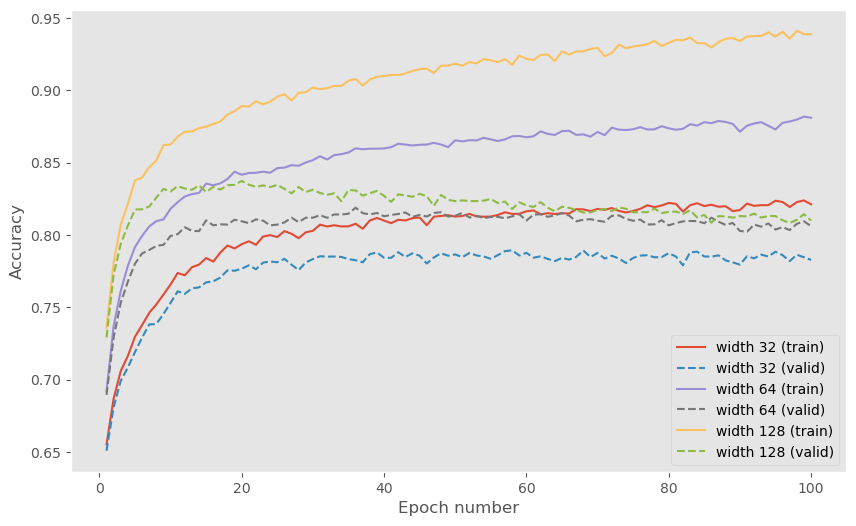

In [31]:
'''
    Question 2
    plot Accuracy rate of each number of hidden units: [32,64,128] 
    for training and validation set respectively.
'''
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Loop through all_stats for training and validation accuracy
for i, stats in enumerate(all_stats):
    # Plot training accuracy
    plt.plot(np.arange(1, stats.shape[0]), stats[1:, keys['acc(train)']], label=f'width {hidden_dims[i]} (train)')
    
    # Plot validation accuracy
    plt.plot(np.arange(1, stats.shape[0]), stats[1:, keys['acc(valid)']], linestyle='dashed', label=f'width {hidden_dims[i]} (valid)')

# Set labels and legend
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Save the plot to a specified path
plt.savefig('/home/gvidias/mlpractical/figures/Question2Accuracy.png')

# Show the plot
plt.show()



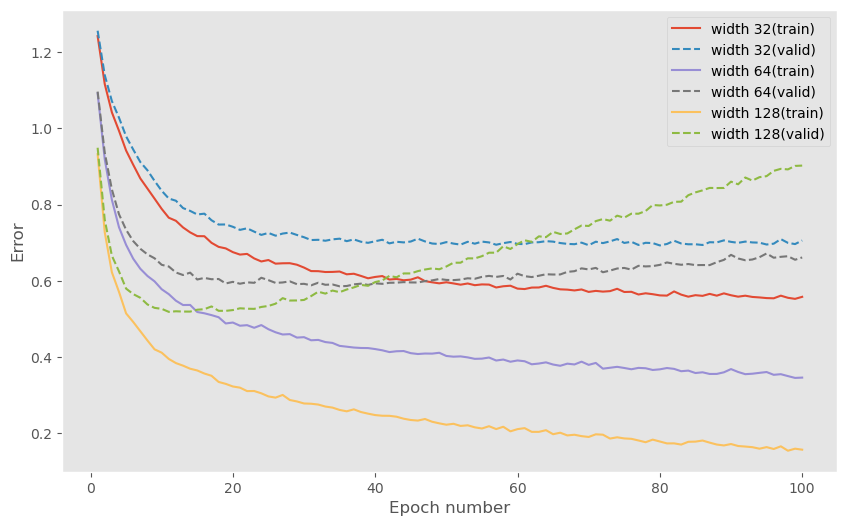

In [32]:
'''
    Question 2
    Plot error  of each number of hidden units: [32,64,128] 
    for training and validation set respectively.
'''
plt.figure(figsize=(10, 6))

for i, stats in enumerate(all_stats):
    plt.plot(np.arange(1, stats.shape[0]), stats[1:, keys['error(train)']], label=f'width {hidden_dims[i]}(train)')
    plt.plot(np.arange(1, stats.shape[0]), stats[1:, keys['error(valid)']],linestyle='dashed', label=f'width {hidden_dims[i]}(valid)')

plt.xlabel('Epoch number')
plt.ylabel('Error')
plt.legend()

plt.grid()
# Save the plot to a specified path
plt.savefig('/home/gvidias/mlpractical/figures/Question2Error.png')
plt.show()

In [22]:
'''
    Question 3 - Creation of NN with different depth 1,2,3
'''
learning_rate = 0.0009
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
num_of_layers = [1,2,3]
all_stats = []
for depth in num_of_layers:
    if depth == 1:
        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
            ReluLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
            ])

        error = CrossEntropySoftmaxError()
        # Use a Adam learning rule
        learning_rule = AdamLearningRule(learning_rate=learning_rate)

        # Remember to use notebook=False when you write a script to be run in a terminal
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    elif depth == 2:
        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
            ReluLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
        ])

        error = CrossEntropySoftmaxError()
        # Use a Adam learning rule
        learning_rule = AdamLearningRule(learning_rate=learning_rate)

        # Remember to use notebook=False when you write a script to be run in a terminal
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    else:
        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
            ReluLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
            ])
        error = CrossEntropySoftmaxError()
            # Use a Adam learning rule
        learning_rule = AdamLearningRule(learning_rate=learning_rate)

            # Remember to use notebook=False when you write a script to be run in a terminal
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
        
    all_stats.append(stats)
    

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.4s to complete
    error(train)=9.24e-01, acc(train)=7.34e-01, error(valid)=9.41e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.2s to complete
    error(train)=7.32e-01, acc(train)=7.82e-01, error(valid)=7.61e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.3s to complete
    error(train)=6.30e-01, acc(train)=8.05e-01, error(valid)=6.73e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.4s to complete
    error(train)=5.67e-01, acc(train)=8.21e-01, error(valid)=6.25e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.4s to complete
    error(train)=5.32e-01, acc(train)=8.30e-01, error(valid)=6.02e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.3s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=5.79e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.5s to complete
    error(train)=4.69e-01, acc(train)=8.48e-01, error(valid)=5.64e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.3s to complete
    error(train)=4.50e-01, acc(train)=8.54e-01, error(valid)=5.56e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.2s to complete
    error(train)=4.42e-01, acc(train)=8.52e-01, error(valid)=5.64e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.3s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.36e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.3s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.35e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.4s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.2s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.3s to complete
    error(train)=3.78e-01, acc(train)=8.70e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.2s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.5s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.3s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.4s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=5.35e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.4s to complete
    error(train)=3.36e-01, acc(train)=8.84e-01, error(valid)=5.41e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.4s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=5.49e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.2s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=5.43e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.3s to complete
    error(train)=3.23e-01, acc(train)=8.87e-01, error(valid)=5.50e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.3s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=5.56e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.3s to complete
    error(train)=3.22e-01, acc(train)=8.86e-01, error(valid)=5.66e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.3s to complete
    error(train)=3.07e-01, acc(train)=8.92e-01, error(valid)=5.57e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.3s to complete
    error(train)=3.04e-01, acc(train)=8.92e-01, error(valid)=5.64e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.3s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=5.65e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.5s to complete
    error(train)=2.93e-01, acc(train)=8.97e-01, error(valid)=5.68e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.4s to complete
    error(train)=2.93e-01, acc(train)=8.96e-01, error(valid)=5.75e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.5s to complete
    error(train)=2.90e-01, acc(train)=8.97e-01, error(valid)=5.76e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.4s to complete
    error(train)=2.84e-01, acc(train)=8.99e-01, error(valid)=5.79e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.4s to complete
    error(train)=2.73e-01, acc(train)=9.03e-01, error(valid)=5.77e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.3s to complete
    error(train)=2.78e-01, acc(train)=9.01e-01, error(valid)=5.89e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.3s to complete
    error(train)=2.69e-01, acc(train)=9.04e-01, error(valid)=5.85e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.4s to complete
    error(train)=2.70e-01, acc(train)=9.02e-01, error(valid)=5.99e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.3s to complete
    error(train)=2.62e-01, acc(train)=9.06e-01, error(valid)=5.94e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.3s to complete
    error(train)=2.69e-01, acc(train)=9.03e-01, error(valid)=6.07e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.3s to complete
    error(train)=2.59e-01, acc(train)=9.07e-01, error(valid)=6.09e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.3s to complete
    error(train)=2.59e-01, acc(train)=9.07e-01, error(valid)=6.08e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.3s to complete
    error(train)=2.53e-01, acc(train)=9.09e-01, error(valid)=6.09e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.3s to complete
    error(train)=2.51e-01, acc(train)=9.11e-01, error(valid)=6.21e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.3s to complete
    error(train)=2.52e-01, acc(train)=9.07e-01, error(valid)=6.25e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.3s to complete
    error(train)=2.48e-01, acc(train)=9.11e-01, error(valid)=6.28e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.3s to complete
    error(train)=2.39e-01, acc(train)=9.14e-01, error(valid)=6.27e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.3s to complete
    error(train)=2.38e-01, acc(train)=9.13e-01, error(valid)=6.35e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.3s to complete
    error(train)=2.42e-01, acc(train)=9.13e-01, error(valid)=6.45e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.3s to complete
    error(train)=2.38e-01, acc(train)=9.14e-01, error(valid)=6.48e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.3s to complete
    error(train)=2.34e-01, acc(train)=9.15e-01, error(valid)=6.52e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.4s to complete
    error(train)=2.32e-01, acc(train)=9.15e-01, error(valid)=6.55e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.3s to complete
    error(train)=2.39e-01, acc(train)=9.12e-01, error(valid)=6.71e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.4s to complete
    error(train)=2.35e-01, acc(train)=9.15e-01, error(valid)=6.69e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.4s to complete
    error(train)=2.29e-01, acc(train)=9.15e-01, error(valid)=6.73e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.3s to complete
    error(train)=2.23e-01, acc(train)=9.18e-01, error(valid)=6.73e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.4s to complete
    error(train)=2.29e-01, acc(train)=9.15e-01, error(valid)=6.86e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.3s to complete
    error(train)=2.20e-01, acc(train)=9.19e-01, error(valid)=6.87e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.2s to complete
    error(train)=2.17e-01, acc(train)=9.21e-01, error(valid)=6.91e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.3s to complete
    error(train)=2.17e-01, acc(train)=9.20e-01, error(valid)=6.90e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.3s to complete
    error(train)=2.17e-01, acc(train)=9.20e-01, error(valid)=7.05e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.3s to complete
    error(train)=2.11e-01, acc(train)=9.22e-01, error(valid)=7.04e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.5s to complete
    error(train)=2.10e-01, acc(train)=9.24e-01, error(valid)=7.11e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.4s to complete
    error(train)=2.12e-01, acc(train)=9.22e-01, error(valid)=7.18e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.4s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=7.18e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.4s to complete
    error(train)=2.03e-01, acc(train)=9.25e-01, error(valid)=7.24e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.6s to complete
    error(train)=2.09e-01, acc(train)=9.22e-01, error(valid)=7.42e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.4s to complete
    error(train)=1.99e-01, acc(train)=9.27e-01, error(valid)=7.33e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.6s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=7.57e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.4s to complete
    error(train)=2.08e-01, acc(train)=9.23e-01, error(valid)=7.55e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.6s to complete
    error(train)=2.04e-01, acc(train)=9.24e-01, error(valid)=7.55e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.5s to complete
    error(train)=1.99e-01, acc(train)=9.26e-01, error(valid)=7.65e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.4s to complete
    error(train)=1.93e-01, acc(train)=9.29e-01, error(valid)=7.64e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.4s to complete
    error(train)=2.00e-01, acc(train)=9.24e-01, error(valid)=7.83e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.4s to complete
    error(train)=1.96e-01, acc(train)=9.26e-01, error(valid)=7.83e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.3s to complete
    error(train)=1.99e-01, acc(train)=9.27e-01, error(valid)=7.86e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.3s to complete
    error(train)=1.88e-01, acc(train)=9.30e-01, error(valid)=7.86e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.2s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=7.95e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.4s to complete
    error(train)=1.87e-01, acc(train)=9.31e-01, error(valid)=8.00e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.4s to complete
    error(train)=1.85e-01, acc(train)=9.32e-01, error(valid)=8.00e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.3s to complete
    error(train)=1.86e-01, acc(train)=9.30e-01, error(valid)=8.09e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.3s to complete
    error(train)=1.88e-01, acc(train)=9.28e-01, error(valid)=8.19e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.2s to complete
    error(train)=1.87e-01, acc(train)=9.29e-01, error(valid)=8.27e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.3s to complete
    error(train)=1.83e-01, acc(train)=9.32e-01, error(valid)=8.29e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.4s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=8.34e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.3s to complete
    error(train)=1.83e-01, acc(train)=9.32e-01, error(valid)=8.44e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.2s to complete
    error(train)=1.80e-01, acc(train)=9.33e-01, error(valid)=8.52e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.3s to complete
    error(train)=1.77e-01, acc(train)=9.34e-01, error(valid)=8.54e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.4s to complete
    error(train)=1.85e-01, acc(train)=9.29e-01, error(valid)=8.67e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.4s to complete
    error(train)=1.77e-01, acc(train)=9.33e-01, error(valid)=8.70e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.3s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.74e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.2s to complete
    error(train)=1.68e-01, acc(train)=9.37e-01, error(valid)=8.67e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.3s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.85e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.3s to complete
    error(train)=1.76e-01, acc(train)=9.34e-01, error(valid)=8.86e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.3s to complete
    error(train)=1.73e-01, acc(train)=9.33e-01, error(valid)=8.96e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.4s to complete
    error(train)=1.81e-01, acc(train)=9.30e-01, error(valid)=9.07e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.5s to complete
    error(train)=1.72e-01, acc(train)=9.35e-01, error(valid)=9.08e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.4s to complete
    error(train)=1.62e-01, acc(train)=9.39e-01, error(valid)=9.04e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.4s to complete
    error(train)=1.66e-01, acc(train)=9.37e-01, error(valid)=9.18e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.4s to complete
    error(train)=1.68e-01, acc(train)=9.36e-01, error(valid)=9.29e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.4s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=9.33e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.3s to complete
    error(train)=1.81e-01, acc(train)=9.29e-01, error(valid)=9.51e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.4s to complete
    error(train)=1.66e-01, acc(train)=9.36e-01, error(valid)=9.44e-01, acc(valid)=8.02e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.0s to complete
    error(train)=7.90e-01, acc(train)=7.60e-01, error(valid)=8.11e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.8s to complete
    error(train)=6.18e-01, acc(train)=8.03e-01, error(valid)=6.58e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.7s to complete
    error(train)=5.40e-01, acc(train)=8.22e-01, error(valid)=5.97e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.8s to complete
    error(train)=4.74e-01, acc(train)=8.42e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.7s to complete
    error(train)=4.50e-01, acc(train)=8.45e-01, error(valid)=5.34e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.6s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.7s to complete
    error(train)=4.00e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.7s to complete
    error(train)=3.81e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.7s to complete
    error(train)=3.49e-01, acc(train)=8.75e-01, error(valid)=4.91e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.7s to complete
    error(train)=3.35e-01, acc(train)=8.81e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.8s to complete
    error(train)=3.29e-01, acc(train)=8.81e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.7s to complete
    error(train)=3.20e-01, acc(train)=8.85e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.8s to complete
    error(train)=3.00e-01, acc(train)=8.92e-01, error(valid)=4.94e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.7s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.7s to complete
    error(train)=2.76e-01, acc(train)=8.97e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.8s to complete
    error(train)=2.76e-01, acc(train)=8.97e-01, error(valid)=5.15e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.7s to complete
    error(train)=2.64e-01, acc(train)=9.01e-01, error(valid)=5.11e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.7s to complete
    error(train)=2.61e-01, acc(train)=9.02e-01, error(valid)=5.28e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.6s to complete
    error(train)=2.52e-01, acc(train)=9.04e-01, error(valid)=5.37e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.7s to complete
    error(train)=2.53e-01, acc(train)=9.03e-01, error(valid)=5.51e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.7s to complete
    error(train)=2.38e-01, acc(train)=9.11e-01, error(valid)=5.50e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.7s to complete
    error(train)=2.35e-01, acc(train)=9.10e-01, error(valid)=5.56e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.8s to complete
    error(train)=2.25e-01, acc(train)=9.14e-01, error(valid)=5.66e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.8s to complete
    error(train)=2.23e-01, acc(train)=9.13e-01, error(valid)=5.74e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.7s to complete
    error(train)=2.23e-01, acc(train)=9.14e-01, error(valid)=5.85e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.7s to complete
    error(train)=2.07e-01, acc(train)=9.20e-01, error(valid)=5.84e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.7s to complete
    error(train)=2.16e-01, acc(train)=9.17e-01, error(valid)=6.05e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.6s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=6.14e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.7s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=6.30e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.6s to complete
    error(train)=1.99e-01, acc(train)=9.20e-01, error(valid)=6.37e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.8s to complete
    error(train)=1.89e-01, acc(train)=9.26e-01, error(valid)=6.42e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.7s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=6.57e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.8s to complete
    error(train)=1.92e-01, acc(train)=9.24e-01, error(valid)=6.70e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.8s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=6.83e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.0s to complete
    error(train)=1.89e-01, acc(train)=9.23e-01, error(valid)=7.03e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.0s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=6.90e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.1s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=7.02e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.8s to complete
    error(train)=1.76e-01, acc(train)=9.30e-01, error(valid)=7.32e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.8s to complete
    error(train)=1.60e-01, acc(train)=9.36e-01, error(valid)=7.16e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.8s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=7.53e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.8s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=7.50e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.9s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=7.71e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.9s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=7.78e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.8s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=7.79e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.9s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=8.05e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.2s to complete
    error(train)=1.57e-01, acc(train)=9.35e-01, error(valid)=8.11e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.8s to complete
    error(train)=1.47e-01, acc(train)=9.41e-01, error(valid)=8.23e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.9s to complete
    error(train)=1.54e-01, acc(train)=9.36e-01, error(valid)=8.62e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.0s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=8.72e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.1s to complete
    error(train)=1.50e-01, acc(train)=9.38e-01, error(valid)=8.79e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.1s to complete
    error(train)=1.47e-01, acc(train)=9.40e-01, error(valid)=8.88e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.8s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=8.75e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.8s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=9.04e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.7s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=9.19e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.9s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=9.30e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.8s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=9.29e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.9s to complete
    error(train)=1.33e-01, acc(train)=9.44e-01, error(valid)=9.59e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.9s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=9.77e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.9s to complete
    error(train)=1.22e-01, acc(train)=9.49e-01, error(valid)=9.59e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.8s to complete
    error(train)=1.39e-01, acc(train)=9.42e-01, error(valid)=9.95e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.9s to complete
    error(train)=1.20e-01, acc(train)=9.50e-01, error(valid)=1.01e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.9s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=1.03e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.8s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.03e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.8s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.03e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.9s to complete
    error(train)=1.17e-01, acc(train)=9.51e-01, error(valid)=1.06e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.8s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.05e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.8s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.07e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.9s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.10e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.9s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.12e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.8s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.14e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.8s to complete
    error(train)=1.17e-01, acc(train)=9.51e-01, error(valid)=1.15e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.9s to complete
    error(train)=1.11e-01, acc(train)=9.54e-01, error(valid)=1.14e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.8s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.18e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.8s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.19e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.8s to complete
    error(train)=1.14e-01, acc(train)=9.52e-01, error(valid)=1.21e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.9s to complete
    error(train)=1.15e-01, acc(train)=9.53e-01, error(valid)=1.22e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.9s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=1.25e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.8s to complete
    error(train)=1.09e-01, acc(train)=9.54e-01, error(valid)=1.23e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.8s to complete
    error(train)=1.06e-01, acc(train)=9.56e-01, error(valid)=1.24e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.9s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.27e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.8s to complete
    error(train)=1.05e-01, acc(train)=9.57e-01, error(valid)=1.28e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.8s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.28e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.9s to complete
    error(train)=1.02e-01, acc(train)=9.57e-01, error(valid)=1.30e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.8s to complete
    error(train)=1.09e-01, acc(train)=9.55e-01, error(valid)=1.32e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.9s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=1.33e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.8s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.32e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.9s to complete
    error(train)=1.05e-01, acc(train)=9.56e-01, error(valid)=1.35e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.8s to complete
    error(train)=1.06e-01, acc(train)=9.56e-01, error(valid)=1.36e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.8s to complete
    error(train)=1.06e-01, acc(train)=9.57e-01, error(valid)=1.39e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.9s to complete
    error(train)=9.14e-02, acc(train)=9.62e-01, error(valid)=1.37e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.9s to complete
    error(train)=1.19e-01, acc(train)=9.53e-01, error(valid)=1.41e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.9s to complete
    error(train)=9.80e-02, acc(train)=9.60e-01, error(valid)=1.41e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.9s to complete
    error(train)=9.79e-02, acc(train)=9.59e-01, error(valid)=1.41e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.8s to complete
    error(train)=8.91e-02, acc(train)=9.63e-01, error(valid)=1.39e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.9s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.43e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.8s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.47e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.0s to complete
    error(train)=9.68e-02, acc(train)=9.61e-01, error(valid)=1.50e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.9s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=1.49e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.0s to complete
    error(train)=1.04e-01, acc(train)=9.56e-01, error(valid)=1.50e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.9s to complete
    error(train)=8.80e-02, acc(train)=9.64e-01, error(valid)=1.48e+00, acc(valid)=8.15e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.5s to complete
    error(train)=7.91e-01, acc(train)=7.59e-01, error(valid)=8.10e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.5s to complete
    error(train)=6.12e-01, acc(train)=8.06e-01, error(valid)=6.53e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.4s to complete
    error(train)=5.21e-01, acc(train)=8.31e-01, error(valid)=5.78e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.5s to complete
    error(train)=4.66e-01, acc(train)=8.47e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.6s to complete
    error(train)=4.42e-01, acc(train)=8.51e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.5s to complete
    error(train)=4.08e-01, acc(train)=8.61e-01, error(valid)=5.12e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.4s to complete
    error(train)=3.89e-01, acc(train)=8.66e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.6s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.6s to complete
    error(train)=3.52e-01, acc(train)=8.74e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.6s to complete
    error(train)=3.36e-01, acc(train)=8.79e-01, error(valid)=4.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.5s to complete
    error(train)=3.21e-01, acc(train)=8.84e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.6s to complete
    error(train)=3.06e-01, acc(train)=8.89e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.6s to complete
    error(train)=3.03e-01, acc(train)=8.90e-01, error(valid)=5.05e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.6s to complete
    error(train)=2.90e-01, acc(train)=8.93e-01, error(valid)=5.12e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.6s to complete
    error(train)=2.74e-01, acc(train)=8.99e-01, error(valid)=5.06e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.6s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=5.15e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.6s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=5.32e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.6s to complete
    error(train)=2.57e-01, acc(train)=9.04e-01, error(valid)=5.38e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.6s to complete
    error(train)=2.54e-01, acc(train)=9.03e-01, error(valid)=5.49e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.6s to complete
    error(train)=2.50e-01, acc(train)=9.05e-01, error(valid)=5.67e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.6s to complete
    error(train)=2.46e-01, acc(train)=9.06e-01, error(valid)=5.66e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.6s to complete
    error(train)=2.26e-01, acc(train)=9.14e-01, error(valid)=5.58e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.6s to complete
    error(train)=2.28e-01, acc(train)=9.12e-01, error(valid)=5.83e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.6s to complete
    error(train)=2.34e-01, acc(train)=9.08e-01, error(valid)=5.96e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.5s to complete
    error(train)=2.19e-01, acc(train)=9.14e-01, error(valid)=5.98e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.6s to complete
    error(train)=2.07e-01, acc(train)=9.19e-01, error(valid)=5.97e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.6s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=6.30e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.6s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.25e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.6s to complete
    error(train)=2.02e-01, acc(train)=9.21e-01, error(valid)=6.41e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.6s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=6.49e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.5s to complete
    error(train)=1.88e-01, acc(train)=9.25e-01, error(valid)=6.57e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.6s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=6.69e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.6s to complete
    error(train)=1.81e-01, acc(train)=9.28e-01, error(valid)=6.86e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.7s to complete
    error(train)=1.80e-01, acc(train)=9.29e-01, error(valid)=6.83e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.6s to complete
    error(train)=1.84e-01, acc(train)=9.27e-01, error(valid)=7.18e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.6s to complete
    error(train)=1.73e-01, acc(train)=9.30e-01, error(valid)=7.18e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.7s to complete
    error(train)=1.70e-01, acc(train)=9.31e-01, error(valid)=7.29e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.6s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=7.38e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.6s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=7.40e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.6s to complete
    error(train)=1.59e-01, acc(train)=9.36e-01, error(valid)=7.59e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.6s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=7.83e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.6s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=7.83e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.7s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=8.07e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.6s to complete
    error(train)=1.59e-01, acc(train)=9.34e-01, error(valid)=8.09e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.6s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=8.31e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.6s to complete
    error(train)=1.40e-01, acc(train)=9.42e-01, error(valid)=8.29e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.6s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=8.58e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.6s to complete
    error(train)=1.45e-01, acc(train)=9.40e-01, error(valid)=8.68e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.6s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=8.70e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.5s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=8.73e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.5s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=8.90e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.7s to complete
    error(train)=1.32e-01, acc(train)=9.46e-01, error(valid)=8.91e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.6s to complete
    error(train)=1.42e-01, acc(train)=9.42e-01, error(valid)=9.39e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.6s to complete
    error(train)=1.33e-01, acc(train)=9.44e-01, error(valid)=9.31e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.6s to complete
    error(train)=1.48e-01, acc(train)=9.39e-01, error(valid)=9.82e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.6s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=9.66e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.5s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=1.00e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.6s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=9.95e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.5s to complete
    error(train)=1.29e-01, acc(train)=9.45e-01, error(valid)=1.01e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.6s to complete
    error(train)=1.26e-01, acc(train)=9.48e-01, error(valid)=1.01e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.0s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.05e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.5s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.03e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.6s to complete
    error(train)=1.29e-01, acc(train)=9.46e-01, error(valid)=1.07e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.6s to complete
    error(train)=1.23e-01, acc(train)=9.49e-01, error(valid)=1.08e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.7s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.07e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.7s to complete
    error(train)=1.20e-01, acc(train)=9.50e-01, error(valid)=1.09e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.6s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=1.14e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.7s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.10e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.7s to complete
    error(train)=1.17e-01, acc(train)=9.51e-01, error(valid)=1.14e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.7s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.14e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.6s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.17e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.6s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.18e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.6s to complete
    error(train)=1.11e-01, acc(train)=9.54e-01, error(valid)=1.18e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.7s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=1.21e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.6s to complete
    error(train)=1.15e-01, acc(train)=9.53e-01, error(valid)=1.23e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.6s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.25e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.6s to complete
    error(train)=1.20e-01, acc(train)=9.52e-01, error(valid)=1.25e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.6s to complete
    error(train)=1.10e-01, acc(train)=9.55e-01, error(valid)=1.24e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.6s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=1.26e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.6s to complete
    error(train)=1.10e-01, acc(train)=9.55e-01, error(valid)=1.27e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.6s to complete
    error(train)=1.04e-01, acc(train)=9.57e-01, error(valid)=1.29e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.6s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=1.29e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 658.7s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.33e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.6s to complete
    error(train)=9.52e-02, acc(train)=9.61e-01, error(valid)=1.30e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.6s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.32e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.6s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.35e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.7s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.39e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.7s to complete
    error(train)=1.03e-01, acc(train)=9.57e-01, error(valid)=1.34e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.8s to complete
    error(train)=1.13e-01, acc(train)=9.55e-01, error(valid)=1.40e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.7s to complete
    error(train)=9.57e-02, acc(train)=9.60e-01, error(valid)=1.40e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.7s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.42e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.6s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.43e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.6s to complete
    error(train)=8.88e-02, acc(train)=9.64e-01, error(valid)=1.44e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.7s to complete
    error(train)=9.62e-02, acc(train)=9.61e-01, error(valid)=1.43e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.5s to complete
    error(train)=9.31e-02, acc(train)=9.61e-01, error(valid)=1.44e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.7s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.48e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.6s to complete
    error(train)=9.01e-02, acc(train)=9.63e-01, error(valid)=1.46e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.7s to complete
    error(train)=9.48e-02, acc(train)=9.61e-01, error(valid)=1.50e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.6s to complete
    error(train)=9.88e-02, acc(train)=9.60e-01, error(valid)=1.50e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.7s to complete
    error(train)=9.98e-02, acc(train)=9.60e-01, error(valid)=1.50e+00, acc(valid)=8.17e-01


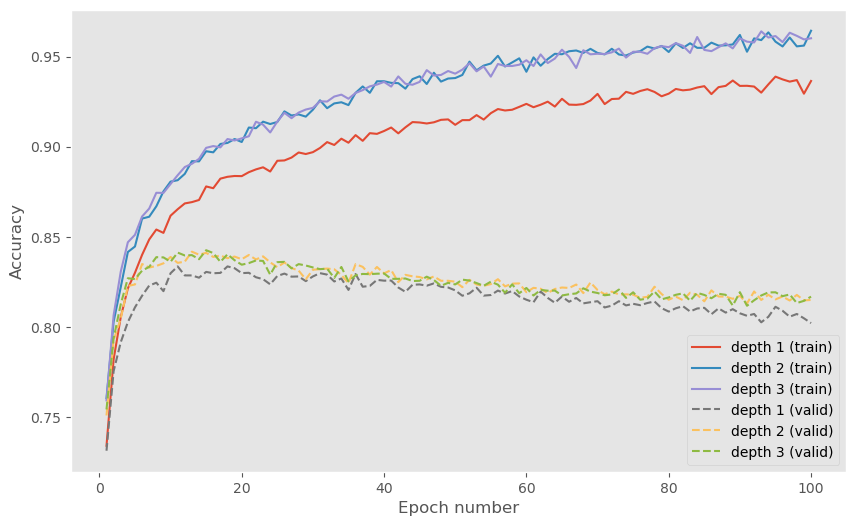

In [24]:
'''
    Question 3 - Plotting Training and Validation Accuracy across NNs with different depth 1,2,3
'''
# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Plot training accuracy for each depth
for i, stats in enumerate(all_stats):
    plt.plot(np.arange(1, stats.shape[0]), stats[1:, keys['acc(train)']],
             label=f'depth {num_of_layers[i]} (train)')

# Plot validation accuracy for each depth
for i, stats in enumerate(all_stats):
    plt.plot(np.arange(1, stats.shape[0]), stats[1:, keys['acc(valid)']],
             linestyle='dashed', label=f'depth {num_of_layers[i]} (valid)')

# Set labels and legend
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Save the plot to a specified path
plt.savefig('/home/gvidias/mlpractical/figures/Question3Accuracy_plot.png')

# Show the plot
plt.show()




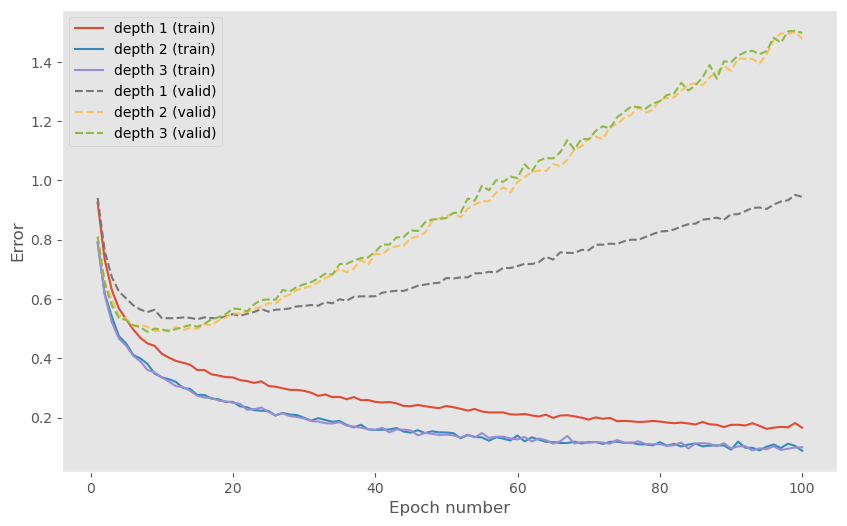

In [25]:
'''
    Question 3 - Plotting Training and Validation Error across NNs with different depth
'''
# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Plot training accuracy for each depth
for i, stats in enumerate(all_stats):
    plt.plot(np.arange(1, stats.shape[0]), stats[1:, keys['error(train)']],
             label=f'depth {num_of_layers[i]} (train)')

# Plot validation accuracy for each depth
for i, stats in enumerate(all_stats):
    plt.plot(np.arange(1, stats.shape[0]), stats[1:, keys['error(valid)']],
             linestyle='dashed', label=f'depth {num_of_layers[i]} (valid)')

# Set labels and legend
plt.xlabel('Epoch number')
plt.ylabel('Error')
plt.legend()
plt.grid()

# Save the plot to a specified path
plt.savefig('/home/gvidias/mlpractical/figures/Question3Error_plot.png')

# Show the plot
plt.show()


In [26]:
depth = [1, 2, 3]
for i, stats in enumerate(all_stats):
    print('The Training Accuracy is: {:.3f} of Depth {}'.format(stats[100:, keys['acc(train)']][0],depth[i]))
    print('The Validation Accuracy is: {:.3f} of Depth {}'.format(stats[100:, keys['acc(valid)']][0],depth[i]))
    print('The Training Error is: {:.3f} of Depth {}'.format(stats[100:, keys['error(train)']][0],depth[i]))
    print('The Validation Error is: {:.3f} of Depth {}'.format(stats[100:, keys['error(valid)']][0],depth[i]))
    print('\n')

The Training Accuracy is: 0.936 of Depth 1
The Validation Accuracy is: 0.802 of Depth 1
The Training Error is: 0.166 of Depth 1
The Validation Error is: 0.944 of Depth 1


The Training Accuracy is: 0.964 of Depth 2
The Validation Accuracy is: 0.815 of Depth 2
The Training Error is: 0.088 of Depth 2
The Validation Error is: 1.478 of Depth 2


The Training Accuracy is: 0.960 of Depth 3
The Validation Accuracy is: 0.817 of Depth 3
The Training Error is: 0.100 of Depth 3
The Validation Error is: 1.497 of Depth 3




  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.9s to complete
    error(train)=2.33e+00, acc(train)=4.34e-01, error(valid)=2.33e+00, acc(valid)=4.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.7s to complete
    error(train)=1.76e+00, acc(train)=5.45e-01, error(valid)=1.76e+00, acc(valid)=5.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.8s to complete
    error(train)=1.54e+00, acc(train)=5.84e-01, error(valid)=1.54e+00, acc(valid)=5.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.8s to complete
    error(train)=1.39e+00, acc(train)=6.17e-01, error(valid)=1.39e+00, acc(valid)=6.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.0s to complete
    error(train)=1.28e+00, acc(train)=6.42e-01, error(valid)=1.28e+00, acc(valid)=6.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.9s to complete
    error(train)=1.19e+00, acc(train)=6.64e-01, error(valid)=1.19e+00, acc(valid)=6.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.0s to complete
    error(train)=1.12e+00, acc(train)=6.78e-01, error(valid)=1.13e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.0s to complete
    error(train)=1.06e+00, acc(train)=6.93e-01, error(valid)=1.06e+00, acc(valid)=6.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.0s to complete
    error(train)=1.02e+00, acc(train)=7.01e-01, error(valid)=1.02e+00, acc(valid)=6.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.9s to complete
    error(train)=9.76e-01, acc(train)=7.13e-01, error(valid)=9.82e-01, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.0s to complete
    error(train)=9.35e-01, acc(train)=7.23e-01, error(valid)=9.42e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.0s to complete
    error(train)=9.07e-01, acc(train)=7.29e-01, error(valid)=9.16e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.1s to complete
    error(train)=8.76e-01, acc(train)=7.37e-01, error(valid)=8.85e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.0s to complete
    error(train)=8.56e-01, acc(train)=7.40e-01, error(valid)=8.66e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.2s to complete
    error(train)=8.32e-01, acc(train)=7.48e-01, error(valid)=8.44e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.2s to complete
    error(train)=8.10e-01, acc(train)=7.52e-01, error(valid)=8.22e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.1s to complete
    error(train)=7.89e-01, acc(train)=7.59e-01, error(valid)=8.03e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.2s to complete
    error(train)=7.74e-01, acc(train)=7.62e-01, error(valid)=7.89e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.1s to complete
    error(train)=7.60e-01, acc(train)=7.65e-01, error(valid)=7.76e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.2s to complete
    error(train)=7.44e-01, acc(train)=7.69e-01, error(valid)=7.60e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.1s to complete
    error(train)=7.33e-01, acc(train)=7.72e-01, error(valid)=7.51e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.2s to complete
    error(train)=7.17e-01, acc(train)=7.75e-01, error(valid)=7.36e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.2s to complete
    error(train)=7.12e-01, acc(train)=7.77e-01, error(valid)=7.31e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.6s to complete
    error(train)=6.97e-01, acc(train)=7.81e-01, error(valid)=7.18e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.1s to complete
    error(train)=6.88e-01, acc(train)=7.82e-01, error(valid)=7.09e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.3s to complete
    error(train)=6.78e-01, acc(train)=7.86e-01, error(valid)=7.00e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.2s to complete
    error(train)=6.67e-01, acc(train)=7.89e-01, error(valid)=6.90e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.2s to complete
    error(train)=6.61e-01, acc(train)=7.90e-01, error(valid)=6.86e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.2s to complete
    error(train)=6.56e-01, acc(train)=7.92e-01, error(valid)=6.80e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.3s to complete
    error(train)=6.47e-01, acc(train)=7.93e-01, error(valid)=6.73e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.2s to complete
    error(train)=6.38e-01, acc(train)=7.97e-01, error(valid)=6.65e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.2s to complete
    error(train)=6.32e-01, acc(train)=7.98e-01, error(valid)=6.59e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.2s to complete
    error(train)=6.26e-01, acc(train)=8.00e-01, error(valid)=6.53e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.1s to complete
    error(train)=6.16e-01, acc(train)=8.02e-01, error(valid)=6.45e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.2s to complete
    error(train)=6.13e-01, acc(train)=8.03e-01, error(valid)=6.41e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.2s to complete
    error(train)=6.12e-01, acc(train)=8.03e-01, error(valid)=6.42e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.2s to complete
    error(train)=6.01e-01, acc(train)=8.05e-01, error(valid)=6.32e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.3s to complete
    error(train)=5.99e-01, acc(train)=8.06e-01, error(valid)=6.32e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.2s to complete
    error(train)=5.91e-01, acc(train)=8.09e-01, error(valid)=6.23e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.2s to complete
    error(train)=5.86e-01, acc(train)=8.09e-01, error(valid)=6.17e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.2s to complete
    error(train)=5.81e-01, acc(train)=8.10e-01, error(valid)=6.14e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.2s to complete
    error(train)=5.81e-01, acc(train)=8.11e-01, error(valid)=6.15e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.2s to complete
    error(train)=5.75e-01, acc(train)=8.12e-01, error(valid)=6.10e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.3s to complete
    error(train)=5.70e-01, acc(train)=8.12e-01, error(valid)=6.06e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.1s to complete
    error(train)=5.65e-01, acc(train)=8.15e-01, error(valid)=6.00e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.1s to complete
    error(train)=5.66e-01, acc(train)=8.15e-01, error(valid)=6.02e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.1s to complete
    error(train)=5.57e-01, acc(train)=8.17e-01, error(valid)=5.95e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.1s to complete
    error(train)=5.55e-01, acc(train)=8.16e-01, error(valid)=5.92e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.2s to complete
    error(train)=5.51e-01, acc(train)=8.18e-01, error(valid)=5.90e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.2s to complete
    error(train)=5.49e-01, acc(train)=8.19e-01, error(valid)=5.87e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.4s to complete
    error(train)=5.46e-01, acc(train)=8.19e-01, error(valid)=5.87e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.4s to complete
    error(train)=5.42e-01, acc(train)=8.20e-01, error(valid)=5.82e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.2s to complete
    error(train)=5.38e-01, acc(train)=8.21e-01, error(valid)=5.79e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.3s to complete
    error(train)=5.37e-01, acc(train)=8.21e-01, error(valid)=5.79e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.3s to complete
    error(train)=5.34e-01, acc(train)=8.22e-01, error(valid)=5.75e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.4s to complete
    error(train)=5.32e-01, acc(train)=8.23e-01, error(valid)=5.75e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.4s to complete
    error(train)=5.28e-01, acc(train)=8.24e-01, error(valid)=5.71e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.2s to complete
    error(train)=5.26e-01, acc(train)=8.24e-01, error(valid)=5.70e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.3s to complete
    error(train)=5.21e-01, acc(train)=8.26e-01, error(valid)=5.65e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.4s to complete
    error(train)=5.19e-01, acc(train)=8.26e-01, error(valid)=5.64e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.3s to complete
    error(train)=5.16e-01, acc(train)=8.27e-01, error(valid)=5.62e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.2s to complete
    error(train)=5.13e-01, acc(train)=8.28e-01, error(valid)=5.60e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.3s to complete
    error(train)=5.13e-01, acc(train)=8.28e-01, error(valid)=5.60e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.3s to complete
    error(train)=5.10e-01, acc(train)=8.28e-01, error(valid)=5.58e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.4s to complete
    error(train)=5.06e-01, acc(train)=8.30e-01, error(valid)=5.54e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.3s to complete
    error(train)=5.06e-01, acc(train)=8.30e-01, error(valid)=5.54e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.4s to complete
    error(train)=5.03e-01, acc(train)=8.31e-01, error(valid)=5.52e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.3s to complete
    error(train)=5.00e-01, acc(train)=8.31e-01, error(valid)=5.51e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.3s to complete
    error(train)=5.02e-01, acc(train)=8.31e-01, error(valid)=5.52e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.2s to complete
    error(train)=4.98e-01, acc(train)=8.32e-01, error(valid)=5.48e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.2s to complete
    error(train)=4.95e-01, acc(train)=8.33e-01, error(valid)=5.48e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.3s to complete
    error(train)=4.92e-01, acc(train)=8.34e-01, error(valid)=5.44e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.2s to complete
    error(train)=4.91e-01, acc(train)=8.34e-01, error(valid)=5.43e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.3s to complete
    error(train)=4.88e-01, acc(train)=8.35e-01, error(valid)=5.40e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.2s to complete
    error(train)=4.86e-01, acc(train)=8.36e-01, error(valid)=5.40e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.3s to complete
    error(train)=4.88e-01, acc(train)=8.35e-01, error(valid)=5.39e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.2s to complete
    error(train)=4.86e-01, acc(train)=8.35e-01, error(valid)=5.39e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.4s to complete
    error(train)=4.81e-01, acc(train)=8.36e-01, error(valid)=5.37e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.3s to complete
    error(train)=4.82e-01, acc(train)=8.35e-01, error(valid)=5.37e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.3s to complete
    error(train)=4.81e-01, acc(train)=8.37e-01, error(valid)=5.36e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.3s to complete
    error(train)=4.76e-01, acc(train)=8.38e-01, error(valid)=5.30e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.3s to complete
    error(train)=4.74e-01, acc(train)=8.38e-01, error(valid)=5.29e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.5s to complete
    error(train)=4.74e-01, acc(train)=8.38e-01, error(valid)=5.29e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.3s to complete
    error(train)=4.71e-01, acc(train)=8.39e-01, error(valid)=5.28e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.4s to complete
    error(train)=4.70e-01, acc(train)=8.39e-01, error(valid)=5.27e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.5s to complete
    error(train)=4.68e-01, acc(train)=8.39e-01, error(valid)=5.26e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.4s to complete
    error(train)=4.69e-01, acc(train)=8.39e-01, error(valid)=5.26e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.7s to complete
    error(train)=4.65e-01, acc(train)=8.41e-01, error(valid)=5.23e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.4s to complete
    error(train)=4.64e-01, acc(train)=8.41e-01, error(valid)=5.22e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.3s to complete
    error(train)=4.65e-01, acc(train)=8.41e-01, error(valid)=5.24e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.4s to complete
    error(train)=4.64e-01, acc(train)=8.41e-01, error(valid)=5.23e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.4s to complete
    error(train)=4.60e-01, acc(train)=8.42e-01, error(valid)=5.21e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.4s to complete
    error(train)=4.60e-01, acc(train)=8.43e-01, error(valid)=5.21e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.4s to complete
    error(train)=4.57e-01, acc(train)=8.43e-01, error(valid)=5.18e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.4s to complete
    error(train)=4.58e-01, acc(train)=8.42e-01, error(valid)=5.20e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.4s to complete
    error(train)=4.55e-01, acc(train)=8.43e-01, error(valid)=5.15e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.3s to complete
    error(train)=4.59e-01, acc(train)=8.42e-01, error(valid)=5.20e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.1s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.2s to complete
    error(train)=4.51e-01, acc(train)=8.44e-01, error(valid)=5.14e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.3s to complete
    error(train)=4.51e-01, acc(train)=8.45e-01, error(valid)=5.14e-01, acc(valid)=8.27e-01


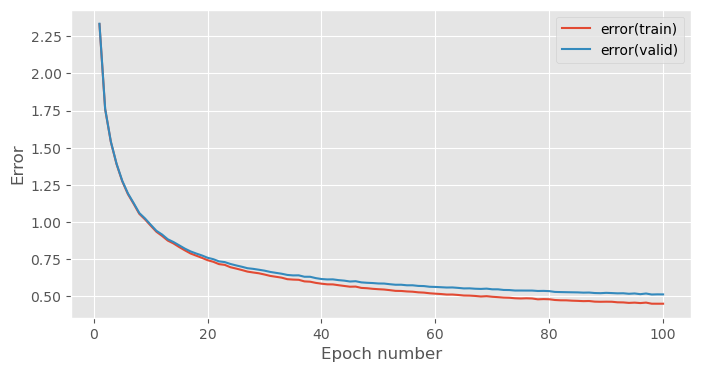

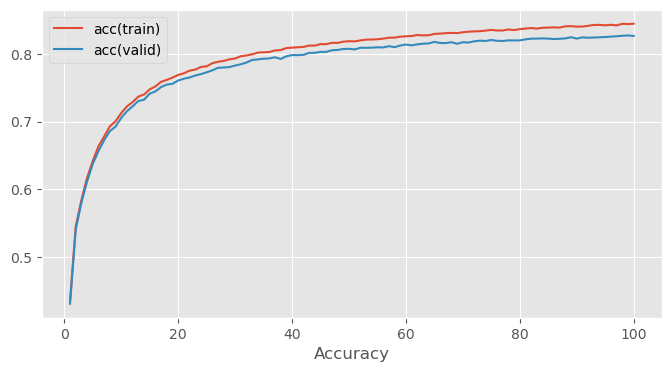

In [17]:
'''
    Task 3, Training of NN with 3 hidden Layers of 128 units and Relu as an activation function,
    applying DropoutLayer, for keeping rate 0.7.
'''
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.layers import DropoutLayer
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
import numpy as np
learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
# Create model with Three hidden layers
# probabilities = [0.6,0.7,0.85,0.97]
# Seed a random number generator
keep_rate = 0.7
seed = 11102019 
rng = np.random.RandomState(seed)
model = MultipleLayerModel([
    # first hidden layer
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # third hidden layer
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
Dropout_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2  = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
plt.show()

In [21]:
# Print the validation accuracy, error and training error for the last epoch of model's training
# Dropout regularization technique with keep_rate = 0.7, deactivate all neurons 
keep_rate = 0.7
print('DropOut with probability{}, the training error: {}'.format(keep_rate,Dropout_stats[100, keys['error(train)']]))
print('DropOut with probability{}, the validation error: {}'.format(keep_rate,Dropout_stats[100, keys['error(valid)']]))
print('DropOut with probability{}, the validation accuracy: {}'.format(keep_rate,Dropout_stats[100, keys['acc(valid)']]))

DropOut with probability0.7, the training error: 0.4510396461796239
DropOut with probability0.7, the validation error: 0.5136391667515902
DropOut with probability0.7, the validation accuracy: 0.8267088607594936


In [6]:
'''
    Task 3, Training of NN with 3 hidden Layers of 128 units and Relu as an activation function,
    applying L1 Penalty to the weights and biases.
    lambdas = 1e-3
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty
from mlp.penalties import L2Penalty
import numpy as np
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)


learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
# Create model with Three hidden layers
pelanty_coefficients = 1e-3
L1_stats = []
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
L1_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.8s to complete
    error(train)=1.71e+00, acc(train)=5.49e-01, error(valid)=1.71e+00, acc(valid)=5.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.1s to complete
    error(train)=1.55e+00, acc(train)=5.89e-01, error(valid)=1.55e+00, acc(valid)=5.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.1s to complete
    error(train)=1.47e+00, acc(train)=6.07e-01, error(valid)=1.48e+00, acc(valid)=5.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.9s to complete
    error(train)=1.42e+00, acc(train)=6.16e-01, error(valid)=1.43e+00, acc(valid)=6.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.9s to complete
    error(train)=1.38e+00, acc(train)=6.28e-01, error(valid)=1.38e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.9s to complete
    error(train)=1.35e+00, acc(train)=6.33e-01, error(valid)=1.36e+00, acc(valid)=6.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.9s to complete
    error(train)=1.32e+00, acc(train)=6.40e-01, error(valid)=1.33e+00, acc(valid)=6.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.9s to complete
    error(train)=1.30e+00, acc(train)=6.45e-01, error(valid)=1.30e+00, acc(valid)=6.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.0s to complete
    error(train)=1.27e+00, acc(train)=6.51e-01, error(valid)=1.28e+00, acc(valid)=6.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.9s to complete
    error(train)=1.26e+00, acc(train)=6.54e-01, error(valid)=1.26e+00, acc(valid)=6.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.0s to complete
    error(train)=1.24e+00, acc(train)=6.58e-01, error(valid)=1.24e+00, acc(valid)=6.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.0s to complete
    error(train)=1.22e+00, acc(train)=6.60e-01, error(valid)=1.23e+00, acc(valid)=6.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.0s to complete
    error(train)=1.21e+00, acc(train)=6.63e-01, error(valid)=1.21e+00, acc(valid)=6.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.1s to complete
    error(train)=1.19e+00, acc(train)=6.68e-01, error(valid)=1.20e+00, acc(valid)=6.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.1s to complete
    error(train)=1.18e+00, acc(train)=6.70e-01, error(valid)=1.19e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.1s to complete
    error(train)=1.17e+00, acc(train)=6.70e-01, error(valid)=1.17e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.1s to complete
    error(train)=1.16e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.0s to complete
    error(train)=1.14e+00, acc(train)=6.79e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.9s to complete
    error(train)=1.13e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.1s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.1s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.1s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.11e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.0s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.0s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.09e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.1s to complete
    error(train)=1.08e+00, acc(train)=6.93e-01, error(valid)=1.08e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.1s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.0s to complete
    error(train)=1.06e+00, acc(train)=6.98e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.0s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.0s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.06e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.0s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.05e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.0s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.0s to complete
    error(train)=1.03e+00, acc(train)=7.06e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.0s to complete
    error(train)=1.02e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.0s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.0s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.9s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.1s to complete
    error(train)=1.00e+00, acc(train)=7.12e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.0s to complete
    error(train)=1.00e+00, acc(train)=7.14e-01, error(valid)=1.01e+00, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.5s to complete
    error(train)=9.98e-01, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.1s to complete
    error(train)=9.92e-01, acc(train)=7.17e-01, error(valid)=1.00e+00, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.1s to complete
    error(train)=9.92e-01, acc(train)=7.16e-01, error(valid)=1.00e+00, acc(valid)=7.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.1s to complete
    error(train)=9.84e-01, acc(train)=7.18e-01, error(valid)=9.92e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.1s to complete
    error(train)=9.81e-01, acc(train)=7.18e-01, error(valid)=9.89e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.1s to complete
    error(train)=9.76e-01, acc(train)=7.20e-01, error(valid)=9.84e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.1s to complete
    error(train)=9.73e-01, acc(train)=7.20e-01, error(valid)=9.81e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.2s to complete
    error(train)=9.70e-01, acc(train)=7.20e-01, error(valid)=9.78e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.2s to complete
    error(train)=9.66e-01, acc(train)=7.21e-01, error(valid)=9.75e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.1s to complete
    error(train)=9.60e-01, acc(train)=7.24e-01, error(valid)=9.69e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.1s to complete
    error(train)=9.58e-01, acc(train)=7.25e-01, error(valid)=9.67e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.1s to complete
    error(train)=9.56e-01, acc(train)=7.24e-01, error(valid)=9.64e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.1s to complete
    error(train)=9.54e-01, acc(train)=7.25e-01, error(valid)=9.62e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.1s to complete
    error(train)=9.50e-01, acc(train)=7.26e-01, error(valid)=9.59e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.1s to complete
    error(train)=9.47e-01, acc(train)=7.27e-01, error(valid)=9.56e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.0s to complete
    error(train)=9.43e-01, acc(train)=7.27e-01, error(valid)=9.51e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.1s to complete
    error(train)=9.40e-01, acc(train)=7.28e-01, error(valid)=9.50e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.2s to complete
    error(train)=9.38e-01, acc(train)=7.29e-01, error(valid)=9.47e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.0s to complete
    error(train)=9.36e-01, acc(train)=7.29e-01, error(valid)=9.44e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.1s to complete
    error(train)=9.33e-01, acc(train)=7.30e-01, error(valid)=9.42e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.2s to complete
    error(train)=9.30e-01, acc(train)=7.30e-01, error(valid)=9.41e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.1s to complete
    error(train)=9.29e-01, acc(train)=7.32e-01, error(valid)=9.39e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.2s to complete
    error(train)=9.26e-01, acc(train)=7.31e-01, error(valid)=9.35e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.1s to complete
    error(train)=9.22e-01, acc(train)=7.33e-01, error(valid)=9.32e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.2s to complete
    error(train)=9.21e-01, acc(train)=7.33e-01, error(valid)=9.31e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.1s to complete
    error(train)=9.20e-01, acc(train)=7.33e-01, error(valid)=9.32e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.1s to complete
    error(train)=9.17e-01, acc(train)=7.34e-01, error(valid)=9.27e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.0s to complete
    error(train)=9.17e-01, acc(train)=7.33e-01, error(valid)=9.26e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.1s to complete
    error(train)=9.14e-01, acc(train)=7.34e-01, error(valid)=9.24e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.1s to complete
    error(train)=9.13e-01, acc(train)=7.34e-01, error(valid)=9.23e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.2s to complete
    error(train)=9.09e-01, acc(train)=7.37e-01, error(valid)=9.18e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.1s to complete
    error(train)=9.09e-01, acc(train)=7.36e-01, error(valid)=9.18e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.1s to complete
    error(train)=9.08e-01, acc(train)=7.36e-01, error(valid)=9.17e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.1s to complete
    error(train)=9.05e-01, acc(train)=7.36e-01, error(valid)=9.16e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.2s to complete
    error(train)=9.04e-01, acc(train)=7.37e-01, error(valid)=9.14e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.1s to complete
    error(train)=9.02e-01, acc(train)=7.36e-01, error(valid)=9.12e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.2s to complete
    error(train)=9.05e-01, acc(train)=7.37e-01, error(valid)=9.15e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.2s to complete
    error(train)=9.03e-01, acc(train)=7.36e-01, error(valid)=9.12e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.3s to complete
    error(train)=9.00e-01, acc(train)=7.37e-01, error(valid)=9.10e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.1s to complete
    error(train)=9.01e-01, acc(train)=7.37e-01, error(valid)=9.11e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.1s to complete
    error(train)=8.95e-01, acc(train)=7.38e-01, error(valid)=9.05e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.0s to complete
    error(train)=8.93e-01, acc(train)=7.39e-01, error(valid)=9.01e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.1s to complete
    error(train)=8.94e-01, acc(train)=7.39e-01, error(valid)=9.02e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.1s to complete
    error(train)=8.90e-01, acc(train)=7.39e-01, error(valid)=9.00e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.1s to complete
    error(train)=8.90e-01, acc(train)=7.41e-01, error(valid)=9.00e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.3s to complete
    error(train)=8.87e-01, acc(train)=7.41e-01, error(valid)=8.97e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.3s to complete
    error(train)=8.88e-01, acc(train)=7.40e-01, error(valid)=8.99e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.4s to complete
    error(train)=8.89e-01, acc(train)=7.40e-01, error(valid)=8.98e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.3s to complete
    error(train)=8.86e-01, acc(train)=7.40e-01, error(valid)=8.96e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.3s to complete
    error(train)=8.83e-01, acc(train)=7.41e-01, error(valid)=8.92e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.2s to complete
    error(train)=8.82e-01, acc(train)=7.42e-01, error(valid)=8.92e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.3s to complete
    error(train)=8.79e-01, acc(train)=7.43e-01, error(valid)=8.91e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.1s to complete
    error(train)=8.80e-01, acc(train)=7.41e-01, error(valid)=8.91e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.1s to complete
    error(train)=8.79e-01, acc(train)=7.41e-01, error(valid)=8.90e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.3s to complete
    error(train)=8.77e-01, acc(train)=7.43e-01, error(valid)=8.88e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.2s to complete
    error(train)=8.76e-01, acc(train)=7.43e-01, error(valid)=8.87e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.3s to complete
    error(train)=8.75e-01, acc(train)=7.43e-01, error(valid)=8.85e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.1s to complete
    error(train)=8.73e-01, acc(train)=7.44e-01, error(valid)=8.84e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.1s to complete
    error(train)=8.74e-01, acc(train)=7.42e-01, error(valid)=8.84e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.1s to complete
    error(train)=8.73e-01, acc(train)=7.43e-01, error(valid)=8.84e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.4s to complete
    error(train)=8.70e-01, acc(train)=7.44e-01, error(valid)=8.81e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.4s to complete
    error(train)=8.70e-01, acc(train)=7.44e-01, error(valid)=8.81e-01, acc(valid)=7.40e-01


In [22]:
# Print the validation accuracy, error and training error for each completed iteration
pelanty_coefficients = 1e-3
print('L1 penalty with lambda {}, the training error: {}'.format(pelanty_coefficients,L1_stats[100, keys['error(train)']]))
print('L1 penalty with lambda {}, the validation error: {}'.format(pelanty_coefficients,L1_stats[100, keys['error(valid)']]))
print('L1 penalty with lambda {}, the validation accuracy: {}'.format(pelanty_coefficients,L1_stats[100, keys['acc(valid)']]))


L1 penalty with lambda 0.001, the training error: 0.8697011430326477
L1 penalty with lambda 0.001, the validation error: 0.8811694097907974
L1 penalty with lambda 0.001, the validation accuracy: 0.7398101265822786


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.0s to complete
    error(train)=1.38e+00, acc(train)=6.19e-01, error(valid)=1.39e+00, acc(valid)=6.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.9s to complete
    error(train)=1.16e+00, acc(train)=6.75e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.8s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.05e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.0s to complete
    error(train)=9.48e-01, acc(train)=7.27e-01, error(valid)=9.60e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.9s to complete
    error(train)=8.84e-01, acc(train)=7.42e-01, error(valid)=8.99e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.0s to complete
    error(train)=8.26e-01, acc(train)=7.58e-01, error(valid)=8.42e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.1s to complete
    error(train)=7.80e-01, acc(train)=7.70e-01, error(valid)=7.97e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.1s to complete
    error(train)=7.39e-01, acc(train)=7.81e-01, error(valid)=7.57e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.2s to complete
    error(train)=7.14e-01, acc(train)=7.86e-01, error(valid)=7.33e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.2s to complete
    error(train)=6.82e-01, acc(train)=7.95e-01, error(valid)=7.04e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.1s to complete
    error(train)=6.67e-01, acc(train)=7.98e-01, error(valid)=6.86e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.3s to complete
    error(train)=6.41e-01, acc(train)=8.04e-01, error(valid)=6.67e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.3s to complete
    error(train)=6.22e-01, acc(train)=8.10e-01, error(valid)=6.48e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.2s to complete
    error(train)=6.10e-01, acc(train)=8.12e-01, error(valid)=6.40e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.8s to complete
    error(train)=5.97e-01, acc(train)=8.16e-01, error(valid)=6.28e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.7s to complete
    error(train)=5.82e-01, acc(train)=8.20e-01, error(valid)=6.13e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.7s to complete
    error(train)=5.74e-01, acc(train)=8.21e-01, error(valid)=6.08e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.3s to complete
    error(train)=5.60e-01, acc(train)=8.26e-01, error(valid)=5.93e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.4s to complete
    error(train)=5.52e-01, acc(train)=8.27e-01, error(valid)=5.88e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.0s to complete
    error(train)=5.44e-01, acc(train)=8.29e-01, error(valid)=5.80e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.6s to complete
    error(train)=5.32e-01, acc(train)=8.32e-01, error(valid)=5.70e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 7.3s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.7s to complete
    error(train)=5.18e-01, acc(train)=8.36e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.3s to complete
    error(train)=5.09e-01, acc(train)=8.40e-01, error(valid)=5.52e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.3s to complete
    error(train)=5.12e-01, acc(train)=8.38e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.1s to complete
    error(train)=5.04e-01, acc(train)=8.39e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.1s to complete
    error(train)=4.95e-01, acc(train)=8.42e-01, error(valid)=5.41e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.4s to complete
    error(train)=4.92e-01, acc(train)=8.43e-01, error(valid)=5.40e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 8.5s to complete
    error(train)=4.87e-01, acc(train)=8.44e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.7s to complete
    error(train)=4.84e-01, acc(train)=8.45e-01, error(valid)=5.34e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 9.5s to complete
    error(train)=4.75e-01, acc(train)=8.47e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 9.1s to complete
    error(train)=4.71e-01, acc(train)=8.49e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.6s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.7s to complete
    error(train)=4.66e-01, acc(train)=8.52e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.3s to complete
    error(train)=4.61e-01, acc(train)=8.53e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.7s to complete
    error(train)=4.56e-01, acc(train)=8.54e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 8.2s to complete
    error(train)=4.52e-01, acc(train)=8.55e-01, error(valid)=5.08e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.8s to complete
    error(train)=4.51e-01, acc(train)=8.54e-01, error(valid)=5.08e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.2s to complete
    error(train)=4.47e-01, acc(train)=8.54e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 8.2s to complete
    error(train)=4.41e-01, acc(train)=8.58e-01, error(valid)=5.01e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 8.8s to complete
    error(train)=4.37e-01, acc(train)=8.59e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.4s to complete
    error(train)=4.38e-01, acc(train)=8.57e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.1s to complete
    error(train)=4.39e-01, acc(train)=8.57e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.0s to complete
    error(train)=4.29e-01, acc(train)=8.60e-01, error(valid)=4.93e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.7s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.3s to complete
    error(train)=4.27e-01, acc(train)=8.62e-01, error(valid)=4.89e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.8s to complete
    error(train)=4.26e-01, acc(train)=8.61e-01, error(valid)=4.91e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.2s to complete
    error(train)=4.21e-01, acc(train)=8.62e-01, error(valid)=4.87e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.9s to complete
    error(train)=4.18e-01, acc(train)=8.63e-01, error(valid)=4.85e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 8.6s to complete
    error(train)=4.17e-01, acc(train)=8.64e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.8s to complete
    error(train)=4.16e-01, acc(train)=8.64e-01, error(valid)=4.83e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.2s to complete
    error(train)=4.14e-01, acc(train)=8.65e-01, error(valid)=4.83e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.5s to complete
    error(train)=4.15e-01, acc(train)=8.65e-01, error(valid)=4.86e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.8s to complete
    error(train)=4.09e-01, acc(train)=8.66e-01, error(valid)=4.81e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.5s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=4.78e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 8.6s to complete
    error(train)=4.06e-01, acc(train)=8.67e-01, error(valid)=4.75e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 9.1s to complete
    error(train)=4.07e-01, acc(train)=8.67e-01, error(valid)=4.76e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 9.8s to complete
    error(train)=4.05e-01, acc(train)=8.68e-01, error(valid)=4.77e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.5s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=4.81e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 9.0s to complete
    error(train)=4.03e-01, acc(train)=8.68e-01, error(valid)=4.75e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 8.7s to complete
    error(train)=3.96e-01, acc(train)=8.70e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.7s to complete
    error(train)=3.95e-01, acc(train)=8.71e-01, error(valid)=4.69e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.8s to complete
    error(train)=3.95e-01, acc(train)=8.70e-01, error(valid)=4.69e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.9s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=4.68e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 8.5s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=4.69e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 8.6s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=4.66e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.2s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=4.67e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.8s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 8.5s to complete
    error(train)=3.93e-01, acc(train)=8.70e-01, error(valid)=4.70e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.4s to complete
    error(train)=3.90e-01, acc(train)=8.72e-01, error(valid)=4.67e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 9.1s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 9.1s to complete
    error(train)=3.82e-01, acc(train)=8.75e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 8.7s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=4.63e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 8.4s to complete
    error(train)=3.88e-01, acc(train)=8.72e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 9.2s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=4.63e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.7s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=4.60e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.5s to complete
    error(train)=3.80e-01, acc(train)=8.74e-01, error(valid)=4.61e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.8s to complete
    error(train)=3.80e-01, acc(train)=8.74e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.6s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 7.4s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.4s to complete
    error(train)=3.76e-01, acc(train)=8.76e-01, error(valid)=4.61e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.0s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=4.59e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 7.6s to complete
    error(train)=3.73e-01, acc(train)=8.77e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.1s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.6s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=4.65e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.3s to complete
    error(train)=3.73e-01, acc(train)=8.76e-01, error(valid)=4.58e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.2s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.9s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=4.56e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.3s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=4.56e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.8s to complete
    error(train)=3.67e-01, acc(train)=8.78e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.8s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=4.55e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.7s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.7s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=4.55e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.6s to complete
    error(train)=3.63e-01, acc(train)=8.79e-01, error(valid)=4.52e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.8s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=4.55e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.1s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 7.6s to complete
    error(train)=3.59e-01, acc(train)=8.82e-01, error(valid)=4.46e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 10.0s to complete
    error(train)=3.59e-01, acc(train)=8.79e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 10.6s to complete
    error(train)=3.62e-01, acc(train)=8.79e-01, error(valid)=4.54e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.7s to complete
    error(train)=3.62e-01, acc(train)=8.79e-01, error(valid)=4.49e-01, acc(valid)=8.49e-01


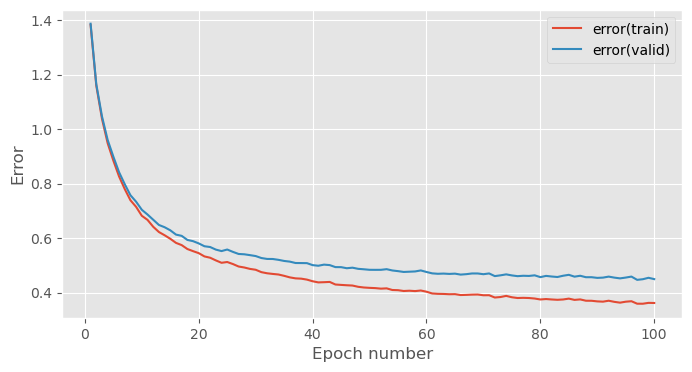

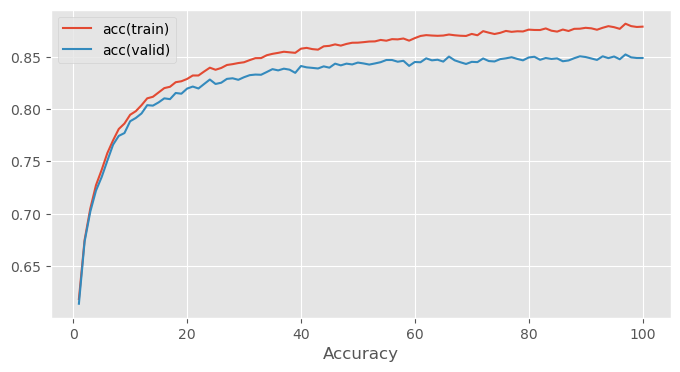

In [23]:
'''
    Task 3, Training of NN with 3 hidden Layers of 128 units and Relu as an activation function,
    applying L2 Penalty to the weights and biases.
    lambdas = 1e-3
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L2Penalty
import numpy as np
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)


learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
pelanty_coefficients = 1e-3

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
L2_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
plt.show()

In [25]:
# Print the validation accuracy, error and training error for each completed iteration
plt.figure(figsize=(10, 6))
pelanty_coefficients =  1e-3

print('L2 penalty with lambda {}, the training error: {}'.format(pelanty_coefficients,L2_stats[100, keys['error(train)']]))
print('L2 penalty with lambda {}, the validation error: {}'.format(pelanty_coefficients,L2_stats[100, keys['error(valid)']]))
print('L2 penalty with lambda {}, the validation accuracy: {}'.format(pelanty_coefficients,L2_stats[100, keys['acc(valid)']]))

L2 penalty with lambda 0.001, the training error: 0.3615470491366372
L2 penalty with lambda 0.001, the validation error: 0.449165510876587
L2 penalty with lambda 0.001, the validation accuracy: 0.8488607594936702


KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.0s to complete
    error(train)=1.90e+00, acc(train)=6.35e-01, error(valid)=1.43e+00, acc(valid)=6.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.9s to complete
    error(train)=1.72e+00, acc(train)=6.93e-01, error(valid)=1.21e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.0s to complete
    error(train)=1.62e+00, acc(train)=7.27e-01, error(valid)=1.08e+00, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.9s to complete
    error(train)=1.54e+00, acc(train)=7.52e-01, error(valid)=9.99e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.9s to complete
    error(train)=1.49e+00, acc(train)=7.66e-01, error(valid)=9.36e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.0s to complete
    error(train)=1.45e+00, acc(train)=7.78e-01, error(valid)=8.89e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.0s to complete
    error(train)=1.41e+00, acc(train)=7.87e-01, error(valid)=8.56e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.9s to complete
    error(train)=1.39e+00, acc(train)=7.96e-01, error(valid)=8.28e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.8s to complete
    error(train)=1.36e+00, acc(train)=8.05e-01, error(valid)=7.99e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.9s to complete
    error(train)=1.34e+00, acc(train)=8.09e-01, error(valid)=7.76e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.9s to complete
    error(train)=1.32e+00, acc(train)=8.16e-01, error(valid)=7.58e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.9s to complete
    error(train)=1.30e+00, acc(train)=8.21e-01, error(valid)=7.44e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.0s to complete
    error(train)=1.29e+00, acc(train)=8.24e-01, error(valid)=7.31e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.9s to complete
    error(train)=1.27e+00, acc(train)=8.27e-01, error(valid)=7.15e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.0s to complete
    error(train)=1.27e+00, acc(train)=8.30e-01, error(valid)=7.12e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.0s to complete
    error(train)=1.25e+00, acc(train)=8.34e-01, error(valid)=7.01e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.0s to complete
    error(train)=1.24e+00, acc(train)=8.39e-01, error(valid)=6.89e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.1s to complete
    error(train)=1.24e+00, acc(train)=8.38e-01, error(valid)=6.85e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.0s to complete
    error(train)=1.22e+00, acc(train)=8.41e-01, error(valid)=6.73e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.9s to complete
    error(train)=1.22e+00, acc(train)=8.43e-01, error(valid)=6.64e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.1s to complete
    error(train)=1.21e+00, acc(train)=8.46e-01, error(valid)=6.59e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.9s to complete
    error(train)=1.20e+00, acc(train)=8.49e-01, error(valid)=6.54e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.1s to complete
    error(train)=1.20e+00, acc(train)=8.49e-01, error(valid)=6.54e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.3s to complete
    error(train)=1.19e+00, acc(train)=8.52e-01, error(valid)=6.48e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.1s to complete
    error(train)=1.19e+00, acc(train)=8.53e-01, error(valid)=6.47e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.3s to complete
    error(train)=1.18e+00, acc(train)=8.54e-01, error(valid)=6.41e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.2s to complete
    error(train)=1.18e+00, acc(train)=8.57e-01, error(valid)=6.38e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.1s to complete
    error(train)=1.17e+00, acc(train)=8.58e-01, error(valid)=6.36e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.9s to complete
    error(train)=1.17e+00, acc(train)=8.57e-01, error(valid)=6.35e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.9s to complete
    error(train)=1.16e+00, acc(train)=8.61e-01, error(valid)=6.28e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.1s to complete
    error(train)=1.16e+00, acc(train)=8.63e-01, error(valid)=6.26e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.0s to complete
    error(train)=1.15e+00, acc(train)=8.63e-01, error(valid)=6.18e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.0s to complete
    error(train)=1.15e+00, acc(train)=8.65e-01, error(valid)=6.17e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.9s to complete
    error(train)=1.14e+00, acc(train)=8.66e-01, error(valid)=6.16e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.9s to complete
    error(train)=1.14e+00, acc(train)=8.67e-01, error(valid)=6.15e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.0s to complete
    error(train)=1.13e+00, acc(train)=8.69e-01, error(valid)=6.07e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.1s to complete
    error(train)=1.13e+00, acc(train)=8.70e-01, error(valid)=6.09e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.9s to complete
    error(train)=1.13e+00, acc(train)=8.69e-01, error(valid)=6.05e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.0s to complete
    error(train)=1.13e+00, acc(train)=8.72e-01, error(valid)=6.06e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.0s to complete
    error(train)=1.12e+00, acc(train)=8.74e-01, error(valid)=6.02e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.9s to complete
    error(train)=1.12e+00, acc(train)=8.74e-01, error(valid)=6.02e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.2s to complete
    error(train)=1.12e+00, acc(train)=8.75e-01, error(valid)=6.01e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.9s to complete
    error(train)=1.11e+00, acc(train)=8.76e-01, error(valid)=5.95e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.1s to complete
    error(train)=1.11e+00, acc(train)=8.77e-01, error(valid)=5.92e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.0s to complete
    error(train)=1.11e+00, acc(train)=8.78e-01, error(valid)=5.93e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.9s to complete
    error(train)=1.11e+00, acc(train)=8.77e-01, error(valid)=5.91e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.9s to complete
    error(train)=1.10e+00, acc(train)=8.80e-01, error(valid)=5.94e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.9s to complete
    error(train)=1.10e+00, acc(train)=8.79e-01, error(valid)=5.95e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.0s to complete
    error(train)=1.10e+00, acc(train)=8.80e-01, error(valid)=5.93e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.9s to complete
    error(train)=1.10e+00, acc(train)=8.82e-01, error(valid)=5.89e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.1s to complete
    error(train)=1.09e+00, acc(train)=8.82e-01, error(valid)=5.84e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.9s to complete
    error(train)=1.09e+00, acc(train)=8.84e-01, error(valid)=5.85e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.0s to complete
    error(train)=1.09e+00, acc(train)=8.83e-01, error(valid)=5.85e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.1s to complete
    error(train)=1.09e+00, acc(train)=8.85e-01, error(valid)=5.88e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.9s to complete
    error(train)=1.09e+00, acc(train)=8.85e-01, error(valid)=5.83e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.0s to complete
    error(train)=1.08e+00, acc(train)=8.86e-01, error(valid)=5.84e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.0s to complete
    error(train)=1.08e+00, acc(train)=8.87e-01, error(valid)=5.86e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.0s to complete
    error(train)=1.08e+00, acc(train)=8.85e-01, error(valid)=5.80e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.1s to complete
    error(train)=1.08e+00, acc(train)=8.88e-01, error(valid)=5.79e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.0s to complete
    error(train)=1.08e+00, acc(train)=8.88e-01, error(valid)=5.79e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.0s to complete
    error(train)=1.08e+00, acc(train)=8.88e-01, error(valid)=5.85e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.0s to complete
    error(train)=1.07e+00, acc(train)=8.90e-01, error(valid)=5.77e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.0s to complete
    error(train)=1.07e+00, acc(train)=8.91e-01, error(valid)=5.75e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.0s to complete
    error(train)=1.07e+00, acc(train)=8.92e-01, error(valid)=5.81e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.0s to complete
    error(train)=1.07e+00, acc(train)=8.91e-01, error(valid)=5.75e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.0s to complete
    error(train)=1.06e+00, acc(train)=8.93e-01, error(valid)=5.77e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.0s to complete
    error(train)=1.07e+00, acc(train)=8.92e-01, error(valid)=5.78e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.0s to complete
    error(train)=1.06e+00, acc(train)=8.92e-01, error(valid)=5.77e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.9s to complete
    error(train)=1.06e+00, acc(train)=8.92e-01, error(valid)=5.78e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.0s to complete
    error(train)=1.06e+00, acc(train)=8.94e-01, error(valid)=5.76e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.0s to complete
    error(train)=1.06e+00, acc(train)=8.95e-01, error(valid)=5.72e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.9s to complete
    error(train)=1.06e+00, acc(train)=8.94e-01, error(valid)=5.73e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.1s to complete
    error(train)=1.06e+00, acc(train)=8.95e-01, error(valid)=5.71e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.0s to complete
    error(train)=1.05e+00, acc(train)=8.95e-01, error(valid)=5.75e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.2s to complete
    error(train)=1.05e+00, acc(train)=8.96e-01, error(valid)=5.74e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.1s to complete
    error(train)=1.05e+00, acc(train)=8.96e-01, error(valid)=5.78e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.9s to complete
    error(train)=1.05e+00, acc(train)=8.98e-01, error(valid)=5.66e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.0s to complete
    error(train)=1.05e+00, acc(train)=8.98e-01, error(valid)=5.73e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.0s to complete
    error(train)=1.05e+00, acc(train)=8.98e-01, error(valid)=5.74e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.0s to complete
    error(train)=1.05e+00, acc(train)=9.00e-01, error(valid)=5.75e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.0s to complete
    error(train)=1.04e+00, acc(train)=9.00e-01, error(valid)=5.73e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.0s to complete
    error(train)=1.04e+00, acc(train)=9.00e-01, error(valid)=5.73e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.9s to complete
    error(train)=1.04e+00, acc(train)=9.00e-01, error(valid)=5.73e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.0s to complete
    error(train)=1.04e+00, acc(train)=9.02e-01, error(valid)=5.68e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.0s to complete
    error(train)=1.04e+00, acc(train)=9.00e-01, error(valid)=5.71e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.1s to complete
    error(train)=1.04e+00, acc(train)=9.02e-01, error(valid)=5.70e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.0s to complete
    error(train)=1.04e+00, acc(train)=9.04e-01, error(valid)=5.65e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.9s to complete
    error(train)=1.04e+00, acc(train)=9.01e-01, error(valid)=5.69e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.0s to complete
    error(train)=1.03e+00, acc(train)=9.03e-01, error(valid)=5.75e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.0s to complete
    error(train)=1.03e+00, acc(train)=9.05e-01, error(valid)=5.67e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.1s to complete
    error(train)=1.03e+00, acc(train)=9.03e-01, error(valid)=5.66e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.0s to complete
    error(train)=1.03e+00, acc(train)=9.05e-01, error(valid)=5.68e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.1s to complete
    error(train)=1.03e+00, acc(train)=9.04e-01, error(valid)=5.68e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.1s to complete
    error(train)=1.03e+00, acc(train)=9.05e-01, error(valid)=5.71e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.9s to complete
    error(train)=1.03e+00, acc(train)=9.05e-01, error(valid)=5.72e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.0s to complete
    error(train)=1.03e+00, acc(train)=9.06e-01, error(valid)=5.67e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.0s to complete
    error(train)=1.02e+00, acc(train)=9.07e-01, error(valid)=5.69e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.0s to complete
    error(train)=1.02e+00, acc(train)=9.07e-01, error(valid)=5.68e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.0s to complete
    error(train)=1.02e+00, acc(train)=9.07e-01, error(valid)=5.68e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.0s to complete
    error(train)=1.03e+00, acc(train)=9.06e-01, error(valid)=5.67e-01, acc(valid)=8.52e-01


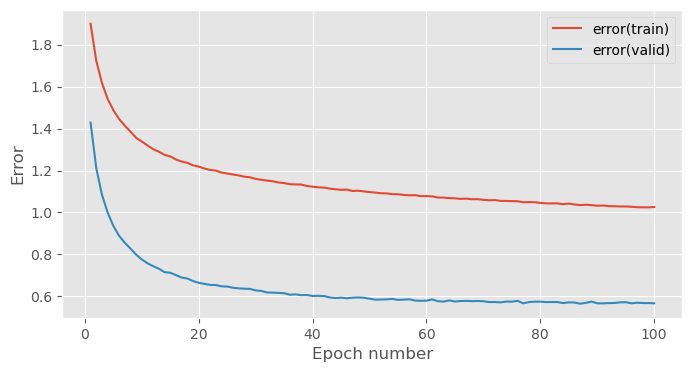

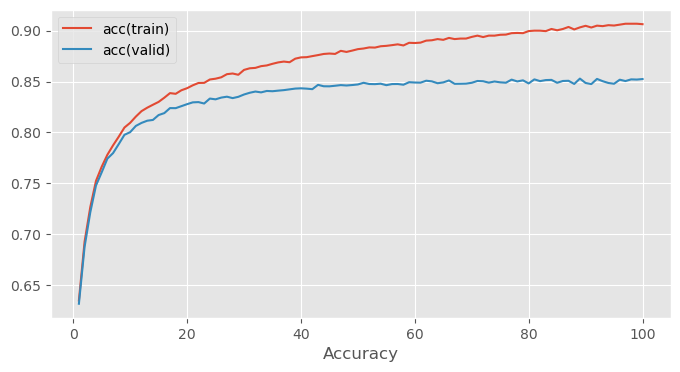

In [108]:
'''
    Task 3, Training of NN with 3 hidden Layers of 128 units and Relu as an activation function,
    and applying label smoothing to the outputs.
    lambdas = 1e-3
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider
import numpy as np
# which_set='train', batch_size=100, max_num_batches=-1,
#                  shuffle_order=True, rng=None, smooth_labels=False
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels=True)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng,smooth_labels=False)
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # third hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
smoothed_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
plt.show()

In [111]:
print('Smoothing with alpha 0.1, the training error: {:.3f}'.format(smoothed_stats[100, keys['error(train)']]))
print('Smoothing with alpha 0.1, the validation error: {:.3f}'.format(smoothed_stats[100, keys['error(valid)']]))
print('Smoothing with alpha 0.1, the validation accuracy: {:.3f}'.format(smoothed_stats[100, keys['acc(valid)']]))

Smoothing with alpha 0.1, the training error: 1.026
Smoothing with alpha 0.1, the validation error: 0.567
Smoothing with alpha 0.1, the validation accuracy: 0.852


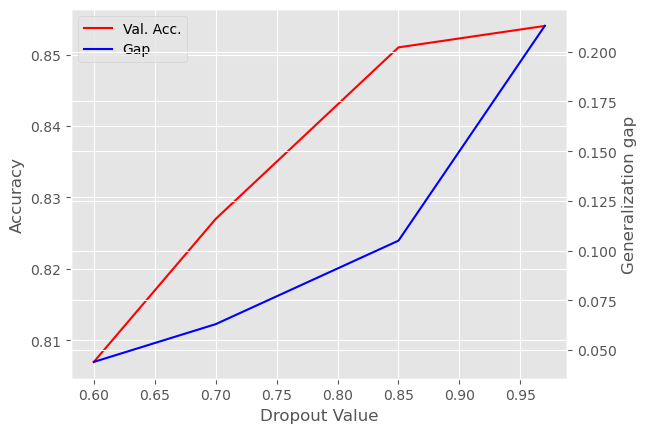

In [112]:
'''
    Task 3 Figure 4 Val. Acc. - Generalization Gap with Dropout
    
'''

fig, ax1 = plt.subplots()

labels = ["Val. Acc.","Gap"]
ax1.set_xlabel('Dropout Value')
ax1.set_ylabel('Accuracy')
l1 = ax1.plot(drop_out_hyperparameter_values, drop_out_validation_accuracy, "-r", label="Val. Acc.")


#create an axis oposite to the original one
ax2 = ax1.twinx()
ax2.set_ylabel('Generalization gap')
l2 = ax2.plot(drop_out_hyperparameter_values, gap, "-b", label="Gap")
lns = l1 + l2
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=0)

plt.savefig('/home/gvidias/mlpractical/figures/Question4DropoutAcc-Gap.png')
plt.show()



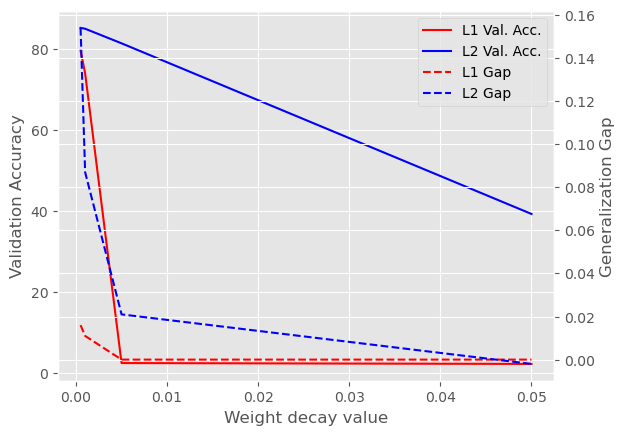

In [106]:

'''
    Task 3 Figure 4 Val. Acc. - Generalization Gap with L1, L2
    
'''
import numpy as np
import matplotlib.pyplot as plt


# Parameters and metrics for L1 and L2
parameters = [0.0005, 0.001, 0.005, 0.05]
L1_Val_Acc = [79.5, 73.9, 2.41, 2.20]
L1_Tr_Err = [0.642, 0.870, 3.850, 3.850]
L1_Val_Err = [0.658, 0.881, 3.850, 3.850]
L1_Gap = np.subtract(L1_Val_Err, L1_Tr_Err)

L2_Val_Acc = [85.1, 84.9, 81.3, 39.2]
L2_Tr_Err = [0.306, 0.362, 0.586, 2.258]
L2_Val_Err = [0.460, 0.449, 0.607, 2.256]
L2_Gap = np.subtract(L2_Val_Err, L2_Tr_Err)

# Create the figure and first axis
fig, ax1 = plt.subplots()

# Plotting validation accuracy for L1 and L2
ax1.set_xlabel('Weight decay value')
ax1.set_ylabel('Validation Accuracy')
ax1.plot(parameters, L1_Val_Acc, "-r", label="L1 Val. Acc.")
ax1.plot(parameters, L2_Val_Acc, "-b", label="L2 Val. Acc.")

ax2 = ax1.twinx()
ax2.set_ylabel('Generalization Gap')
ax2.plot(parameters, L1_Gap, linestyle='dashed', color='r', label="L1 Gap")
ax2.plot(parameters, L2_Gap, linestyle='dashed', color='b', label="L2 Gap")

# Combine lines for the legend
lines = ax1.get_lines() + ax2.get_lines()  
labels = [l.get_label() for l in lines]  
# Set the legend
plt.legend(lines, labels, loc='upper right')

# Save and show the plot
plt.savefig('/home/gvidias/mlpractical/figures/Question4L1L2Acc-Gap.png')
plt.show()


KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.0s to complete
    error(train)=1.76e+00, acc(train)=5.45e-01, error(valid)=1.76e+00, acc(valid)=5.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.4s to complete
    error(train)=1.40e+00, acc(train)=6.14e-01, error(valid)=1.41e+00, acc(valid)=6.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.3s to complete
    error(train)=1.24e+00, acc(train)=6.49e-01, error(valid)=1.25e+00, acc(valid)=6.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.3s to complete
    error(train)=1.13e+00, acc(train)=6.77e-01, error(valid)=1.14e+00, acc(valid)=6.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.3s to complete
    error(train)=1.05e+00, acc(train)=6.97e-01, error(valid)=1.06e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.4s to complete
    error(train)=9.83e-01, acc(train)=7.11e-01, error(valid)=9.92e-01, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.4s to complete
    error(train)=9.25e-01, acc(train)=7.27e-01, error(valid)=9.35e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.4s to complete
    error(train)=8.78e-01, acc(train)=7.39e-01, error(valid)=8.87e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.3s to complete
    error(train)=8.37e-01, acc(train)=7.50e-01, error(valid)=8.47e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.4s to complete
    error(train)=7.98e-01, acc(train)=7.58e-01, error(valid)=8.10e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=7.72e-01, acc(train)=7.65e-01, error(valid)=7.85e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.8s to complete
    error(train)=7.49e-01, acc(train)=7.71e-01, error(valid)=7.62e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.8s to complete
    error(train)=7.20e-01, acc(train)=7.79e-01, error(valid)=7.34e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.9s to complete
    error(train)=7.05e-01, acc(train)=7.82e-01, error(valid)=7.21e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 6.9s to complete
    error(train)=6.84e-01, acc(train)=7.88e-01, error(valid)=7.01e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 8.1s to complete
    error(train)=6.74e-01, acc(train)=7.90e-01, error(valid)=6.91e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 9.5s to complete
    error(train)=6.57e-01, acc(train)=7.94e-01, error(valid)=6.76e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 12.5s to complete
    error(train)=6.43e-01, acc(train)=7.99e-01, error(valid)=6.63e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 11.3s to complete
    error(train)=6.35e-01, acc(train)=8.00e-01, error(valid)=6.57e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.7s to complete
    error(train)=6.23e-01, acc(train)=8.03e-01, error(valid)=6.45e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.6s to complete
    error(train)=6.15e-01, acc(train)=8.04e-01, error(valid)=6.37e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 9.7s to complete
    error(train)=6.03e-01, acc(train)=8.09e-01, error(valid)=6.27e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 10.5s to complete
    error(train)=6.01e-01, acc(train)=8.08e-01, error(valid)=6.26e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.7s to complete
    error(train)=5.92e-01, acc(train)=8.11e-01, error(valid)=6.17e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.2s to complete
    error(train)=5.83e-01, acc(train)=8.14e-01, error(valid)=6.09e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.7s to complete
    error(train)=5.76e-01, acc(train)=8.16e-01, error(valid)=6.02e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 7.6s to complete
    error(train)=5.72e-01, acc(train)=8.17e-01, error(valid)=5.99e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.5s to complete
    error(train)=5.67e-01, acc(train)=8.17e-01, error(valid)=5.94e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 11.9s to complete
    error(train)=5.67e-01, acc(train)=8.18e-01, error(valid)=5.94e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 11.2s to complete
    error(train)=5.55e-01, acc(train)=8.21e-01, error(valid)=5.83e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 11.5s to complete
    error(train)=5.52e-01, acc(train)=8.22e-01, error(valid)=5.80e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 11.6s to complete
    error(train)=5.45e-01, acc(train)=8.24e-01, error(valid)=5.74e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 9.9s to complete
    error(train)=5.42e-01, acc(train)=8.25e-01, error(valid)=5.70e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 9.9s to complete
    error(train)=5.38e-01, acc(train)=8.26e-01, error(valid)=5.68e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 10.1s to complete
    error(train)=5.33e-01, acc(train)=8.27e-01, error(valid)=5.64e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.3s to complete
    error(train)=5.33e-01, acc(train)=8.27e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 10.3s to complete
    error(train)=5.28e-01, acc(train)=8.28e-01, error(valid)=5.58e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 10.8s to complete
    error(train)=5.21e-01, acc(train)=8.31e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.7s to complete
    error(train)=5.20e-01, acc(train)=8.31e-01, error(valid)=5.51e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 10.1s to complete
    error(train)=5.14e-01, acc(train)=8.32e-01, error(valid)=5.45e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 10.7s to complete
    error(train)=5.17e-01, acc(train)=8.32e-01, error(valid)=5.49e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 10.4s to complete
    error(train)=5.10e-01, acc(train)=8.34e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 11.5s to complete
    error(train)=5.09e-01, acc(train)=8.34e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.6s to complete
    error(train)=5.04e-01, acc(train)=8.35e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 9.1s to complete
    error(train)=5.03e-01, acc(train)=8.35e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.0s to complete
    error(train)=4.98e-01, acc(train)=8.38e-01, error(valid)=5.31e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.6s to complete
    error(train)=4.99e-01, acc(train)=8.37e-01, error(valid)=5.32e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 8.5s to complete
    error(train)=4.94e-01, acc(train)=8.38e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 9.1s to complete
    error(train)=4.92e-01, acc(train)=8.39e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.8s to complete
    error(train)=4.91e-01, acc(train)=8.39e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 8.3s to complete
    error(train)=4.88e-01, acc(train)=8.40e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 8.2s to complete
    error(train)=4.88e-01, acc(train)=8.40e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.0s to complete
    error(train)=4.85e-01, acc(train)=8.41e-01, error(valid)=5.18e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 8.3s to complete
    error(train)=4.83e-01, acc(train)=8.41e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.0s to complete
    error(train)=4.81e-01, acc(train)=8.41e-01, error(valid)=5.17e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.7s to complete
    error(train)=4.79e-01, acc(train)=8.42e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 8.2s to complete
    error(train)=4.79e-01, acc(train)=8.42e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.0s to complete
    error(train)=4.78e-01, acc(train)=8.42e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.3s to complete
    error(train)=4.72e-01, acc(train)=8.44e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 8.2s to complete
    error(train)=4.72e-01, acc(train)=8.44e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.7s to complete
    error(train)=4.71e-01, acc(train)=8.45e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 8.2s to complete
    error(train)=4.69e-01, acc(train)=8.45e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 7.8s to complete
    error(train)=4.69e-01, acc(train)=8.44e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.9s to complete
    error(train)=4.70e-01, acc(train)=8.44e-01, error(valid)=5.08e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.5s to complete
    error(train)=4.66e-01, acc(train)=8.45e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.6s to complete
    error(train)=4.65e-01, acc(train)=8.46e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 8.2s to complete
    error(train)=4.68e-01, acc(train)=8.45e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 7.9s to complete
    error(train)=4.64e-01, acc(train)=8.46e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.6s to complete
    error(train)=4.62e-01, acc(train)=8.46e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.6s to complete
    error(train)=4.65e-01, acc(train)=8.45e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 8.3s to complete
    error(train)=4.59e-01, acc(train)=8.48e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 8.2s to complete
    error(train)=4.61e-01, acc(train)=8.46e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.1s to complete
    error(train)=4.58e-01, acc(train)=8.48e-01, error(valid)=4.98e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.8s to complete
    error(train)=4.57e-01, acc(train)=8.49e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 8.2s to complete
    error(train)=4.56e-01, acc(train)=8.48e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 8.2s to complete
    error(train)=4.55e-01, acc(train)=8.48e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 7.8s to complete
    error(train)=4.56e-01, acc(train)=8.48e-01, error(valid)=4.95e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.0s to complete
    error(train)=4.52e-01, acc(train)=8.50e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 7.6s to complete
    error(train)=4.51e-01, acc(train)=8.50e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.0s to complete
    error(train)=4.50e-01, acc(train)=8.48e-01, error(valid)=4.89e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 8.0s to complete
    error(train)=4.51e-01, acc(train)=8.50e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.0s to complete
    error(train)=4.49e-01, acc(train)=8.51e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.0s to complete
    error(train)=4.48e-01, acc(train)=8.50e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.3s to complete
    error(train)=4.47e-01, acc(train)=8.51e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.3s to complete
    error(train)=4.47e-01, acc(train)=8.51e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.6s to complete
    error(train)=4.48e-01, acc(train)=8.50e-01, error(valid)=4.89e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.4s to complete
    error(train)=4.47e-01, acc(train)=8.51e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.2s to complete
    error(train)=4.43e-01, acc(train)=8.53e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.4s to complete
    error(train)=4.44e-01, acc(train)=8.52e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 8.0s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=4.86e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.7s to complete
    error(train)=4.43e-01, acc(train)=8.52e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 8.2s to complete
    error(train)=4.43e-01, acc(train)=8.53e-01, error(valid)=4.84e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 8.1s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=4.84e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.3s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.6s to complete
    error(train)=4.39e-01, acc(train)=8.53e-01, error(valid)=4.82e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.4s to complete
    error(train)=4.40e-01, acc(train)=8.53e-01, error(valid)=4.82e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.0s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.7s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=4.79e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.0s to complete
    error(train)=4.36e-01, acc(train)=8.54e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.0s to complete
    error(train)=4.35e-01, acc(train)=8.55e-01, error(valid)=4.77e-01, acc(valid)=8.41e-01


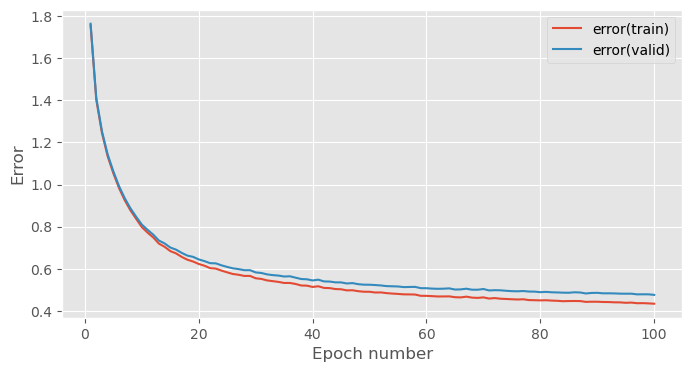

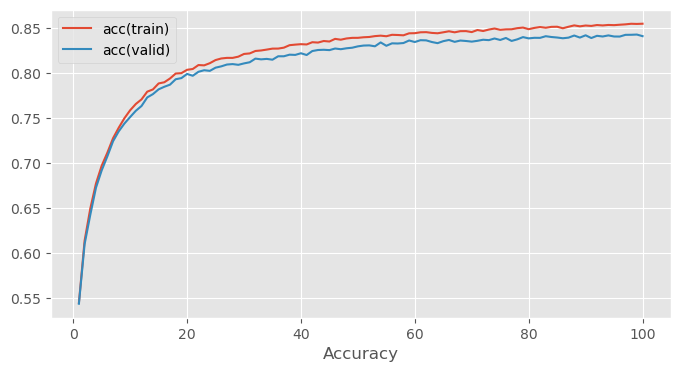

In [124]:

'''
    Task 3  Question 7 - 8 erxperiments with combination of Dropout L1, and L2 penalties


    Experiment 1o - Application of Dropout and L2 penalty in each of hidden layers 
                    with incl_prob = 0.85 and penalty_coefficient = 1e-3
    
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L2Penalty
import numpy as np
from mlp.layers import DropoutLayer
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels=False)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng,smooth_labels=False)

learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
pelanty_coefficients = 1e-3
keep_rate = 0.85
seed = 11102019 
rng = np.random.RandomState(seed)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
L2_Dropout_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

fig_1.savefig('/home/gvidias/mlpractical/figures/experiment_1_dropout_0.85_L2_0.001_error.png')
fig_2.savefig('/home/gvidias/mlpractical/figures/experiment_1_dropout_0.85_L2_0.001_accuracy.png')

# Show the plots
plt.show()






KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.2s to complete
    error(train)=2.32e+00, acc(train)=4.36e-01, error(valid)=2.32e+00, acc(valid)=4.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.3s to complete
    error(train)=1.77e+00, acc(train)=5.45e-01, error(valid)=1.77e+00, acc(valid)=5.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.3s to complete
    error(train)=1.55e+00, acc(train)=5.86e-01, error(valid)=1.56e+00, acc(valid)=5.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.4s to complete
    error(train)=1.40e+00, acc(train)=6.15e-01, error(valid)=1.41e+00, acc(valid)=6.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.4s to complete
    error(train)=1.32e+00, acc(train)=6.33e-01, error(valid)=1.33e+00, acc(valid)=6.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.6s to complete
    error(train)=1.23e+00, acc(train)=6.55e-01, error(valid)=1.24e+00, acc(valid)=6.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.6s to complete
    error(train)=1.16e+00, acc(train)=6.68e-01, error(valid)=1.17e+00, acc(valid)=6.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.7s to complete
    error(train)=1.11e+00, acc(train)=6.82e-01, error(valid)=1.11e+00, acc(valid)=6.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.6s to complete
    error(train)=1.06e+00, acc(train)=6.92e-01, error(valid)=1.07e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.7s to complete
    error(train)=1.02e+00, acc(train)=7.04e-01, error(valid)=1.03e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.8s to complete
    error(train)=9.85e-01, acc(train)=7.11e-01, error(valid)=9.93e-01, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.8s to complete
    error(train)=9.56e-01, acc(train)=7.18e-01, error(valid)=9.64e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.8s to complete
    error(train)=9.23e-01, acc(train)=7.25e-01, error(valid)=9.31e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.7s to complete
    error(train)=9.04e-01, acc(train)=7.32e-01, error(valid)=9.13e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.4s to complete
    error(train)=8.84e-01, acc(train)=7.37e-01, error(valid)=8.93e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.4s to complete
    error(train)=8.67e-01, acc(train)=7.38e-01, error(valid)=8.77e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.9s to complete
    error(train)=8.49e-01, acc(train)=7.43e-01, error(valid)=8.59e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 9.2s to complete
    error(train)=8.34e-01, acc(train)=7.48e-01, error(valid)=8.44e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 9.6s to complete
    error(train)=8.15e-01, acc(train)=7.53e-01, error(valid)=8.26e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.8s to complete
    error(train)=8.06e-01, acc(train)=7.55e-01, error(valid)=8.18e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 9.4s to complete
    error(train)=7.91e-01, acc(train)=7.59e-01, error(valid)=8.04e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.7s to complete
    error(train)=7.79e-01, acc(train)=7.64e-01, error(valid)=7.91e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 9.1s to complete
    error(train)=7.74e-01, acc(train)=7.64e-01, error(valid)=7.85e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.8s to complete
    error(train)=7.62e-01, acc(train)=7.65e-01, error(valid)=7.76e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 9.3s to complete
    error(train)=7.50e-01, acc(train)=7.70e-01, error(valid)=7.62e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.8s to complete
    error(train)=7.41e-01, acc(train)=7.73e-01, error(valid)=7.55e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.6s to complete
    error(train)=7.35e-01, acc(train)=7.73e-01, error(valid)=7.48e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.3s to complete
    error(train)=7.32e-01, acc(train)=7.77e-01, error(valid)=7.45e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 9.0s to complete
    error(train)=7.24e-01, acc(train)=7.77e-01, error(valid)=7.39e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 9.2s to complete
    error(train)=7.15e-01, acc(train)=7.79e-01, error(valid)=7.29e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.7s to complete
    error(train)=7.11e-01, acc(train)=7.80e-01, error(valid)=7.25e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.8s to complete
    error(train)=7.08e-01, acc(train)=7.81e-01, error(valid)=7.23e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.0s to complete
    error(train)=7.02e-01, acc(train)=7.82e-01, error(valid)=7.16e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.7s to complete
    error(train)=6.95e-01, acc(train)=7.84e-01, error(valid)=7.10e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 9.1s to complete
    error(train)=6.88e-01, acc(train)=7.86e-01, error(valid)=7.04e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 11.4s to complete
    error(train)=6.80e-01, acc(train)=7.89e-01, error(valid)=6.95e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 11.1s to complete
    error(train)=6.77e-01, acc(train)=7.90e-01, error(valid)=6.92e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 9.8s to complete
    error(train)=6.75e-01, acc(train)=7.90e-01, error(valid)=6.92e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 9.4s to complete
    error(train)=6.69e-01, acc(train)=7.91e-01, error(valid)=6.86e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 9.7s to complete
    error(train)=6.65e-01, acc(train)=7.93e-01, error(valid)=6.82e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.9s to complete
    error(train)=6.60e-01, acc(train)=7.93e-01, error(valid)=6.78e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.4s to complete
    error(train)=6.54e-01, acc(train)=7.96e-01, error(valid)=6.71e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.5s to complete
    error(train)=6.55e-01, acc(train)=7.95e-01, error(valid)=6.73e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.9s to complete
    error(train)=6.48e-01, acc(train)=7.98e-01, error(valid)=6.65e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.7s to complete
    error(train)=6.46e-01, acc(train)=7.99e-01, error(valid)=6.65e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.7s to complete
    error(train)=6.43e-01, acc(train)=7.98e-01, error(valid)=6.61e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.1s to complete
    error(train)=6.38e-01, acc(train)=8.00e-01, error(valid)=6.56e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.6s to complete
    error(train)=6.43e-01, acc(train)=7.98e-01, error(valid)=6.61e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 5.4s to complete
    error(train)=6.33e-01, acc(train)=8.01e-01, error(valid)=6.51e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.5s to complete
    error(train)=6.32e-01, acc(train)=8.01e-01, error(valid)=6.51e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.1s to complete
    error(train)=6.29e-01, acc(train)=8.03e-01, error(valid)=6.48e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.1s to complete
    error(train)=6.29e-01, acc(train)=8.03e-01, error(valid)=6.46e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.4s to complete
    error(train)=6.23e-01, acc(train)=8.03e-01, error(valid)=6.42e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.1s to complete
    error(train)=6.23e-01, acc(train)=8.04e-01, error(valid)=6.41e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.6s to complete
    error(train)=6.19e-01, acc(train)=8.05e-01, error(valid)=6.38e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.7s to complete
    error(train)=6.22e-01, acc(train)=8.05e-01, error(valid)=6.42e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.8s to complete
    error(train)=6.16e-01, acc(train)=8.05e-01, error(valid)=6.36e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.8s to complete
    error(train)=6.16e-01, acc(train)=8.06e-01, error(valid)=6.36e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.5s to complete
    error(train)=6.11e-01, acc(train)=8.07e-01, error(valid)=6.31e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.5s to complete
    error(train)=6.11e-01, acc(train)=8.07e-01, error(valid)=6.29e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.1s to complete
    error(train)=6.12e-01, acc(train)=8.06e-01, error(valid)=6.32e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.4s to complete
    error(train)=6.11e-01, acc(train)=8.07e-01, error(valid)=6.32e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.0s to complete
    error(train)=6.05e-01, acc(train)=8.09e-01, error(valid)=6.25e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.3s to complete
    error(train)=6.05e-01, acc(train)=8.08e-01, error(valid)=6.26e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.5s to complete
    error(train)=5.99e-01, acc(train)=8.09e-01, error(valid)=6.19e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.4s to complete
    error(train)=6.01e-01, acc(train)=8.10e-01, error(valid)=6.20e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.7s to complete
    error(train)=6.02e-01, acc(train)=8.08e-01, error(valid)=6.24e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.5s to complete
    error(train)=6.01e-01, acc(train)=8.09e-01, error(valid)=6.21e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.9s to complete
    error(train)=5.97e-01, acc(train)=8.10e-01, error(valid)=6.17e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.1s to complete
    error(train)=5.93e-01, acc(train)=8.12e-01, error(valid)=6.14e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.0s to complete
    error(train)=5.95e-01, acc(train)=8.11e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.4s to complete
    error(train)=5.90e-01, acc(train)=8.13e-01, error(valid)=6.11e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.3s to complete
    error(train)=5.91e-01, acc(train)=8.13e-01, error(valid)=6.11e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.2s to complete
    error(train)=5.89e-01, acc(train)=8.12e-01, error(valid)=6.10e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.4s to complete
    error(train)=5.87e-01, acc(train)=8.13e-01, error(valid)=6.08e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.6s to complete
    error(train)=5.86e-01, acc(train)=8.13e-01, error(valid)=6.07e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.4s to complete
    error(train)=5.85e-01, acc(train)=8.13e-01, error(valid)=6.07e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.5s to complete
    error(train)=5.83e-01, acc(train)=8.14e-01, error(valid)=6.05e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.1s to complete
    error(train)=5.82e-01, acc(train)=8.16e-01, error(valid)=6.04e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.2s to complete
    error(train)=5.84e-01, acc(train)=8.13e-01, error(valid)=6.05e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.0s to complete
    error(train)=5.81e-01, acc(train)=8.15e-01, error(valid)=6.02e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.0s to complete
    error(train)=5.82e-01, acc(train)=8.14e-01, error(valid)=6.03e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.9s to complete
    error(train)=5.77e-01, acc(train)=8.16e-01, error(valid)=5.98e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.0s to complete
    error(train)=5.81e-01, acc(train)=8.14e-01, error(valid)=6.03e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.0s to complete
    error(train)=5.78e-01, acc(train)=8.15e-01, error(valid)=5.98e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.7s to complete
    error(train)=5.75e-01, acc(train)=8.16e-01, error(valid)=5.96e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.0s to complete
    error(train)=5.76e-01, acc(train)=8.16e-01, error(valid)=5.97e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.4s to complete
    error(train)=5.73e-01, acc(train)=8.17e-01, error(valid)=5.95e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 5.8s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.2s to complete
    error(train)=5.76e-01, acc(train)=8.14e-01, error(valid)=5.97e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.0s to complete
    error(train)=5.71e-01, acc(train)=8.16e-01, error(valid)=5.92e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.4s to complete
    error(train)=5.69e-01, acc(train)=8.18e-01, error(valid)=5.91e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 7.8s to complete
    error(train)=5.68e-01, acc(train)=8.18e-01, error(valid)=5.89e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.7s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=5.96e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 8.7s to complete
    error(train)=5.69e-01, acc(train)=8.17e-01, error(valid)=5.91e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 9.0s to complete
    error(train)=5.72e-01, acc(train)=8.17e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.4s to complete
    error(train)=5.67e-01, acc(train)=8.18e-01, error(valid)=5.90e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 11.3s to complete
    error(train)=5.65e-01, acc(train)=8.18e-01, error(valid)=5.88e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 9.6s to complete
    error(train)=5.62e-01, acc(train)=8.19e-01, error(valid)=5.85e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 10.0s to complete
    error(train)=5.65e-01, acc(train)=8.19e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


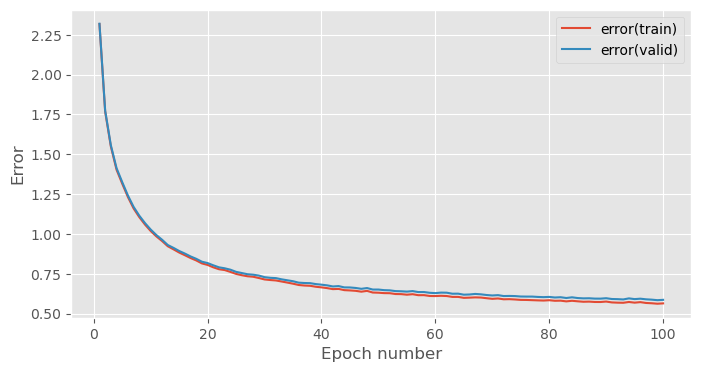

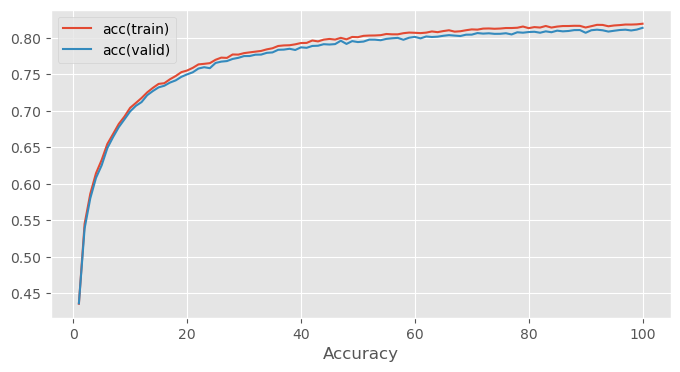

In [125]:

'''
    Task 3  Question 7 - 8 erxperiments with combination of Dropout L1, and L2 penalties


    Experiment 2o - Application of Dropout and L2 penalty in each of hidden layers 
                    with incl_prob = 0.7 and penalty_coefficient = 1e-3
    
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L2Penalty
import numpy as np
from mlp.layers import DropoutLayer
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels=False)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng,smooth_labels=False)

learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
pelanty_coefficients = 1e-3
keep_rate = 0.7
seed = 11102019 
rng = np.random.RandomState(seed)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
L2_Dropout_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

fig_1.savefig('/home/gvidias/mlpractical/figures/experiment_2_dropout_0.7_L2_0.001_error.png')
fig_2.savefig('/home/gvidias/mlpractical/figures/experiment_2_dropout_0.7_L2_0.001_accuracy.png')

# Show the plots
plt.show()






KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.2s to complete
    error(train)=2.32e+00, acc(train)=4.36e-01, error(valid)=2.32e+00, acc(valid)=4.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.2s to complete
    error(train)=1.77e+00, acc(train)=5.45e-01, error(valid)=1.77e+00, acc(valid)=5.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.3s to complete
    error(train)=1.55e+00, acc(train)=5.86e-01, error(valid)=1.56e+00, acc(valid)=5.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.2s to complete
    error(train)=1.40e+00, acc(train)=6.15e-01, error(valid)=1.41e+00, acc(valid)=6.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.4s to complete
    error(train)=1.32e+00, acc(train)=6.33e-01, error(valid)=1.33e+00, acc(valid)=6.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.4s to complete
    error(train)=1.23e+00, acc(train)=6.55e-01, error(valid)=1.24e+00, acc(valid)=6.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.5s to complete
    error(train)=1.16e+00, acc(train)=6.68e-01, error(valid)=1.17e+00, acc(valid)=6.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.5s to complete
    error(train)=1.11e+00, acc(train)=6.82e-01, error(valid)=1.11e+00, acc(valid)=6.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.7s to complete
    error(train)=1.06e+00, acc(train)=6.92e-01, error(valid)=1.07e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.6s to complete
    error(train)=1.02e+00, acc(train)=7.04e-01, error(valid)=1.03e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.7s to complete
    error(train)=9.85e-01, acc(train)=7.11e-01, error(valid)=9.93e-01, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.6s to complete
    error(train)=9.56e-01, acc(train)=7.18e-01, error(valid)=9.64e-01, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.7s to complete
    error(train)=9.23e-01, acc(train)=7.25e-01, error(valid)=9.31e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.6s to complete
    error(train)=9.04e-01, acc(train)=7.32e-01, error(valid)=9.13e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 5.0s to complete
    error(train)=8.84e-01, acc(train)=7.37e-01, error(valid)=8.93e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.8s to complete
    error(train)=8.67e-01, acc(train)=7.38e-01, error(valid)=8.77e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.1s to complete
    error(train)=8.49e-01, acc(train)=7.43e-01, error(valid)=8.59e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 7.6s to complete
    error(train)=8.34e-01, acc(train)=7.48e-01, error(valid)=8.44e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.3s to complete
    error(train)=8.15e-01, acc(train)=7.53e-01, error(valid)=8.26e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 8.0s to complete
    error(train)=8.06e-01, acc(train)=7.55e-01, error(valid)=8.18e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.5s to complete
    error(train)=7.91e-01, acc(train)=7.59e-01, error(valid)=8.04e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.4s to complete
    error(train)=7.79e-01, acc(train)=7.64e-01, error(valid)=7.91e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.6s to complete
    error(train)=7.74e-01, acc(train)=7.64e-01, error(valid)=7.85e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 8.0s to complete
    error(train)=7.62e-01, acc(train)=7.65e-01, error(valid)=7.76e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.8s to complete
    error(train)=7.50e-01, acc(train)=7.70e-01, error(valid)=7.62e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.5s to complete
    error(train)=7.41e-01, acc(train)=7.73e-01, error(valid)=7.55e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.0s to complete
    error(train)=7.35e-01, acc(train)=7.73e-01, error(valid)=7.48e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 8.4s to complete
    error(train)=7.32e-01, acc(train)=7.77e-01, error(valid)=7.45e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.5s to complete
    error(train)=7.24e-01, acc(train)=7.77e-01, error(valid)=7.39e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 8.4s to complete
    error(train)=7.15e-01, acc(train)=7.79e-01, error(valid)=7.29e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.6s to complete
    error(train)=7.11e-01, acc(train)=7.80e-01, error(valid)=7.25e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.5s to complete
    error(train)=7.08e-01, acc(train)=7.81e-01, error(valid)=7.23e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.8s to complete
    error(train)=7.02e-01, acc(train)=7.82e-01, error(valid)=7.16e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.4s to complete
    error(train)=6.95e-01, acc(train)=7.84e-01, error(valid)=7.10e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.7s to complete
    error(train)=6.88e-01, acc(train)=7.86e-01, error(valid)=7.04e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 9.0s to complete
    error(train)=6.80e-01, acc(train)=7.89e-01, error(valid)=6.95e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.9s to complete
    error(train)=6.77e-01, acc(train)=7.90e-01, error(valid)=6.92e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 9.0s to complete
    error(train)=6.75e-01, acc(train)=7.90e-01, error(valid)=6.92e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 8.2s to complete
    error(train)=6.69e-01, acc(train)=7.91e-01, error(valid)=6.86e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.8s to complete
    error(train)=6.65e-01, acc(train)=7.93e-01, error(valid)=6.82e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 9.1s to complete
    error(train)=6.60e-01, acc(train)=7.93e-01, error(valid)=6.78e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 8.6s to complete
    error(train)=6.54e-01, acc(train)=7.96e-01, error(valid)=6.71e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 8.4s to complete
    error(train)=6.55e-01, acc(train)=7.95e-01, error(valid)=6.73e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 7.6s to complete
    error(train)=6.48e-01, acc(train)=7.98e-01, error(valid)=6.65e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.9s to complete
    error(train)=6.46e-01, acc(train)=7.99e-01, error(valid)=6.65e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.2s to complete
    error(train)=6.43e-01, acc(train)=7.98e-01, error(valid)=6.61e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 5.0s to complete
    error(train)=6.38e-01, acc(train)=8.00e-01, error(valid)=6.56e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.9s to complete
    error(train)=6.43e-01, acc(train)=7.98e-01, error(valid)=6.61e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.9s to complete
    error(train)=6.33e-01, acc(train)=8.01e-01, error(valid)=6.51e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.9s to complete
    error(train)=6.32e-01, acc(train)=8.01e-01, error(valid)=6.51e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.2s to complete
    error(train)=6.29e-01, acc(train)=8.03e-01, error(valid)=6.48e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.9s to complete
    error(train)=6.29e-01, acc(train)=8.03e-01, error(valid)=6.46e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.4s to complete
    error(train)=6.23e-01, acc(train)=8.03e-01, error(valid)=6.42e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.0s to complete
    error(train)=6.23e-01, acc(train)=8.04e-01, error(valid)=6.41e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.5s to complete
    error(train)=6.19e-01, acc(train)=8.05e-01, error(valid)=6.38e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 5.2s to complete
    error(train)=6.22e-01, acc(train)=8.05e-01, error(valid)=6.42e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.1s to complete
    error(train)=6.16e-01, acc(train)=8.05e-01, error(valid)=6.36e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.3s to complete
    error(train)=6.16e-01, acc(train)=8.06e-01, error(valid)=6.36e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.0s to complete
    error(train)=6.11e-01, acc(train)=8.07e-01, error(valid)=6.31e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.1s to complete
    error(train)=6.11e-01, acc(train)=8.07e-01, error(valid)=6.29e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.9s to complete
    error(train)=6.12e-01, acc(train)=8.06e-01, error(valid)=6.32e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.2s to complete
    error(train)=6.11e-01, acc(train)=8.07e-01, error(valid)=6.32e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.8s to complete
    error(train)=6.05e-01, acc(train)=8.09e-01, error(valid)=6.25e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.9s to complete
    error(train)=6.05e-01, acc(train)=8.08e-01, error(valid)=6.26e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.3s to complete
    error(train)=5.99e-01, acc(train)=8.09e-01, error(valid)=6.19e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.8s to complete
    error(train)=6.01e-01, acc(train)=8.10e-01, error(valid)=6.20e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.9s to complete
    error(train)=6.02e-01, acc(train)=8.08e-01, error(valid)=6.24e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.6s to complete
    error(train)=6.01e-01, acc(train)=8.09e-01, error(valid)=6.21e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.7s to complete
    error(train)=5.97e-01, acc(train)=8.10e-01, error(valid)=6.17e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.0s to complete
    error(train)=5.93e-01, acc(train)=8.12e-01, error(valid)=6.14e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.2s to complete
    error(train)=5.95e-01, acc(train)=8.11e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.8s to complete
    error(train)=5.90e-01, acc(train)=8.13e-01, error(valid)=6.11e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.3s to complete
    error(train)=5.91e-01, acc(train)=8.13e-01, error(valid)=6.11e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.7s to complete
    error(train)=5.89e-01, acc(train)=8.12e-01, error(valid)=6.10e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.1s to complete
    error(train)=5.87e-01, acc(train)=8.13e-01, error(valid)=6.08e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.8s to complete
    error(train)=5.86e-01, acc(train)=8.13e-01, error(valid)=6.07e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.2s to complete
    error(train)=5.85e-01, acc(train)=8.13e-01, error(valid)=6.07e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.4s to complete
    error(train)=5.83e-01, acc(train)=8.14e-01, error(valid)=6.05e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.1s to complete
    error(train)=5.82e-01, acc(train)=8.16e-01, error(valid)=6.04e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.2s to complete
    error(train)=5.84e-01, acc(train)=8.13e-01, error(valid)=6.05e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.9s to complete
    error(train)=5.81e-01, acc(train)=8.15e-01, error(valid)=6.02e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.7s to complete
    error(train)=5.82e-01, acc(train)=8.14e-01, error(valid)=6.03e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.2s to complete
    error(train)=5.77e-01, acc(train)=8.16e-01, error(valid)=5.98e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.1s to complete
    error(train)=5.81e-01, acc(train)=8.14e-01, error(valid)=6.03e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.5s to complete
    error(train)=5.78e-01, acc(train)=8.15e-01, error(valid)=5.98e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.3s to complete
    error(train)=5.75e-01, acc(train)=8.16e-01, error(valid)=5.96e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.5s to complete
    error(train)=5.76e-01, acc(train)=8.16e-01, error(valid)=5.97e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.9s to complete
    error(train)=5.73e-01, acc(train)=8.17e-01, error(valid)=5.95e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.7s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.4s to complete
    error(train)=5.76e-01, acc(train)=8.14e-01, error(valid)=5.97e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.7s to complete
    error(train)=5.71e-01, acc(train)=8.16e-01, error(valid)=5.92e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.6s to complete
    error(train)=5.69e-01, acc(train)=8.18e-01, error(valid)=5.91e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.7s to complete
    error(train)=5.68e-01, acc(train)=8.18e-01, error(valid)=5.89e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.8s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=5.96e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.9s to complete
    error(train)=5.69e-01, acc(train)=8.17e-01, error(valid)=5.91e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.5s to complete
    error(train)=5.72e-01, acc(train)=8.17e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.4s to complete
    error(train)=5.67e-01, acc(train)=8.18e-01, error(valid)=5.90e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.7s to complete
    error(train)=5.65e-01, acc(train)=8.18e-01, error(valid)=5.88e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.2s to complete
    error(train)=5.62e-01, acc(train)=8.19e-01, error(valid)=5.85e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.9s to complete
    error(train)=5.65e-01, acc(train)=8.19e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


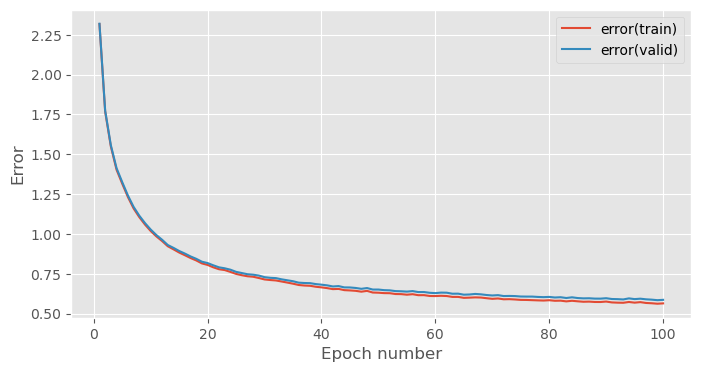

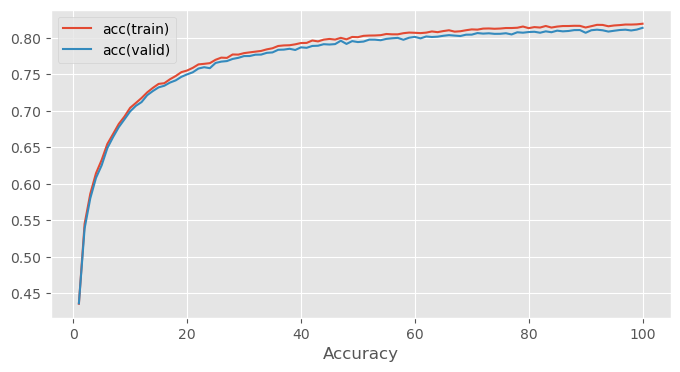

In [126]:

'''
    Task 3  Question 7 - 8 erxperiments with combination of Dropout L1, and L2 penalties


    Experiment 3o - Application of Dropout and L2 penalty in each of hidden layers 
                    with incl_prob = 0.97 and penalty_coefficient = 1e-3
    
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L2Penalty
import numpy as np
from mlp.layers import DropoutLayer
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels=False)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng,smooth_labels=False)

learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
pelanty_coefficients = 1e-3
keep_rate = 0.97
seed = 11102019 
rng = np.random.RandomState(seed)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty=L2Penalty(pelanty_coefficients),biases_penalty=L2Penalty(pelanty_coefficients)) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
L2_Dropout_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

fig_1.savefig('/home/gvidias/mlpractical/figures/experiment_3_dropout_0.97_L2_0.001_error.png')
fig_2.savefig('/home/gvidias/mlpractical/figures/experiment_3_dropout_0.97_L2_0.001_accuracy.png')

# Show the plots
plt.show()






KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.4s to complete
    error(train)=2.01e+00, acc(train)=5.10e-01, error(valid)=2.02e+00, acc(valid)=5.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.3s to complete
    error(train)=1.66e+00, acc(train)=5.68e-01, error(valid)=1.66e+00, acc(valid)=5.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.2s to complete
    error(train)=1.53e+00, acc(train)=5.95e-01, error(valid)=1.54e+00, acc(valid)=5.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.1s to complete
    error(train)=1.44e+00, acc(train)=6.10e-01, error(valid)=1.45e+00, acc(valid)=6.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.2s to complete
    error(train)=1.37e+00, acc(train)=6.28e-01, error(valid)=1.38e+00, acc(valid)=6.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.3s to complete
    error(train)=1.31e+00, acc(train)=6.43e-01, error(valid)=1.32e+00, acc(valid)=6.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.4s to complete
    error(train)=1.28e+00, acc(train)=6.50e-01, error(valid)=1.28e+00, acc(valid)=6.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.5s to complete
    error(train)=1.23e+00, acc(train)=6.61e-01, error(valid)=1.24e+00, acc(valid)=6.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.4s to complete
    error(train)=1.20e+00, acc(train)=6.70e-01, error(valid)=1.21e+00, acc(valid)=6.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.5s to complete
    error(train)=1.16e+00, acc(train)=6.76e-01, error(valid)=1.17e+00, acc(valid)=6.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.5s to complete
    error(train)=1.14e+00, acc(train)=6.84e-01, error(valid)=1.14e+00, acc(valid)=6.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.5s to complete
    error(train)=1.11e+00, acc(train)=6.87e-01, error(valid)=1.12e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.4s to complete
    error(train)=1.10e+00, acc(train)=6.91e-01, error(valid)=1.11e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.4s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.4s to complete
    error(train)=1.06e+00, acc(train)=7.03e-01, error(valid)=1.07e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.3s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.04e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.4s to complete
    error(train)=1.02e+00, acc(train)=7.12e-01, error(valid)=1.03e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.6s to complete
    error(train)=1.02e+00, acc(train)=7.14e-01, error(valid)=1.02e+00, acc(valid)=7.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.4s to complete
    error(train)=9.97e-01, acc(train)=7.17e-01, error(valid)=1.00e+00, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.4s to complete
    error(train)=9.88e-01, acc(train)=7.19e-01, error(valid)=9.96e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.4s to complete
    error(train)=9.76e-01, acc(train)=7.21e-01, error(valid)=9.82e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.4s to complete
    error(train)=9.66e-01, acc(train)=7.24e-01, error(valid)=9.72e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.6s to complete
    error(train)=9.57e-01, acc(train)=7.26e-01, error(valid)=9.64e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.5s to complete
    error(train)=9.52e-01, acc(train)=7.25e-01, error(valid)=9.59e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.8s to complete
    error(train)=9.42e-01, acc(train)=7.29e-01, error(valid)=9.50e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.7s to complete
    error(train)=9.36e-01, acc(train)=7.32e-01, error(valid)=9.43e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.6s to complete
    error(train)=9.33e-01, acc(train)=7.33e-01, error(valid)=9.40e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.6s to complete
    error(train)=9.20e-01, acc(train)=7.35e-01, error(valid)=9.27e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.7s to complete
    error(train)=9.12e-01, acc(train)=7.37e-01, error(valid)=9.19e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.6s to complete
    error(train)=9.09e-01, acc(train)=7.36e-01, error(valid)=9.15e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.8s to complete
    error(train)=8.98e-01, acc(train)=7.39e-01, error(valid)=9.04e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.6s to complete
    error(train)=8.98e-01, acc(train)=7.41e-01, error(valid)=9.06e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.5s to complete
    error(train)=8.91e-01, acc(train)=7.42e-01, error(valid)=8.97e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.6s to complete
    error(train)=8.87e-01, acc(train)=7.45e-01, error(valid)=8.93e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.4s to complete
    error(train)=8.81e-01, acc(train)=7.44e-01, error(valid)=8.88e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.6s to complete
    error(train)=8.88e-01, acc(train)=7.41e-01, error(valid)=8.96e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.6s to complete
    error(train)=8.73e-01, acc(train)=7.48e-01, error(valid)=8.80e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.9s to complete
    error(train)=8.74e-01, acc(train)=7.45e-01, error(valid)=8.81e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.8s to complete
    error(train)=8.67e-01, acc(train)=7.50e-01, error(valid)=8.74e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.7s to complete
    error(train)=8.58e-01, acc(train)=7.50e-01, error(valid)=8.65e-01, acc(valid)=7.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.5s to complete
    error(train)=8.64e-01, acc(train)=7.48e-01, error(valid)=8.71e-01, acc(valid)=7.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.7s to complete
    error(train)=8.53e-01, acc(train)=7.54e-01, error(valid)=8.59e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.6s to complete
    error(train)=8.51e-01, acc(train)=7.52e-01, error(valid)=8.59e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.6s to complete
    error(train)=8.46e-01, acc(train)=7.53e-01, error(valid)=8.53e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.5s to complete
    error(train)=8.45e-01, acc(train)=7.55e-01, error(valid)=8.51e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.7s to complete
    error(train)=8.44e-01, acc(train)=7.54e-01, error(valid)=8.51e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.5s to complete
    error(train)=8.42e-01, acc(train)=7.53e-01, error(valid)=8.50e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.4s to complete
    error(train)=8.35e-01, acc(train)=7.57e-01, error(valid)=8.42e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.5s to complete
    error(train)=8.34e-01, acc(train)=7.56e-01, error(valid)=8.41e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.6s to complete
    error(train)=8.36e-01, acc(train)=7.57e-01, error(valid)=8.43e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.5s to complete
    error(train)=8.27e-01, acc(train)=7.60e-01, error(valid)=8.34e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.5s to complete
    error(train)=8.25e-01, acc(train)=7.59e-01, error(valid)=8.32e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.4s to complete
    error(train)=8.21e-01, acc(train)=7.60e-01, error(valid)=8.29e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.5s to complete
    error(train)=8.29e-01, acc(train)=7.61e-01, error(valid)=8.35e-01, acc(valid)=7.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.4s to complete
    error(train)=8.15e-01, acc(train)=7.62e-01, error(valid)=8.21e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.3s to complete
    error(train)=8.11e-01, acc(train)=7.63e-01, error(valid)=8.17e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.4s to complete
    error(train)=8.11e-01, acc(train)=7.62e-01, error(valid)=8.18e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.4s to complete
    error(train)=8.12e-01, acc(train)=7.61e-01, error(valid)=8.18e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.6s to complete
    error(train)=8.06e-01, acc(train)=7.64e-01, error(valid)=8.13e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.5s to complete
    error(train)=8.10e-01, acc(train)=7.63e-01, error(valid)=8.17e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.4s to complete
    error(train)=8.02e-01, acc(train)=7.65e-01, error(valid)=8.09e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.4s to complete
    error(train)=8.02e-01, acc(train)=7.65e-01, error(valid)=8.10e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.3s to complete
    error(train)=8.00e-01, acc(train)=7.66e-01, error(valid)=8.08e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.4s to complete
    error(train)=7.96e-01, acc(train)=7.66e-01, error(valid)=8.03e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.4s to complete
    error(train)=8.00e-01, acc(train)=7.65e-01, error(valid)=8.07e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.2s to complete
    error(train)=7.93e-01, acc(train)=7.67e-01, error(valid)=8.02e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.2s to complete
    error(train)=7.89e-01, acc(train)=7.66e-01, error(valid)=7.97e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.4s to complete
    error(train)=7.92e-01, acc(train)=7.67e-01, error(valid)=7.98e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.8s to complete
    error(train)=7.85e-01, acc(train)=7.68e-01, error(valid)=7.92e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.3s to complete
    error(train)=7.85e-01, acc(train)=7.69e-01, error(valid)=7.92e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.3s to complete
    error(train)=7.80e-01, acc(train)=7.69e-01, error(valid)=7.87e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.3s to complete
    error(train)=7.84e-01, acc(train)=7.68e-01, error(valid)=7.91e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.6s to complete
    error(train)=7.80e-01, acc(train)=7.70e-01, error(valid)=7.87e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.3s to complete
    error(train)=7.84e-01, acc(train)=7.68e-01, error(valid)=7.92e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.3s to complete
    error(train)=7.74e-01, acc(train)=7.71e-01, error(valid)=7.82e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.3s to complete
    error(train)=7.73e-01, acc(train)=7.71e-01, error(valid)=7.82e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.5s to complete
    error(train)=7.73e-01, acc(train)=7.72e-01, error(valid)=7.80e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.6s to complete
    error(train)=7.74e-01, acc(train)=7.72e-01, error(valid)=7.82e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.3s to complete
    error(train)=7.75e-01, acc(train)=7.70e-01, error(valid)=7.84e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.4s to complete
    error(train)=7.67e-01, acc(train)=7.72e-01, error(valid)=7.76e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.3s to complete
    error(train)=7.67e-01, acc(train)=7.74e-01, error(valid)=7.76e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.2s to complete
    error(train)=7.68e-01, acc(train)=7.73e-01, error(valid)=7.76e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.3s to complete
    error(train)=7.67e-01, acc(train)=7.71e-01, error(valid)=7.75e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.3s to complete
    error(train)=7.65e-01, acc(train)=7.73e-01, error(valid)=7.74e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.4s to complete
    error(train)=7.62e-01, acc(train)=7.73e-01, error(valid)=7.70e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.4s to complete
    error(train)=7.61e-01, acc(train)=7.75e-01, error(valid)=7.70e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.5s to complete
    error(train)=7.55e-01, acc(train)=7.76e-01, error(valid)=7.64e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.6s to complete
    error(train)=7.58e-01, acc(train)=7.75e-01, error(valid)=7.67e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.3s to complete
    error(train)=7.59e-01, acc(train)=7.74e-01, error(valid)=7.69e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.4s to complete
    error(train)=7.55e-01, acc(train)=7.75e-01, error(valid)=7.64e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.2s to complete
    error(train)=7.53e-01, acc(train)=7.77e-01, error(valid)=7.62e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.4s to complete
    error(train)=7.53e-01, acc(train)=7.77e-01, error(valid)=7.62e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.6s to complete
    error(train)=7.49e-01, acc(train)=7.77e-01, error(valid)=7.56e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.9s to complete
    error(train)=7.50e-01, acc(train)=7.76e-01, error(valid)=7.59e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.5s to complete
    error(train)=7.54e-01, acc(train)=7.75e-01, error(valid)=7.64e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.2s to complete
    error(train)=7.51e-01, acc(train)=7.76e-01, error(valid)=7.60e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.5s to complete
    error(train)=7.46e-01, acc(train)=7.78e-01, error(valid)=7.54e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.5s to complete
    error(train)=7.45e-01, acc(train)=7.79e-01, error(valid)=7.54e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.9s to complete
    error(train)=7.51e-01, acc(train)=7.77e-01, error(valid)=7.61e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.8s to complete
    error(train)=7.44e-01, acc(train)=7.80e-01, error(valid)=7.54e-01, acc(valid)=7.76e-01


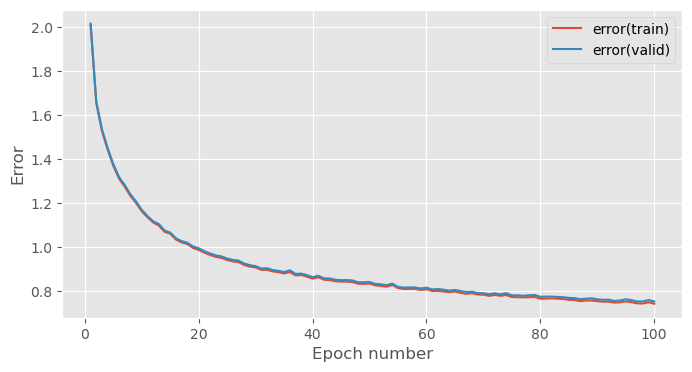

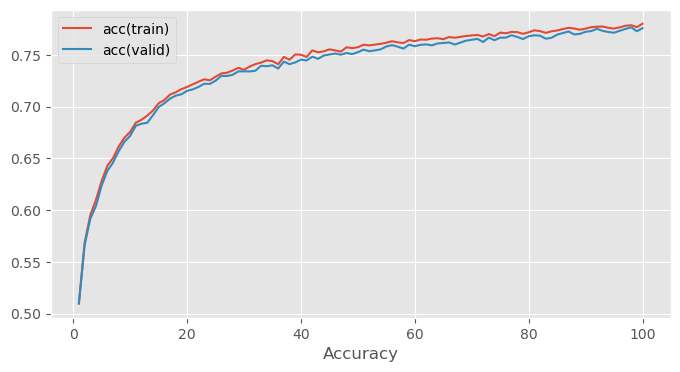

In [136]:

'''
    Task 3  Question 7 - 8 erxperiments with combination of Dropout L1, and L2 penalties


    Experiment 4o - Application of Dropout and L1 penalty in each of hidden layers 
                    with incl_prob = 0.85 and penalty_coefficient = 5e-4
    
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty
import numpy as np
from mlp.layers import DropoutLayer
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels=False)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng,smooth_labels=False)

learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
pelanty_coefficients = 5e-4
keep_rate = 0.85
seed = 11102019 
rng = np.random.RandomState(seed)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
L2_Dropout_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

fig_1.savefig('/home/gvidias/mlpractical/figures/experiment_4_dropout_0.85_L1_0.0005_error.png')
fig_2.savefig('/home/gvidias/mlpractical/figures/experiment_4_dropout_0.85_L1_0.0005_accuracy.png')

# Show the plots
plt.show()






KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.3s to complete
    error(train)=1.37e+00, acc(train)=6.19e-01, error(valid)=1.37e+00, acc(valid)=6.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.3s to complete
    error(train)=1.16e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.2s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.1s to complete
    error(train)=9.53e-01, acc(train)=7.25e-01, error(valid)=9.64e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.1s to complete
    error(train)=8.88e-01, acc(train)=7.41e-01, error(valid)=9.00e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.1s to complete
    error(train)=8.40e-01, acc(train)=7.53e-01, error(valid)=8.53e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.0s to complete
    error(train)=7.98e-01, acc(train)=7.64e-01, error(valid)=8.13e-01, acc(valid)=7.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.1s to complete
    error(train)=7.65e-01, acc(train)=7.72e-01, error(valid)=7.81e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.1s to complete
    error(train)=7.39e-01, acc(train)=7.81e-01, error(valid)=7.55e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.1s to complete
    error(train)=7.20e-01, acc(train)=7.84e-01, error(valid)=7.36e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.1s to complete
    error(train)=7.01e-01, acc(train)=7.90e-01, error(valid)=7.21e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.2s to complete
    error(train)=6.86e-01, acc(train)=7.92e-01, error(valid)=7.07e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.1s to complete
    error(train)=6.71e-01, acc(train)=7.97e-01, error(valid)=6.92e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.9s to complete
    error(train)=6.58e-01, acc(train)=8.00e-01, error(valid)=6.80e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.9s to complete
    error(train)=6.49e-01, acc(train)=8.03e-01, error(valid)=6.71e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.1s to complete
    error(train)=6.40e-01, acc(train)=8.05e-01, error(valid)=6.63e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.7s to complete
    error(train)=6.32e-01, acc(train)=8.07e-01, error(valid)=6.56e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.6s to complete
    error(train)=6.26e-01, acc(train)=8.07e-01, error(valid)=6.50e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.9s to complete
    error(train)=6.17e-01, acc(train)=8.10e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.1s to complete
    error(train)=6.09e-01, acc(train)=8.14e-01, error(valid)=6.37e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.5s to complete
    error(train)=5.99e-01, acc(train)=8.17e-01, error(valid)=6.26e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 6.1s to complete
    error(train)=5.97e-01, acc(train)=8.15e-01, error(valid)=6.26e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 7.0s to complete
    error(train)=5.89e-01, acc(train)=8.20e-01, error(valid)=6.18e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.3s to complete
    error(train)=5.85e-01, acc(train)=8.20e-01, error(valid)=6.14e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 6.4s to complete
    error(train)=5.79e-01, acc(train)=8.21e-01, error(valid)=6.11e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.8s to complete
    error(train)=5.72e-01, acc(train)=8.23e-01, error(valid)=6.02e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 6.1s to complete
    error(train)=5.70e-01, acc(train)=8.25e-01, error(valid)=6.02e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.7s to complete
    error(train)=5.66e-01, acc(train)=8.25e-01, error(valid)=6.00e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.4s to complete
    error(train)=5.63e-01, acc(train)=8.25e-01, error(valid)=5.97e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.2s to complete
    error(train)=5.59e-01, acc(train)=8.26e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.8s to complete
    error(train)=5.55e-01, acc(train)=8.28e-01, error(valid)=5.90e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 6.7s to complete
    error(train)=5.51e-01, acc(train)=8.28e-01, error(valid)=5.85e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.6s to complete
    error(train)=5.46e-01, acc(train)=8.31e-01, error(valid)=5.81e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 6.8s to complete
    error(train)=5.47e-01, acc(train)=8.29e-01, error(valid)=5.81e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 7.2s to complete
    error(train)=5.39e-01, acc(train)=8.31e-01, error(valid)=5.76e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.8s to complete
    error(train)=5.36e-01, acc(train)=8.34e-01, error(valid)=5.74e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.7s to complete
    error(train)=5.33e-01, acc(train)=8.34e-01, error(valid)=5.69e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.9s to complete
    error(train)=5.33e-01, acc(train)=8.32e-01, error(valid)=5.70e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.4s to complete
    error(train)=5.28e-01, acc(train)=8.35e-01, error(valid)=5.66e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.6s to complete
    error(train)=5.23e-01, acc(train)=8.36e-01, error(valid)=5.60e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.8s to complete
    error(train)=5.21e-01, acc(train)=8.38e-01, error(valid)=5.61e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.2s to complete
    error(train)=5.18e-01, acc(train)=8.38e-01, error(valid)=5.55e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.0s to complete
    error(train)=5.22e-01, acc(train)=8.36e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.4s to complete
    error(train)=5.17e-01, acc(train)=8.38e-01, error(valid)=5.55e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.9s to complete
    error(train)=5.12e-01, acc(train)=8.40e-01, error(valid)=5.53e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.0s to complete
    error(train)=5.14e-01, acc(train)=8.39e-01, error(valid)=5.56e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.8s to complete
    error(train)=5.08e-01, acc(train)=8.39e-01, error(valid)=5.49e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 7.9s to complete
    error(train)=5.03e-01, acc(train)=8.43e-01, error(valid)=5.45e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.2s to complete
    error(train)=5.09e-01, acc(train)=8.40e-01, error(valid)=5.52e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.9s to complete
    error(train)=5.06e-01, acc(train)=8.40e-01, error(valid)=5.46e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.5s to complete
    error(train)=5.00e-01, acc(train)=8.43e-01, error(valid)=5.42e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.7s to complete
    error(train)=4.98e-01, acc(train)=8.43e-01, error(valid)=5.42e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 7.2s to complete
    error(train)=5.00e-01, acc(train)=8.42e-01, error(valid)=5.43e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 6.7s to complete
    error(train)=4.98e-01, acc(train)=8.43e-01, error(valid)=5.40e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.5s to complete
    error(train)=4.93e-01, acc(train)=8.44e-01, error(valid)=5.38e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.9s to complete
    error(train)=4.93e-01, acc(train)=8.45e-01, error(valid)=5.37e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.4s to complete
    error(train)=4.90e-01, acc(train)=8.46e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.5s to complete
    error(train)=4.89e-01, acc(train)=8.46e-01, error(valid)=5.34e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.2s to complete
    error(train)=4.90e-01, acc(train)=8.45e-01, error(valid)=5.35e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.5s to complete
    error(train)=4.87e-01, acc(train)=8.45e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.5s to complete
    error(train)=4.85e-01, acc(train)=8.47e-01, error(valid)=5.32e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.1s to complete
    error(train)=4.84e-01, acc(train)=8.47e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.8s to complete
    error(train)=4.82e-01, acc(train)=8.47e-01, error(valid)=5.31e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.1s to complete
    error(train)=4.82e-01, acc(train)=8.46e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.7s to complete
    error(train)=4.79e-01, acc(train)=8.49e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.1s to complete
    error(train)=4.85e-01, acc(train)=8.45e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.4s to complete
    error(train)=4.79e-01, acc(train)=8.48e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.3s to complete
    error(train)=4.77e-01, acc(train)=8.48e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.6s to complete
    error(train)=4.74e-01, acc(train)=8.50e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.5s to complete
    error(train)=4.76e-01, acc(train)=8.49e-01, error(valid)=5.26e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.3s to complete
    error(train)=4.71e-01, acc(train)=8.51e-01, error(valid)=5.20e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.5s to complete
    error(train)=4.72e-01, acc(train)=8.49e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.8s to complete
    error(train)=4.70e-01, acc(train)=8.51e-01, error(valid)=5.20e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.9s to complete
    error(train)=4.71e-01, acc(train)=8.51e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.5s to complete
    error(train)=4.68e-01, acc(train)=8.51e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 5.7s to complete
    error(train)=4.68e-01, acc(train)=8.51e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.0s to complete
    error(train)=4.64e-01, acc(train)=8.52e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.5s to complete
    error(train)=4.62e-01, acc(train)=8.54e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.2s to complete
    error(train)=4.64e-01, acc(train)=8.52e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.4s to complete
    error(train)=4.62e-01, acc(train)=8.52e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.4s to complete
    error(train)=4.64e-01, acc(train)=8.52e-01, error(valid)=5.18e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.4s to complete
    error(train)=4.59e-01, acc(train)=8.54e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.6s to complete
    error(train)=4.63e-01, acc(train)=8.51e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 6.2s to complete
    error(train)=4.62e-01, acc(train)=8.52e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.4s to complete
    error(train)=4.57e-01, acc(train)=8.55e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.6s to complete
    error(train)=4.60e-01, acc(train)=8.53e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.5s to complete
    error(train)=4.55e-01, acc(train)=8.54e-01, error(valid)=5.12e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.8s to complete
    error(train)=4.55e-01, acc(train)=8.54e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.0s to complete
    error(train)=4.56e-01, acc(train)=8.54e-01, error(valid)=5.12e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.7s to complete
    error(train)=4.50e-01, acc(train)=8.57e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.1s to complete
    error(train)=4.51e-01, acc(train)=8.55e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 5.5s to complete
    error(train)=4.49e-01, acc(train)=8.57e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.9s to complete
    error(train)=4.55e-01, acc(train)=8.54e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 7.8s to complete
    error(train)=4.47e-01, acc(train)=8.57e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.3s to complete
    error(train)=4.45e-01, acc(train)=8.59e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.3s to complete
    error(train)=4.54e-01, acc(train)=8.53e-01, error(valid)=5.13e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.2s to complete
    error(train)=4.48e-01, acc(train)=8.56e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.7s to complete
    error(train)=4.45e-01, acc(train)=8.58e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 7.2s to complete
    error(train)=4.41e-01, acc(train)=8.59e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.8s to complete
    error(train)=4.49e-01, acc(train)=8.56e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


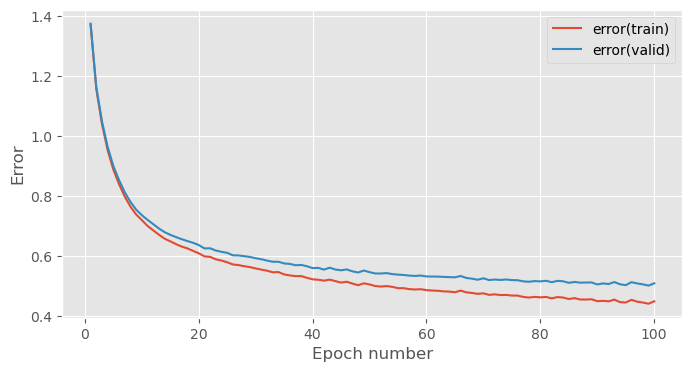

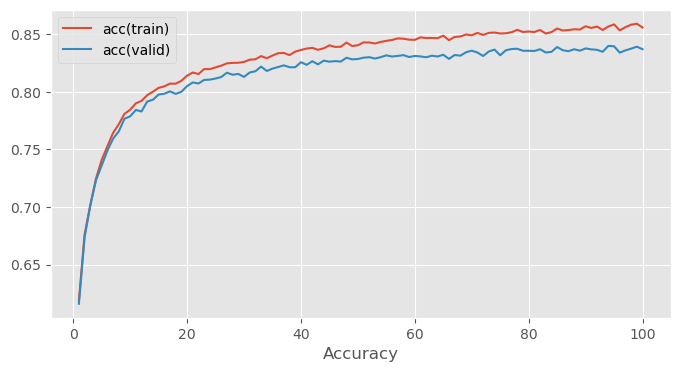

In [135]:

'''
    Task 3  Question 7 - 8 erxperiments with combination of Dropout L1, and L2 penalties


    Experiment 5o - Application of L2 in the first 2 hidden layers and and L1 in third and the output layer
                    with  l2_penalty_coefficient = 0.001 and l1_penalty_coefficient = 5e-4
    
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty
import numpy as np
from mlp.layers import DropoutLayer
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels=False)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng,smooth_labels=False)

learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
l2_pelanty_coefficients = 1e-3
l1_pelanty_coefficients = 5e-4
keep_rate = 0.
seed = 11102019 
rng = np.random.RandomState(seed)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(l2_pelanty_coefficients),biases_penalty=L2Penalty(l2_pelanty_coefficients)),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(l2_pelanty_coefficients),biases_penalty=L2Penalty(l2_pelanty_coefficients)),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(l1_pelanty_coefficients),biases_penalty=L1Penalty(l1_pelanty_coefficients)),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty=L1Penalty(l1_pelanty_coefficients),biases_penalty=L1Penalty(l1_pelanty_coefficients)) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
L2_Dropout_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

fig_1.savefig('/home/gvidias/mlpractical/figures/experiment_5_L2_0.001_L1_0.0005_error.png')
fig_2.savefig('/home/gvidias/mlpractical/figures/experiment_5_L2_0.001_L1_0.0005_accuracy.png')

# Show the plots
plt.show()






KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.3s to complete
    error(train)=1.82e+00, acc(train)=5.42e-01, error(valid)=1.82e+00, acc(valid)=5.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.3s to complete
    error(train)=1.45e+00, acc(train)=6.06e-01, error(valid)=1.45e+00, acc(valid)=6.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.3s to complete
    error(train)=1.30e+00, acc(train)=6.42e-01, error(valid)=1.30e+00, acc(valid)=6.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.3s to complete
    error(train)=1.19e+00, acc(train)=6.62e-01, error(valid)=1.20e+00, acc(valid)=6.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.3s to complete
    error(train)=1.10e+00, acc(train)=6.84e-01, error(valid)=1.11e+00, acc(valid)=6.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.2s to complete
    error(train)=1.04e+00, acc(train)=7.01e-01, error(valid)=1.04e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.3s to complete
    error(train)=9.91e-01, acc(train)=7.13e-01, error(valid)=9.98e-01, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.3s to complete
    error(train)=9.45e-01, acc(train)=7.25e-01, error(valid)=9.52e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.3s to complete
    error(train)=9.11e-01, acc(train)=7.32e-01, error(valid)=9.20e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.3s to complete
    error(train)=8.79e-01, acc(train)=7.40e-01, error(valid)=8.88e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.4s to complete
    error(train)=8.55e-01, acc(train)=7.46e-01, error(valid)=8.64e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.5s to complete
    error(train)=8.36e-01, acc(train)=7.49e-01, error(valid)=8.46e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.5s to complete
    error(train)=8.20e-01, acc(train)=7.55e-01, error(valid)=8.31e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.2s to complete
    error(train)=8.00e-01, acc(train)=7.57e-01, error(valid)=8.12e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.4s to complete
    error(train)=7.85e-01, acc(train)=7.65e-01, error(valid)=7.97e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 6.4s to complete
    error(train)=7.72e-01, acc(train)=7.67e-01, error(valid)=7.84e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 6.6s to complete
    error(train)=7.61e-01, acc(train)=7.71e-01, error(valid)=7.73e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 6.7s to complete
    error(train)=7.50e-01, acc(train)=7.73e-01, error(valid)=7.63e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.2s to complete
    error(train)=7.42e-01, acc(train)=7.76e-01, error(valid)=7.57e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 6.6s to complete
    error(train)=7.35e-01, acc(train)=7.78e-01, error(valid)=7.51e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.7s to complete
    error(train)=7.25e-01, acc(train)=7.80e-01, error(valid)=7.40e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.5s to complete
    error(train)=7.14e-01, acc(train)=7.83e-01, error(valid)=7.30e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 5.6s to complete
    error(train)=7.08e-01, acc(train)=7.85e-01, error(valid)=7.24e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.5s to complete
    error(train)=7.02e-01, acc(train)=7.86e-01, error(valid)=7.18e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.8s to complete
    error(train)=7.00e-01, acc(train)=7.86e-01, error(valid)=7.17e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 6.4s to complete
    error(train)=6.89e-01, acc(train)=7.90e-01, error(valid)=7.07e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.3s to complete
    error(train)=6.85e-01, acc(train)=7.92e-01, error(valid)=7.02e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 6.6s to complete
    error(train)=6.79e-01, acc(train)=7.92e-01, error(valid)=6.99e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 7.0s to complete
    error(train)=6.73e-01, acc(train)=7.94e-01, error(valid)=6.91e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.8s to complete
    error(train)=6.66e-01, acc(train)=7.94e-01, error(valid)=6.84e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 8.7s to complete
    error(train)=6.64e-01, acc(train)=7.95e-01, error(valid)=6.83e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 7.7s to complete
    error(train)=6.59e-01, acc(train)=7.98e-01, error(valid)=6.78e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.9s to complete
    error(train)=6.56e-01, acc(train)=7.98e-01, error(valid)=6.75e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.2s to complete
    error(train)=6.54e-01, acc(train)=7.99e-01, error(valid)=6.72e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.2s to complete
    error(train)=6.43e-01, acc(train)=8.02e-01, error(valid)=6.62e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.5s to complete
    error(train)=6.45e-01, acc(train)=8.00e-01, error(valid)=6.66e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.2s to complete
    error(train)=6.36e-01, acc(train)=8.05e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 6.2s to complete
    error(train)=6.38e-01, acc(train)=8.03e-01, error(valid)=6.57e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.3s to complete
    error(train)=6.31e-01, acc(train)=8.05e-01, error(valid)=6.51e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.6s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=6.45e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 5.9s to complete
    error(train)=6.27e-01, acc(train)=8.06e-01, error(valid)=6.46e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.8s to complete
    error(train)=6.21e-01, acc(train)=8.10e-01, error(valid)=6.40e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 6.5s to complete
    error(train)=6.18e-01, acc(train)=8.09e-01, error(valid)=6.38e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.7s to complete
    error(train)=6.15e-01, acc(train)=8.09e-01, error(valid)=6.34e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.2s to complete
    error(train)=6.12e-01, acc(train)=8.11e-01, error(valid)=6.30e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.1s to complete
    error(train)=6.12e-01, acc(train)=8.10e-01, error(valid)=6.32e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.7s to complete
    error(train)=6.12e-01, acc(train)=8.10e-01, error(valid)=6.32e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.5s to complete
    error(train)=6.06e-01, acc(train)=8.12e-01, error(valid)=6.26e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.1s to complete
    error(train)=6.03e-01, acc(train)=8.13e-01, error(valid)=6.23e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 5.9s to complete
    error(train)=6.03e-01, acc(train)=8.13e-01, error(valid)=6.23e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.6s to complete
    error(train)=5.98e-01, acc(train)=8.15e-01, error(valid)=6.18e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.2s to complete
    error(train)=5.98e-01, acc(train)=8.15e-01, error(valid)=6.17e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.5s to complete
    error(train)=5.96e-01, acc(train)=8.15e-01, error(valid)=6.16e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.9s to complete
    error(train)=5.95e-01, acc(train)=8.16e-01, error(valid)=6.14e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 6.1s to complete
    error(train)=5.91e-01, acc(train)=8.15e-01, error(valid)=6.09e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 6.8s to complete
    error(train)=5.87e-01, acc(train)=8.18e-01, error(valid)=6.06e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.3s to complete
    error(train)=5.85e-01, acc(train)=8.17e-01, error(valid)=6.05e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.7s to complete
    error(train)=5.87e-01, acc(train)=8.17e-01, error(valid)=6.06e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.7s to complete
    error(train)=5.86e-01, acc(train)=8.18e-01, error(valid)=6.05e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.3s to complete
    error(train)=5.85e-01, acc(train)=8.17e-01, error(valid)=6.04e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.0s to complete
    error(train)=5.77e-01, acc(train)=8.20e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.5s to complete
    error(train)=5.80e-01, acc(train)=8.19e-01, error(valid)=5.99e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 5.4s to complete
    error(train)=5.75e-01, acc(train)=8.20e-01, error(valid)=5.95e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.7s to complete
    error(train)=5.77e-01, acc(train)=8.20e-01, error(valid)=5.97e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.2s to complete
    error(train)=5.78e-01, acc(train)=8.20e-01, error(valid)=5.97e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.2s to complete
    error(train)=5.71e-01, acc(train)=8.21e-01, error(valid)=5.92e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.9s to complete
    error(train)=5.73e-01, acc(train)=8.20e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.4s to complete
    error(train)=5.67e-01, acc(train)=8.21e-01, error(valid)=5.86e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.9s to complete
    error(train)=5.66e-01, acc(train)=8.23e-01, error(valid)=5.85e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.2s to complete
    error(train)=5.63e-01, acc(train)=8.23e-01, error(valid)=5.82e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.0s to complete
    error(train)=5.62e-01, acc(train)=8.23e-01, error(valid)=5.82e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.0s to complete
    error(train)=5.61e-01, acc(train)=8.24e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 6.0s to complete
    error(train)=5.62e-01, acc(train)=8.24e-01, error(valid)=5.83e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.1s to complete
    error(train)=5.64e-01, acc(train)=8.23e-01, error(valid)=5.85e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.1s to complete
    error(train)=5.56e-01, acc(train)=8.25e-01, error(valid)=5.76e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.5s to complete
    error(train)=5.57e-01, acc(train)=8.25e-01, error(valid)=5.76e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.0s to complete
    error(train)=5.55e-01, acc(train)=8.25e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 6.9s to complete
    error(train)=5.56e-01, acc(train)=8.25e-01, error(valid)=5.77e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.0s to complete
    error(train)=5.55e-01, acc(train)=8.25e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.6s to complete
    error(train)=5.52e-01, acc(train)=8.26e-01, error(valid)=5.73e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.2s to complete
    error(train)=5.53e-01, acc(train)=8.26e-01, error(valid)=5.74e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.9s to complete
    error(train)=5.54e-01, acc(train)=8.26e-01, error(valid)=5.74e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.3s to complete
    error(train)=5.51e-01, acc(train)=8.26e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.6s to complete
    error(train)=5.49e-01, acc(train)=8.26e-01, error(valid)=5.70e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.7s to complete
    error(train)=5.46e-01, acc(train)=8.28e-01, error(valid)=5.66e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.5s to complete
    error(train)=5.47e-01, acc(train)=8.28e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.1s to complete
    error(train)=5.46e-01, acc(train)=8.27e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.4s to complete
    error(train)=5.43e-01, acc(train)=8.29e-01, error(valid)=5.63e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.9s to complete
    error(train)=5.43e-01, acc(train)=8.28e-01, error(valid)=5.66e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.1s to complete
    error(train)=5.41e-01, acc(train)=8.28e-01, error(valid)=5.62e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.2s to complete
    error(train)=5.40e-01, acc(train)=8.30e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.2s to complete
    error(train)=5.39e-01, acc(train)=8.31e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.5s to complete
    error(train)=5.37e-01, acc(train)=8.30e-01, error(valid)=5.58e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.7s to complete
    error(train)=5.39e-01, acc(train)=8.29e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.3s to complete
    error(train)=5.39e-01, acc(train)=8.30e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.8s to complete
    error(train)=5.37e-01, acc(train)=8.29e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.1s to complete
    error(train)=5.36e-01, acc(train)=8.30e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.0s to complete
    error(train)=5.33e-01, acc(train)=8.32e-01, error(valid)=5.56e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.1s to complete
    error(train)=5.37e-01, acc(train)=8.29e-01, error(valid)=5.60e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.2s to complete
    error(train)=5.34e-01, acc(train)=8.31e-01, error(valid)=5.56e-01, acc(valid)=8.25e-01


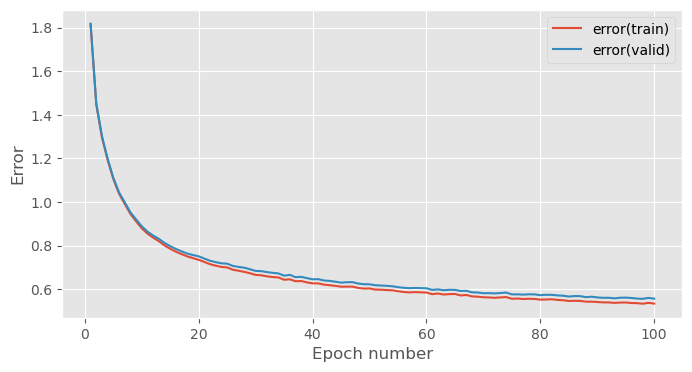

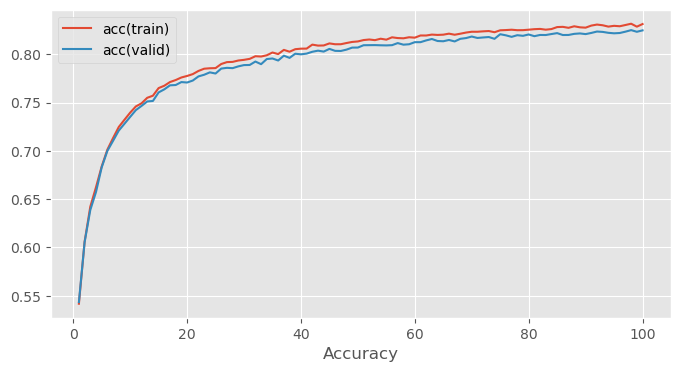

In [138]:

'''
    Task 3  Question 7 - 8 erxperiments with combination of Dropout L1, and L2 penalties


    Experiment 6o - Application of Dropout and L2 penalty in each of the first 2 hidden layers and L1 penalty in the third and output layer
                    with incl_prob = 0.85 and l2 penalty_coefficient = 1e-3 and l1 penalty coefficient = 5e-4
    
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L2Penalty
import numpy as np
from mlp.layers import DropoutLayer
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels=False)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng,smooth_labels=False)

learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
l2_pelanty_coefficients = 1e-3
l1_penalty_coefficients = 5e-4
keep_rate = 0.85
seed = 11102019 
rng = np.random.RandomState(seed)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(l2_pelanty_coefficients),biases_penalty=L2Penalty(l2_pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(l2_pelanty_coefficients),biases_penalty=L2Penalty(l2_pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(l1_pelanty_coefficients),biases_penalty=L1Penalty(l1_pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty=L1Penalty(l1_pelanty_coefficients),biases_penalty=L1Penalty(l1_pelanty_coefficients)) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
L2_Dropout_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

fig_1.savefig('/home/gvidias/mlpractical/figures/experiment_6_dropout_0.85_L2_0.001_L1_0.0004_error.png')
fig_2.savefig('/home/gvidias/mlpractical/figures/experiment_6_dropout_0.85_L2_0.001_L1_0.0005_accuracy.png')

# Show the plots
plt.show()






KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.4s to complete
    error(train)=1.61e+00, acc(train)=5.67e-01, error(valid)=1.61e+00, acc(valid)=5.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.1s to complete
    error(train)=1.29e+00, acc(train)=6.38e-01, error(valid)=1.30e+00, acc(valid)=6.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.2s to complete
    error(train)=1.14e+00, acc(train)=6.76e-01, error(valid)=1.15e+00, acc(valid)=6.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.1s to complete
    error(train)=1.04e+00, acc(train)=6.99e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.2s to complete
    error(train)=9.65e-01, acc(train)=7.19e-01, error(valid)=9.73e-01, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.3s to complete
    error(train)=9.12e-01, acc(train)=7.30e-01, error(valid)=9.23e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.2s to complete
    error(train)=8.60e-01, acc(train)=7.45e-01, error(valid)=8.73e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.2s to complete
    error(train)=8.20e-01, acc(train)=7.54e-01, error(valid)=8.34e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.2s to complete
    error(train)=7.87e-01, acc(train)=7.63e-01, error(valid)=8.01e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.2s to complete
    error(train)=7.55e-01, acc(train)=7.71e-01, error(valid)=7.71e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.4s to complete
    error(train)=7.38e-01, acc(train)=7.75e-01, error(valid)=7.55e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.2s to complete
    error(train)=7.12e-01, acc(train)=7.82e-01, error(valid)=7.29e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.3s to complete
    error(train)=6.96e-01, acc(train)=7.86e-01, error(valid)=7.14e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.9s to complete
    error(train)=6.80e-01, acc(train)=7.90e-01, error(valid)=7.00e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.7s to complete
    error(train)=6.67e-01, acc(train)=7.93e-01, error(valid)=6.86e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.4s to complete
    error(train)=6.49e-01, acc(train)=7.99e-01, error(valid)=6.70e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.9s to complete
    error(train)=6.40e-01, acc(train)=8.02e-01, error(valid)=6.60e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.7s to complete
    error(train)=6.26e-01, acc(train)=8.05e-01, error(valid)=6.49e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.8s to complete
    error(train)=6.15e-01, acc(train)=8.09e-01, error(valid)=6.38e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.4s to complete
    error(train)=6.08e-01, acc(train)=8.09e-01, error(valid)=6.32e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 6.2s to complete
    error(train)=6.03e-01, acc(train)=8.09e-01, error(valid)=6.28e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.5s to complete
    error(train)=5.96e-01, acc(train)=8.12e-01, error(valid)=6.23e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.0s to complete
    error(train)=5.85e-01, acc(train)=8.15e-01, error(valid)=6.11e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.7s to complete
    error(train)=5.79e-01, acc(train)=8.16e-01, error(valid)=6.08e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.1s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=5.99e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.4s to complete
    error(train)=5.65e-01, acc(train)=8.22e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.2s to complete
    error(train)=5.56e-01, acc(train)=8.23e-01, error(valid)=5.86e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.0s to complete
    error(train)=5.51e-01, acc(train)=8.24e-01, error(valid)=5.80e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.6s to complete
    error(train)=5.48e-01, acc(train)=8.24e-01, error(valid)=5.78e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.3s to complete
    error(train)=5.41e-01, acc(train)=8.27e-01, error(valid)=5.72e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.1s to complete
    error(train)=5.37e-01, acc(train)=8.28e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.3s to complete
    error(train)=5.32e-01, acc(train)=8.29e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.3s to complete
    error(train)=5.27e-01, acc(train)=8.31e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.1s to complete
    error(train)=5.27e-01, acc(train)=8.31e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.3s to complete
    error(train)=5.20e-01, acc(train)=8.32e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.3s to complete
    error(train)=5.19e-01, acc(train)=8.32e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.0s to complete
    error(train)=5.13e-01, acc(train)=8.34e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.9s to complete
    error(train)=5.09e-01, acc(train)=8.36e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.1s to complete
    error(train)=5.07e-01, acc(train)=8.36e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.8s to complete
    error(train)=5.03e-01, acc(train)=8.37e-01, error(valid)=5.39e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.3s to complete
    error(train)=5.01e-01, acc(train)=8.38e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.2s to complete
    error(train)=5.00e-01, acc(train)=8.38e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.0s to complete
    error(train)=4.94e-01, acc(train)=8.39e-01, error(valid)=5.33e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.1s to complete
    error(train)=4.93e-01, acc(train)=8.40e-01, error(valid)=5.29e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.1s to complete
    error(train)=4.96e-01, acc(train)=8.38e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.3s to complete
    error(train)=4.88e-01, acc(train)=8.41e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.2s to complete
    error(train)=4.86e-01, acc(train)=8.43e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.1s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=5.22e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.3s to complete
    error(train)=4.83e-01, acc(train)=8.42e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.2s to complete
    error(train)=4.82e-01, acc(train)=8.42e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.4s to complete
    error(train)=4.81e-01, acc(train)=8.42e-01, error(valid)=5.20e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.3s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.1s to complete
    error(train)=4.75e-01, acc(train)=8.45e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.9s to complete
    error(train)=4.74e-01, acc(train)=8.45e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.9s to complete
    error(train)=4.71e-01, acc(train)=8.46e-01, error(valid)=5.10e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.1s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.4s to complete
    error(train)=4.69e-01, acc(train)=8.47e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.4s to complete
    error(train)=4.66e-01, acc(train)=8.47e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.2s to complete
    error(train)=4.67e-01, acc(train)=8.47e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.4s to complete
    error(train)=4.63e-01, acc(train)=8.49e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 5.6s to complete
    error(train)=4.61e-01, acc(train)=8.48e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.6s to complete
    error(train)=4.60e-01, acc(train)=8.49e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.4s to complete
    error(train)=4.58e-01, acc(train)=8.49e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.2s to complete
    error(train)=4.59e-01, acc(train)=8.48e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 6.1s to complete
    error(train)=4.56e-01, acc(train)=8.50e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.6s to complete
    error(train)=4.54e-01, acc(train)=8.50e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.6s to complete
    error(train)=4.53e-01, acc(train)=8.51e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.7s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.8s to complete
    error(train)=4.54e-01, acc(train)=8.51e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.5s to complete
    error(train)=4.50e-01, acc(train)=8.52e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.1s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=4.97e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.5s to complete
    error(train)=4.49e-01, acc(train)=8.52e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.8s to complete
    error(train)=4.50e-01, acc(train)=8.51e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 5.0s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.4s to complete
    error(train)=4.47e-01, acc(train)=8.52e-01, error(valid)=4.90e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.1s to complete
    error(train)=4.44e-01, acc(train)=8.54e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.6s to complete
    error(train)=4.45e-01, acc(train)=8.52e-01, error(valid)=4.90e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.6s to complete
    error(train)=4.43e-01, acc(train)=8.53e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.0s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.5s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=4.84e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.3s to complete
    error(train)=4.42e-01, acc(train)=8.53e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.7s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=4.81e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.3s to complete
    error(train)=4.38e-01, acc(train)=8.55e-01, error(valid)=4.82e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.8s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.3s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=4.81e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.3s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=4.78e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 6.2s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=4.80e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.7s to complete
    error(train)=4.36e-01, acc(train)=8.56e-01, error(valid)=4.82e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.9s to complete
    error(train)=4.35e-01, acc(train)=8.55e-01, error(valid)=4.78e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.3s to complete
    error(train)=4.32e-01, acc(train)=8.56e-01, error(valid)=4.77e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.8s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.2s to complete
    error(train)=4.31e-01, acc(train)=8.57e-01, error(valid)=4.76e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.9s to complete
    error(train)=4.31e-01, acc(train)=8.58e-01, error(valid)=4.75e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.4s to complete
    error(train)=4.32e-01, acc(train)=8.58e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.1s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=4.75e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 5.2s to complete
    error(train)=4.28e-01, acc(train)=8.59e-01, error(valid)=4.73e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 5.4s to complete
    error(train)=4.25e-01, acc(train)=8.59e-01, error(valid)=4.72e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.4s to complete
    error(train)=4.26e-01, acc(train)=8.59e-01, error(valid)=4.73e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.9s to complete
    error(train)=4.24e-01, acc(train)=8.59e-01, error(valid)=4.69e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.3s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=4.76e-01, acc(valid)=8.41e-01


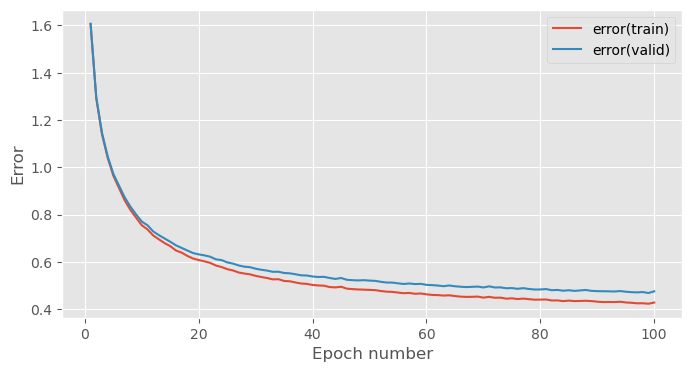

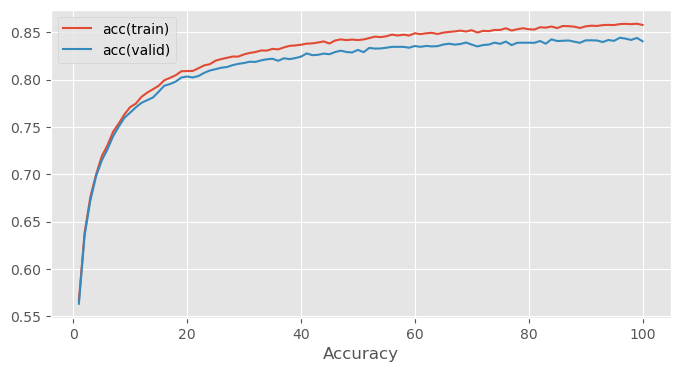

In [140]:

'''
    Task 3  Question 7 - 8 erxperiments with combination of Dropout L1, and L2 penalties


    Experiment 7 - Application of Dropout in the first two two layers and L2 penalty across all the layers 
                   with incl_prob = 0.85 and l2 penalty_coefficient = 1e-3
    
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L2Penalty
import numpy as np
from mlp.layers import DropoutLayer
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels=False)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng,smooth_labels=False)

learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
l2_pelanty_coefficients = 1e-3
keep_rate = 0.85
seed = 11102019 
rng = np.random.RandomState(seed)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(l2_pelanty_coefficients),biases_penalty=L2Penalty(l2_pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(l2_pelanty_coefficients),biases_penalty=L2Penalty(l2_pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L2Penalty(l2_pelanty_coefficients),biases_penalty=L2Penalty(l2_pelanty_coefficients)),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty=L2Penalty(l2_pelanty_coefficients),biases_penalty=L2Penalty(l2_pelanty_coefficients)) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
L2_Dropout_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

fig_1.savefig('/home/gvidias/mlpractical/figures/experiment_7_dropout_0.85_firsthlayer_L2_0.001_error.png')
fig_2.savefig('/home/gvidias/mlpractical/figures/experiment_7_dropout_0.85_first_hlayer_L2_0.001_accuracy.png')

# Show the plots
plt.show()






KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/gvidias/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.4s to complete
    error(train)=1.59e+00, acc(train)=5.74e-01, error(valid)=1.60e+00, acc(valid)=5.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.3s to complete
    error(train)=1.37e+00, acc(train)=6.26e-01, error(valid)=1.38e+00, acc(valid)=6.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.4s to complete
    error(train)=1.28e+00, acc(train)=6.49e-01, error(valid)=1.29e+00, acc(valid)=6.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 3.0s to complete
    error(train)=1.21e+00, acc(train)=6.66e-01, error(valid)=1.22e+00, acc(valid)=6.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.2s to complete
    error(train)=1.16e+00, acc(train)=6.75e-01, error(valid)=1.17e+00, acc(valid)=6.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 3.3s to complete
    error(train)=1.11e+00, acc(train)=6.90e-01, error(valid)=1.12e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 3.1s to complete
    error(train)=1.08e+00, acc(train)=6.99e-01, error(valid)=1.09e+00, acc(valid)=6.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.0s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.05e+00, acc(valid)=7.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 3.5s to complete
    error(train)=1.01e+00, acc(train)=7.16e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.5s to complete
    error(train)=9.84e-01, acc(train)=7.21e-01, error(valid)=9.93e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 3.5s to complete
    error(train)=9.63e-01, acc(train)=7.26e-01, error(valid)=9.73e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 3.4s to complete
    error(train)=9.44e-01, acc(train)=7.31e-01, error(valid)=9.54e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 3.5s to complete
    error(train)=9.36e-01, acc(train)=7.33e-01, error(valid)=9.43e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 3.4s to complete
    error(train)=9.17e-01, acc(train)=7.35e-01, error(valid)=9.25e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 3.3s to complete
    error(train)=9.05e-01, acc(train)=7.38e-01, error(valid)=9.14e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.5s to complete
    error(train)=8.91e-01, acc(train)=7.43e-01, error(valid)=9.00e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.3s to complete
    error(train)=8.80e-01, acc(train)=7.46e-01, error(valid)=8.90e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.4s to complete
    error(train)=8.75e-01, acc(train)=7.47e-01, error(valid)=8.84e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.5s to complete
    error(train)=8.57e-01, acc(train)=7.51e-01, error(valid)=8.66e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.4s to complete
    error(train)=8.54e-01, acc(train)=7.52e-01, error(valid)=8.63e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.5s to complete
    error(train)=8.51e-01, acc(train)=7.50e-01, error(valid)=8.60e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.5s to complete
    error(train)=8.40e-01, acc(train)=7.55e-01, error(valid)=8.49e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.5s to complete
    error(train)=8.24e-01, acc(train)=7.59e-01, error(valid)=8.34e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.5s to complete
    error(train)=8.20e-01, acc(train)=7.60e-01, error(valid)=8.30e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.2s to complete
    error(train)=8.12e-01, acc(train)=7.61e-01, error(valid)=8.22e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.0s to complete
    error(train)=8.12e-01, acc(train)=7.60e-01, error(valid)=8.25e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.9s to complete
    error(train)=8.01e-01, acc(train)=7.64e-01, error(valid)=8.11e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.0s to complete
    error(train)=7.95e-01, acc(train)=7.66e-01, error(valid)=8.07e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.0s to complete
    error(train)=7.93e-01, acc(train)=7.66e-01, error(valid)=8.05e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.9s to complete
    error(train)=7.87e-01, acc(train)=7.67e-01, error(valid)=7.99e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.0s to complete
    error(train)=7.84e-01, acc(train)=7.69e-01, error(valid)=7.95e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.9s to complete
    error(train)=7.75e-01, acc(train)=7.71e-01, error(valid)=7.86e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.0s to complete
    error(train)=7.72e-01, acc(train)=7.71e-01, error(valid)=7.84e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.1s to complete
    error(train)=7.68e-01, acc(train)=7.71e-01, error(valid)=7.80e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.9s to complete
    error(train)=7.67e-01, acc(train)=7.73e-01, error(valid)=7.79e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.0s to complete
    error(train)=7.64e-01, acc(train)=7.72e-01, error(valid)=7.76e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.0s to complete
    error(train)=7.57e-01, acc(train)=7.76e-01, error(valid)=7.71e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.0s to complete
    error(train)=7.52e-01, acc(train)=7.76e-01, error(valid)=7.64e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.0s to complete
    error(train)=7.49e-01, acc(train)=7.77e-01, error(valid)=7.63e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.0s to complete
    error(train)=7.47e-01, acc(train)=7.77e-01, error(valid)=7.60e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.9s to complete
    error(train)=7.42e-01, acc(train)=7.77e-01, error(valid)=7.56e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.1s to complete
    error(train)=7.40e-01, acc(train)=7.79e-01, error(valid)=7.54e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.9s to complete
    error(train)=7.38e-01, acc(train)=7.79e-01, error(valid)=7.51e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.0s to complete
    error(train)=7.35e-01, acc(train)=7.79e-01, error(valid)=7.50e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.0s to complete
    error(train)=7.33e-01, acc(train)=7.79e-01, error(valid)=7.48e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.9s to complete
    error(train)=7.36e-01, acc(train)=7.78e-01, error(valid)=7.50e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.0s to complete
    error(train)=7.28e-01, acc(train)=7.81e-01, error(valid)=7.43e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.9s to complete
    error(train)=7.24e-01, acc(train)=7.83e-01, error(valid)=7.39e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.0s to complete
    error(train)=7.26e-01, acc(train)=7.81e-01, error(valid)=7.39e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.9s to complete
    error(train)=7.18e-01, acc(train)=7.84e-01, error(valid)=7.34e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.0s to complete
    error(train)=7.16e-01, acc(train)=7.84e-01, error(valid)=7.32e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.1s to complete
    error(train)=7.12e-01, acc(train)=7.84e-01, error(valid)=7.27e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.3s to complete
    error(train)=7.12e-01, acc(train)=7.86e-01, error(valid)=7.27e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.9s to complete
    error(train)=7.12e-01, acc(train)=7.84e-01, error(valid)=7.27e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.6s to complete
    error(train)=7.08e-01, acc(train)=7.86e-01, error(valid)=7.24e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.4s to complete
    error(train)=7.06e-01, acc(train)=7.86e-01, error(valid)=7.23e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.7s to complete
    error(train)=7.04e-01, acc(train)=7.87e-01, error(valid)=7.20e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.7s to complete
    error(train)=6.99e-01, acc(train)=7.89e-01, error(valid)=7.14e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.5s to complete
    error(train)=7.00e-01, acc(train)=7.87e-01, error(valid)=7.17e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.5s to complete
    error(train)=6.96e-01, acc(train)=7.89e-01, error(valid)=7.11e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.4s to complete
    error(train)=6.94e-01, acc(train)=7.90e-01, error(valid)=7.09e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.4s to complete
    error(train)=6.92e-01, acc(train)=7.91e-01, error(valid)=7.07e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.3s to complete
    error(train)=6.92e-01, acc(train)=7.90e-01, error(valid)=7.07e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.7s to complete
    error(train)=6.90e-01, acc(train)=7.90e-01, error(valid)=7.07e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.6s to complete
    error(train)=6.93e-01, acc(train)=7.89e-01, error(valid)=7.10e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.5s to complete
    error(train)=6.88e-01, acc(train)=7.91e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.4s to complete
    error(train)=6.86e-01, acc(train)=7.92e-01, error(valid)=7.02e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.2s to complete
    error(train)=6.86e-01, acc(train)=7.91e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.0s to complete
    error(train)=6.92e-01, acc(train)=7.89e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.4s to complete
    error(train)=6.83e-01, acc(train)=7.92e-01, error(valid)=6.99e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.3s to complete
    error(train)=6.83e-01, acc(train)=7.92e-01, error(valid)=7.00e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.2s to complete
    error(train)=6.78e-01, acc(train)=7.94e-01, error(valid)=6.93e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.2s to complete
    error(train)=6.76e-01, acc(train)=7.94e-01, error(valid)=6.93e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.3s to complete
    error(train)=6.79e-01, acc(train)=7.92e-01, error(valid)=6.96e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.4s to complete
    error(train)=6.74e-01, acc(train)=7.94e-01, error(valid)=6.89e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.5s to complete
    error(train)=6.73e-01, acc(train)=7.95e-01, error(valid)=6.88e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.4s to complete
    error(train)=6.75e-01, acc(train)=7.93e-01, error(valid)=6.92e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.2s to complete
    error(train)=6.71e-01, acc(train)=7.94e-01, error(valid)=6.88e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.1s to complete
    error(train)=6.69e-01, acc(train)=7.95e-01, error(valid)=6.86e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.5s to complete
    error(train)=6.70e-01, acc(train)=7.95e-01, error(valid)=6.87e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.1s to complete
    error(train)=6.73e-01, acc(train)=7.94e-01, error(valid)=6.90e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.2s to complete
    error(train)=6.66e-01, acc(train)=7.96e-01, error(valid)=6.84e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.1s to complete
    error(train)=6.64e-01, acc(train)=7.97e-01, error(valid)=6.80e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.2s to complete
    error(train)=6.65e-01, acc(train)=7.97e-01, error(valid)=6.82e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.1s to complete
    error(train)=6.62e-01, acc(train)=7.98e-01, error(valid)=6.78e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.1s to complete
    error(train)=6.63e-01, acc(train)=7.97e-01, error(valid)=6.82e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.0s to complete
    error(train)=6.61e-01, acc(train)=7.98e-01, error(valid)=6.79e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.2s to complete
    error(train)=6.59e-01, acc(train)=7.97e-01, error(valid)=6.76e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.1s to complete
    error(train)=6.59e-01, acc(train)=7.98e-01, error(valid)=6.77e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.0s to complete
    error(train)=6.59e-01, acc(train)=7.98e-01, error(valid)=6.75e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.4s to complete
    error(train)=6.56e-01, acc(train)=7.99e-01, error(valid)=6.73e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.4s to complete
    error(train)=6.57e-01, acc(train)=7.98e-01, error(valid)=6.75e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.4s to complete
    error(train)=6.55e-01, acc(train)=8.00e-01, error(valid)=6.73e-01, acc(valid)=7.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.1s to complete
    error(train)=6.51e-01, acc(train)=8.01e-01, error(valid)=6.70e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.0s to complete
    error(train)=6.58e-01, acc(train)=7.97e-01, error(valid)=6.77e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.2s to complete
    error(train)=6.53e-01, acc(train)=8.00e-01, error(valid)=6.71e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.1s to complete
    error(train)=6.51e-01, acc(train)=8.01e-01, error(valid)=6.69e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.1s to complete
    error(train)=6.50e-01, acc(train)=8.00e-01, error(valid)=6.67e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.2s to complete
    error(train)=6.47e-01, acc(train)=8.01e-01, error(valid)=6.65e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.7s to complete
    error(train)=6.49e-01, acc(train)=8.01e-01, error(valid)=6.67e-01, acc(valid)=7.95e-01


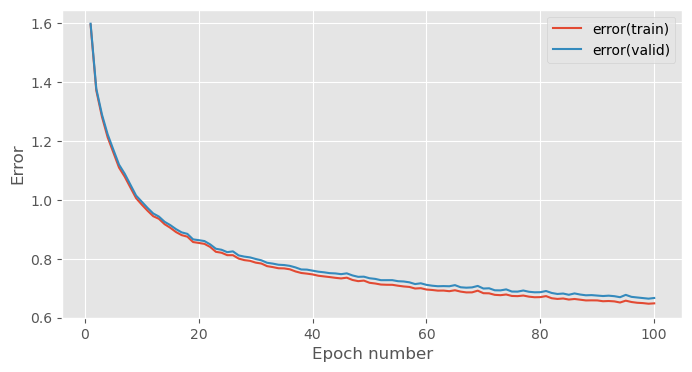

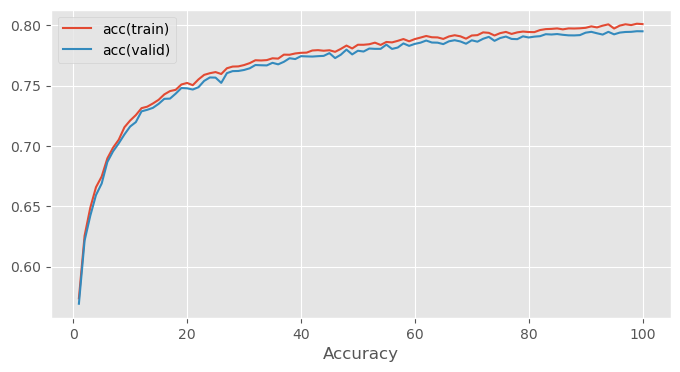

In [8]:

'''
    Task 3  Question 7 - 8 erxperiments with combination of Dropout L1, and L2 penalties


    Experiment 4o - Application of Dropout and L1 penalty in each of hidden layers 
                    with incl_prob = 0.97 and penalty_coefficient = 5e-4
    
'''

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty
import numpy as np
from mlp.layers import DropoutLayer
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels=False)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng,smooth_labels=False)

learning_rate = 0.0001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128
pelanty_coefficients = 5e-4
keep_rate = 0.97
seed = 11102019 
rng = np.random.RandomState(seed)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)),
    ReluLayer(),
    DropoutLayer(rng=rng,incl_prob=keep_rate),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty=L1Penalty(pelanty_coefficients),biases_penalty=L1Penalty(pelanty_coefficients)) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
L2_Dropout_stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

fig_1.savefig('/home/gvidias/mlpractical/figures/experiment_8_dropout_0.97_L1_0.0005_error.png')
fig_2.savefig('/home/gvidias/mlpractical/figures/experiment_8_dropout_0.97_L1_0.0005_accuracy.png')

# Show the plots
plt.show()




